#Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

##Data Description:

Murder -- Muder rates in different places of United States

Assualt- Assualt rate in different places of United States

UrbanPop - urban population in different places of United States

Rape - Rape rate in different places of United States

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, silhouette_samples

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving crime_data.csv to crime_data.csv


In [ ]:
#Imorting dataset
crime = pd.read_csv('crime_data.csv')
crime.head()

Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6

###Renaming columns

In [ ]:
crime.rename({'Unnamed: 0':'States'}, axis=1, inplace=True)
crime.head(10)

States  Murder  Assault  UrbanPop  Rape
0      Alabama    13.2      236        58  21.2
1       Alaska    10.0      263        48  44.5
2      Arizona     8.1      294        80  31.0
3     Arkansas     8.8      190        50  19.5
4   California     9.0      276        91  40.6
5     Colorado     7.9      204        78  38.7
6  Connecticut     3.3      110        77  11.1
7     Delaware     5.9      238        72  15.8
8      Florida    15.4      335        80  31.9
9      Georgia    17.4      211        60  25.8

In [ ]:
crime.shape

(50, 5)

In [ ]:
crime.isnull().sum()

States      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [ ]:
crime.describe()

Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000   7.300000
25%     4.07500  109.000000  54.500000  15.075000
50%     7.25000  159.000000  66.000000  20.100000
75%    11.25000  249.000000  77.750000  26.175000
max    17.40000  337.000000  91.000000  46.000000

In [ ]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


###Exploratory Data Analysis(EDA)

Analyze the features by creating histograms to understand the distribution

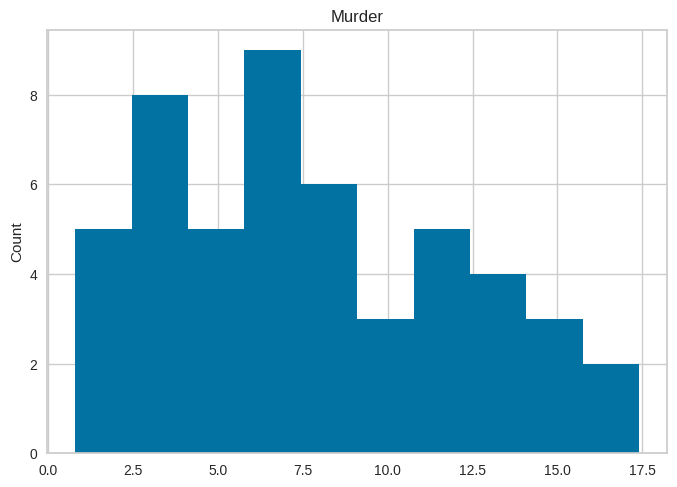

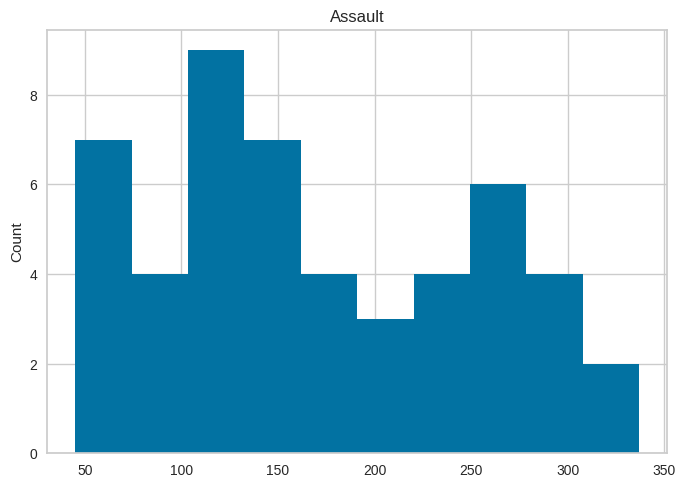

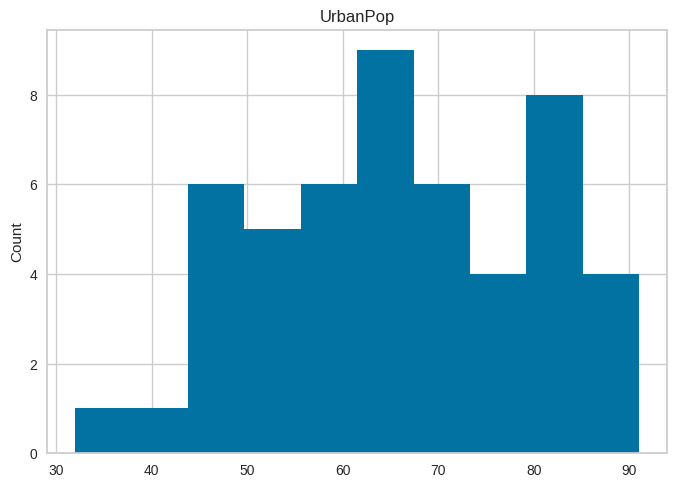

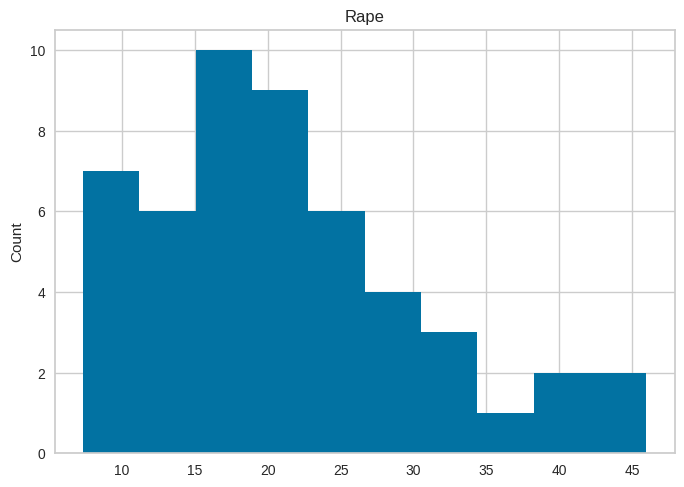

In [ ]:
continuous_feature = [feature for feature in crime.columns if crime[feature].dtype!='O']
for feature in continuous_feature:
    crime_data1 = crime.copy()
    crime_data1[feature].hist(bins=10)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

Kernel Density for every feature, singled out

Murder


Assault


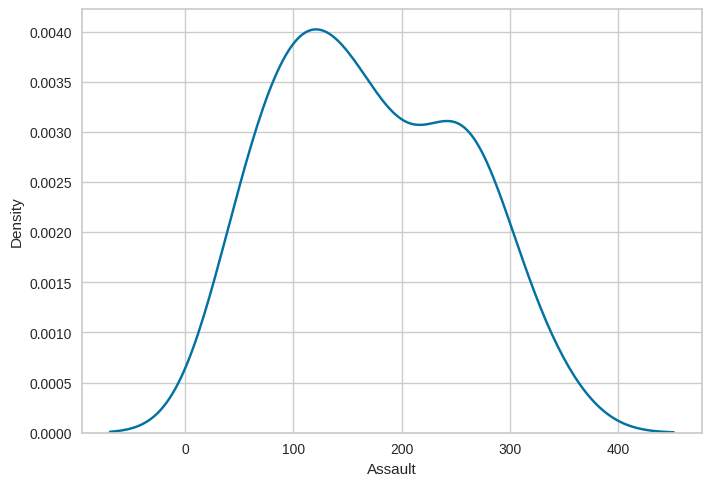

UrbanPop


Rape


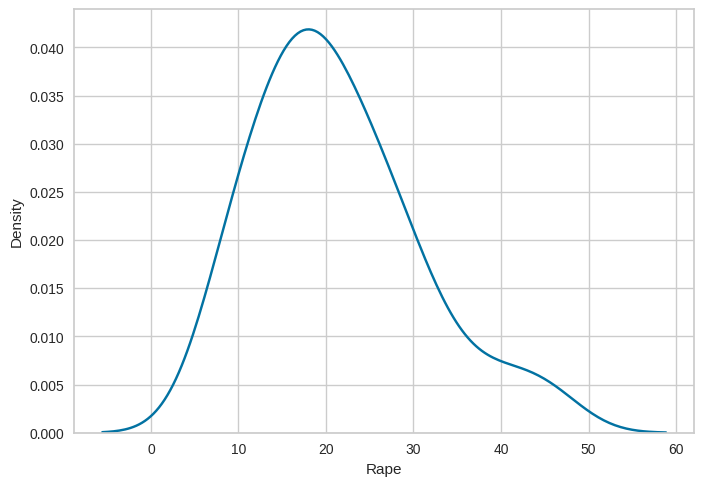

In [ ]:
for n in continuous_feature:
    print(n)
    sns.kdeplot(crime[n])
    plt.show()

###Outliers Detection

In [ ]:
crime.columns

Index(['States', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [ ]:
outlier = crime.copy()
fig, axes=plt.subplots(4,1,figsize=(12,8),sharex=False,sharey=False)
sns.boxplot(x='Murder',data=outlier,palette='crest',ax=axes[0])
sns.boxplot(x='Assault',data=outlier,palette='crest',ax=axes[1])
sns.boxplot(x='UrbanPop',data=outlier,palette='crest',ax=axes[2])
sns.boxplot(x='Rape',data=outlier,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

Box plot for every feature in the same graph

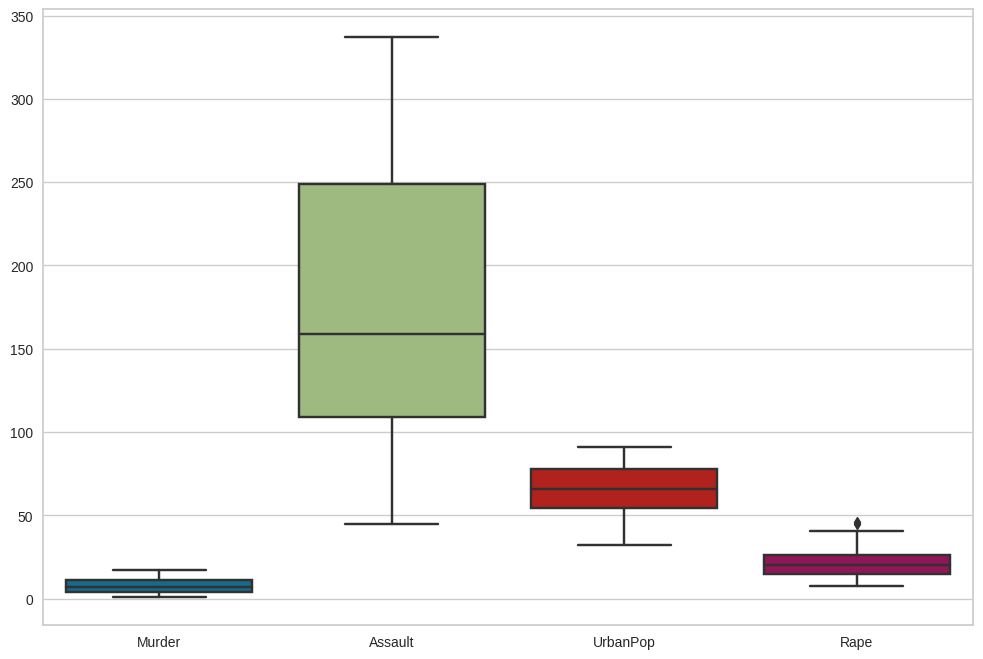

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data = crime)
plt.show()

###Correlation Heatmap

In [ ]:
f,ax = plt.subplots(figsize=(8,7))
sns.heatmap(crime.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

In [ ]:
sns.pairplot(crime)
plt.show()

Assault is positively correlated with Murder

Assualt is positively correlated with Rape

Rape is positively correlated with Murder

###Murder Rate

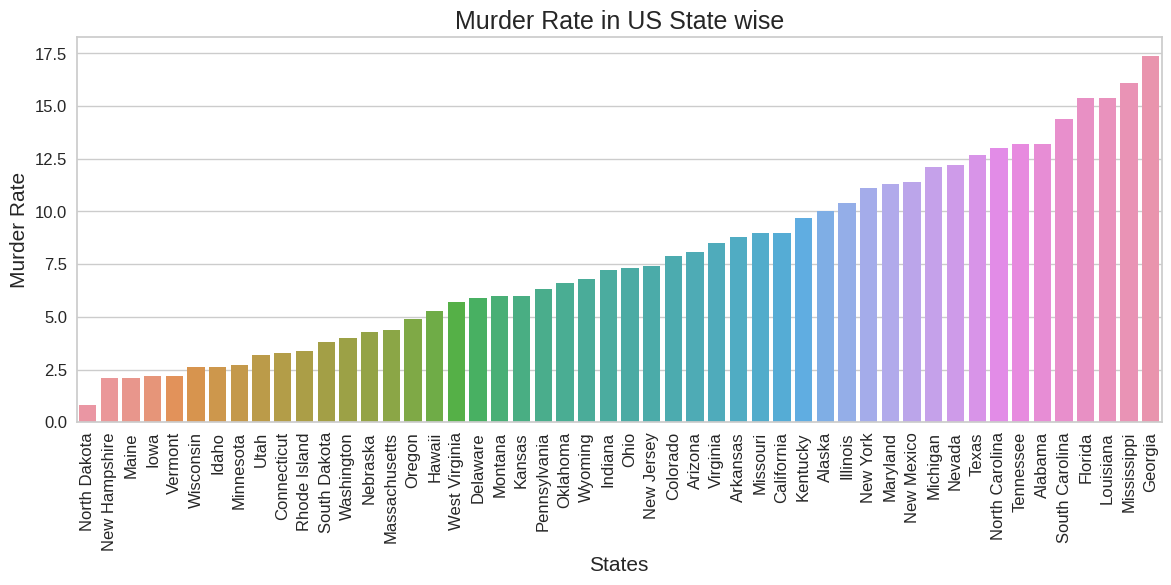

In [ ]:
plt.figure(figsize=(14,5))
# make barplot and sort bars
sns.barplot(x='States', y="Murder", data=crime, order=crime.sort_values('Murder').States)

# set labels
plt.xlabel("States", size=15)
plt.ylabel("Murder Rate", size=15)
plt.yticks(rotation = 0, fontsize = 12)
plt.xticks(rotation = 90, fontsize = 12)
plt.title("Murder Rate in US State wise", size=18)
plt.show()

In [ ]:
plt.figure(figsize=(14,5))
# make barplot and sort bars
sns.barplot(x='States', y="UrbanPop", data=crime, order=crime.sort_values('UrbanPop').States)

# set labels
plt.xlabel("States", size=15)
plt.ylabel("Urban Population Rate", size=15)
plt.yticks(rotation = 0, fontsize = 12)
plt.xticks(rotation = 90, fontsize = 12)
plt.title("Urban Population Rate in US State wise", size=18)
plt.show()

There is no direct relation between Murder Rate and Urban Population but you can see a less number of Murder rate can be seen North Dakota as it Urban population is less compare to Florida and has the opposite effect

In [ ]:
high_murder = crime.sort_values('Murder', ascending = False, ignore_index=True)
high_murder.head(10)

States  Murder  Assault  UrbanPop  Rape
0         Georgia    17.4      211        60  25.8
1     Mississippi    16.1      259        44  17.1
2         Florida    15.4      335        80  31.9
3       Louisiana    15.4      249        66  22.2
4  South Carolina    14.4      279        48  22.5
5         Alabama    13.2      236        58  21.2
6       Tennessee    13.2      188        59  26.9
7  North Carolina    13.0      337        45  16.1
8           Texas    12.7      201        80  25.5
9          Nevada    12.2      252        81  46.0

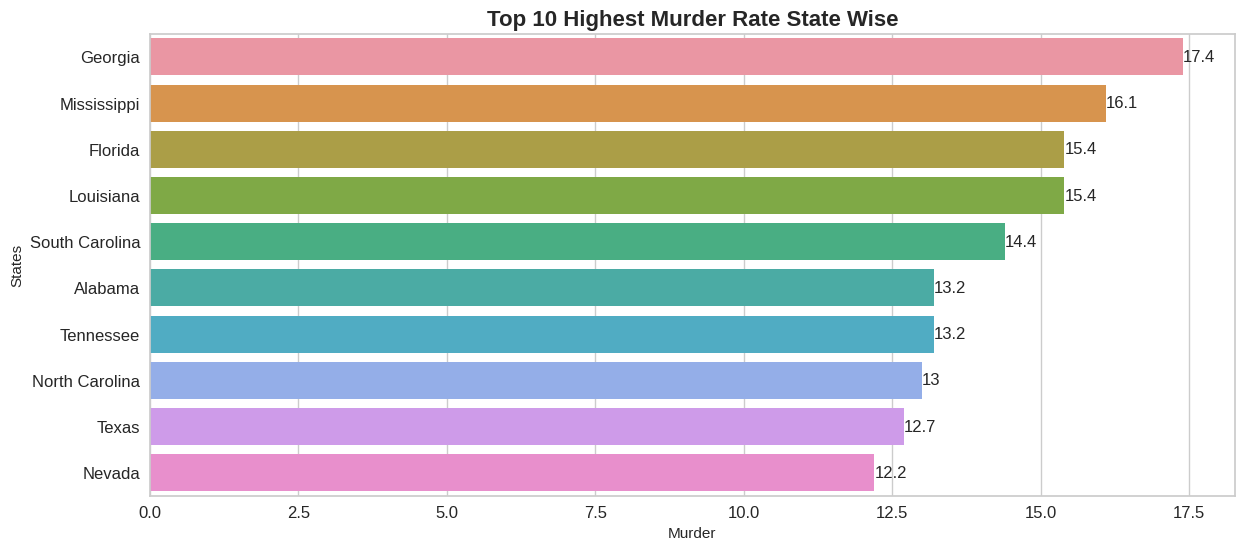

In [ ]:
plt.figure(figsize = (14,6))
ax = sns.barplot(x = high_murder.Murder[:10], y = high_murder.States[:10])
plt.yticks(rotation = 0, fontsize = 12)
plt.xticks(rotation = 0, fontsize = 12)
plt.title('Top 10 Highest Murder Rate State Wise',  fontsize = 16, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i)

In [ ]:
plt.figure(figsize = (8,8))
plt.pie(high_murder.Murder[:10], labels= high_murder.States[:10],
       explode = [0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%', startangle= 190, textprops = {'size':'medium', 'fontweight':'bold'})

plt.title("Top 10 Highest Murder Rate State Wise", fontsize = 16, fontweight = 'bold')
plt.show()

In [ ]:
low_murder = crime.sort_values('Murder', ascending = True, ignore_index=True)
low_murder.head(10)

States  Murder  Assault  UrbanPop  Rape
0   North Dakota     0.8       45        44   7.3
1  New Hampshire     2.1       57        56   9.5
2          Maine     2.1       83        51   7.8
3           Iowa     2.2       56        57  11.3
4        Vermont     2.2       48        32  11.2
5      Wisconsin     2.6       53        66  10.8
6          Idaho     2.6      120        54  14.2
7      Minnesota     2.7       72        66  14.9
8           Utah     3.2      120        80  22.9
9    Connecticut     3.3      110        77  11.1

In [ ]:
plt.figure(figsize = (14,6))
ax = sns.barplot(x = low_murder.Murder[:10], y = low_murder.States[:10])
plt.yticks(rotation = 0, fontsize = 12)
plt.xticks(rotation = 0, fontsize = 12)
plt.title('Top 10 Lowest Murder Rate State Wise',  fontsize = 16, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i)

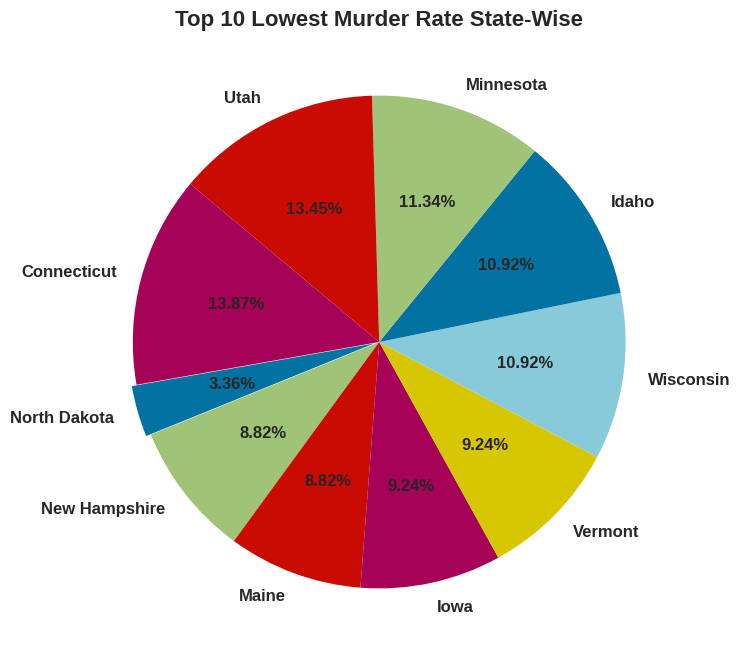

In [ ]:
plt.figure(figsize = (8,8))
plt.pie(low_murder.Murder[:10], labels= low_murder.States[:10],
       explode = [0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%', startangle= 190, textprops = {'size':'medium', 'fontweight':'bold',})

plt.title("Top 10 Lowest Murder Rate State-Wise", fontsize = 16, fontweight = 'bold')
plt.show()

Highest Murder Rate : Georgia, Missisippi and Florida

Lowest Murder Rate : North Dakota, New Hampshire, Idaho, Iowa, Maine, Vermont and Wisconsin.

###Assault Rate

In [ ]:
plt.figure(figsize=(14,6))
# make barplot and sort bars
sns.barplot(x='States', y="Assault", data=crime, order=crime.sort_values('Assault').States)

# set labels
plt.xlabel("States", size=15)
plt.ylabel("Assault Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 14)
plt.title("Assault Rate in US State wise", size=16)
plt.show()

In [ ]:
high_assault = crime.sort_values('Assault', ascending = False, ignore_index=True)
high_assault.head(10)

States  Murder  Assault  UrbanPop  Rape
0  North Carolina    13.0      337        45  16.1
1         Florida    15.4      335        80  31.9
2        Maryland    11.3      300        67  27.8
3         Arizona     8.1      294        80  31.0
4      New Mexico    11.4      285        70  32.1
5  South Carolina    14.4      279        48  22.5
6      California     9.0      276        91  40.6
7          Alaska    10.0      263        48  44.5
8     Mississippi    16.1      259        44  17.1
9        Michigan    12.1      255        74  35.1

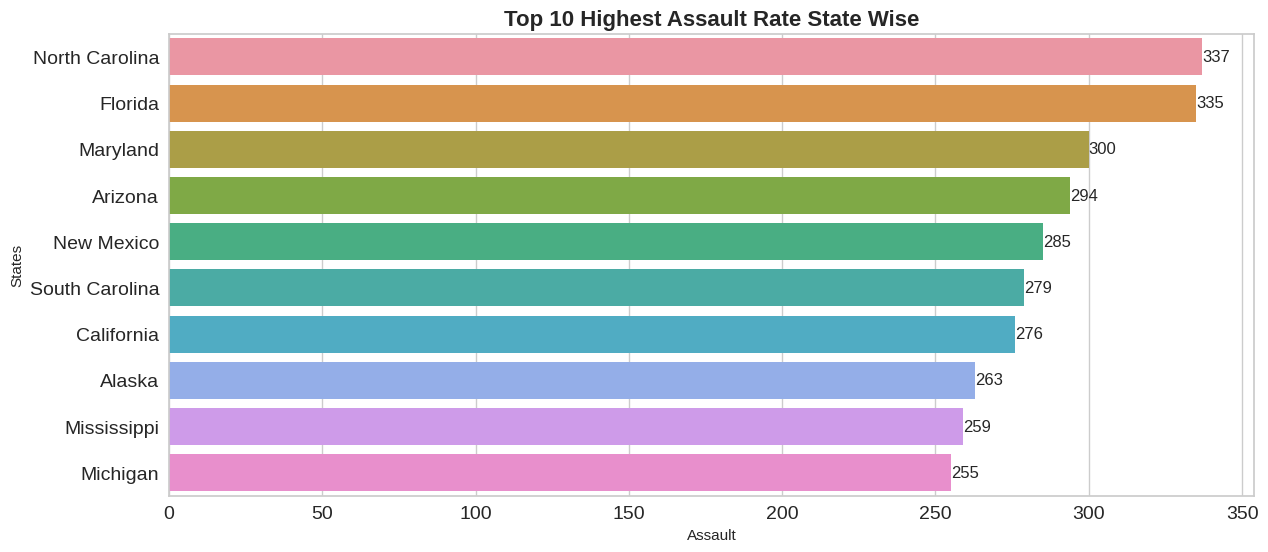

In [ ]:
plt.figure(figsize = (14,6))
ax = sns.barplot(x = high_assault.Assault[:10], y = high_assault.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 0, fontsize = 14)
plt.title('Top 10 Highest Assault Rate State Wise',  fontsize = 16, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

In [ ]:
plt.figure(figsize = (8,8))
plt.pie(high_assault.Assault[:10], labels=high_assault.States[:10],
       explode = [0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%', startangle= 190, textprops = {'size':'medium', 'fontweight':'bold'})

plt.title("Top 10 Highest Assault Rate States-wise", fontsize = 16, fontweight = 'bold')
plt.show()

In [ ]:
low_assault = crime.sort_values('Assault', ascending = True, ignore_index= True)
low_assault.head(10)

States  Murder  Assault  UrbanPop  Rape
0   North Dakota     0.8       45        44   7.3
1         Hawaii     5.3       46        83  20.2
2        Vermont     2.2       48        32  11.2
3      Wisconsin     2.6       53        66  10.8
4           Iowa     2.2       56        57  11.3
5  New Hampshire     2.1       57        56   9.5
6      Minnesota     2.7       72        66  14.9
7  West Virginia     5.7       81        39   9.3
8          Maine     2.1       83        51   7.8
9   South Dakota     3.8       86        45  12.8

In [ ]:
plt.figure(figsize = (14,6))
ax = sns.barplot(x = low_assault.Assault[:10], y = low_assault.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 0, fontsize = 14)
plt.title('Top 10 Lowest Assault Rate State Wise',  fontsize = 16, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i)

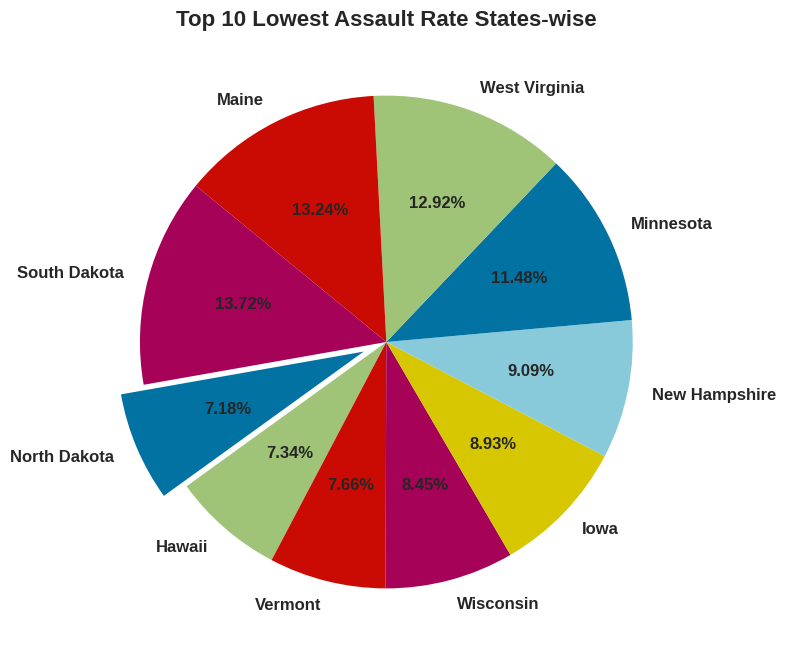

In [ ]:
plt.figure(figsize = (8,8))
plt.pie(low_assault.Assault[:10], labels= low_assault.States[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%', startangle= 190,
       textprops = {'size':'medium', 'fontweight':'bold'})

plt.title("Top 10 Lowest Assault Rate States-wise", fontsize = 16, fontweight = 'bold')
plt.show()

Highest Assault Rate : North Carolina, Florida and Maryland

Lowest Assault Rate : North Dakota, Hawaii and Vermont.

###Rape Rate

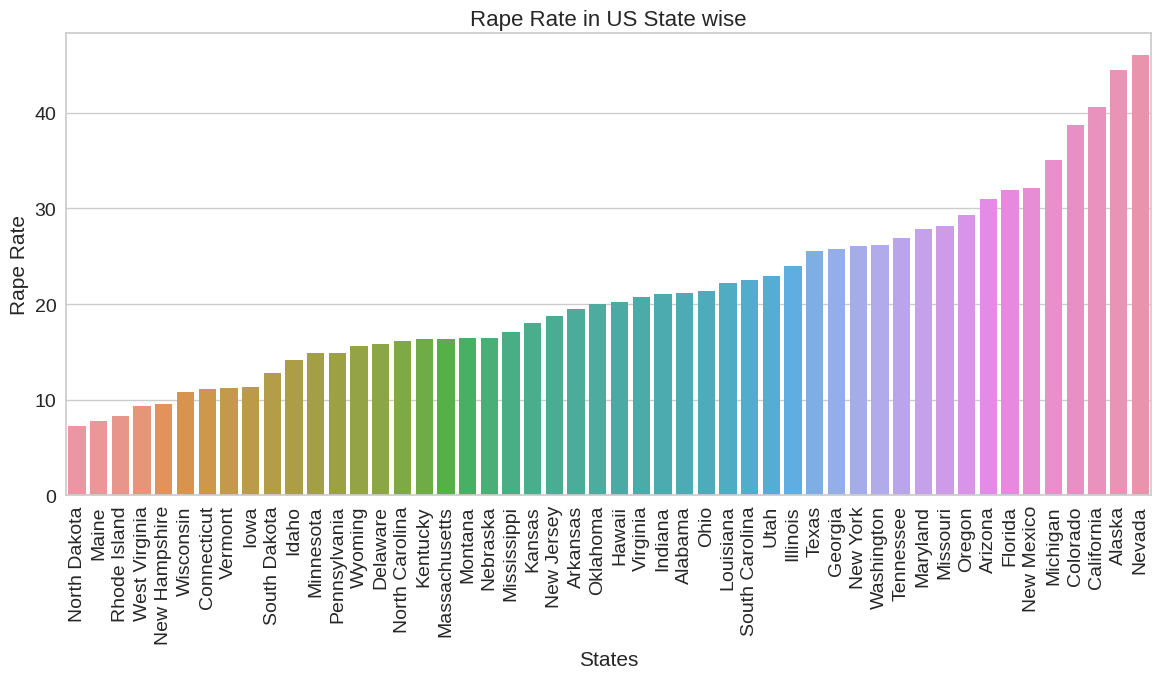

In [ ]:
plt.figure(figsize=(14,6))
# make barplot and sort bars
sns.barplot(x='States', y="Rape", data=crime, order=crime.sort_values('Rape').States)

# set labels
plt.xlabel("States", size=15)
plt.ylabel("Rape Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 14)
plt.title("Rape Rate in US State wise", size=16)
plt.show()

In [ ]:
high_rape = crime.sort_values('Rape', ascending=False, ignore_index=True)
high_rape.head(10)

States  Murder  Assault  UrbanPop  Rape
0      Nevada    12.2      252        81  46.0
1      Alaska    10.0      263        48  44.5
2  California     9.0      276        91  40.6
3    Colorado     7.9      204        78  38.7
4    Michigan    12.1      255        74  35.1
5  New Mexico    11.4      285        70  32.1
6     Florida    15.4      335        80  31.9
7     Arizona     8.1      294        80  31.0
8      Oregon     4.9      159        67  29.3
9    Missouri     9.0      178        70  28.2

In [ ]:
low_rape = crime.sort_values('Rape', ascending=True, ignore_index=True)
low_rape.head(10)

States  Murder  Assault  UrbanPop  Rape
0   North Dakota     0.8       45        44   7.3
1          Maine     2.1       83        51   7.8
2   Rhode Island     3.4      174        87   8.3
3  West Virginia     5.7       81        39   9.3
4  New Hampshire     2.1       57        56   9.5
5      Wisconsin     2.6       53        66  10.8
6    Connecticut     3.3      110        77  11.1
7        Vermont     2.2       48        32  11.2
8           Iowa     2.2       56        57  11.3
9   South Dakota     3.8       86        45  12.8

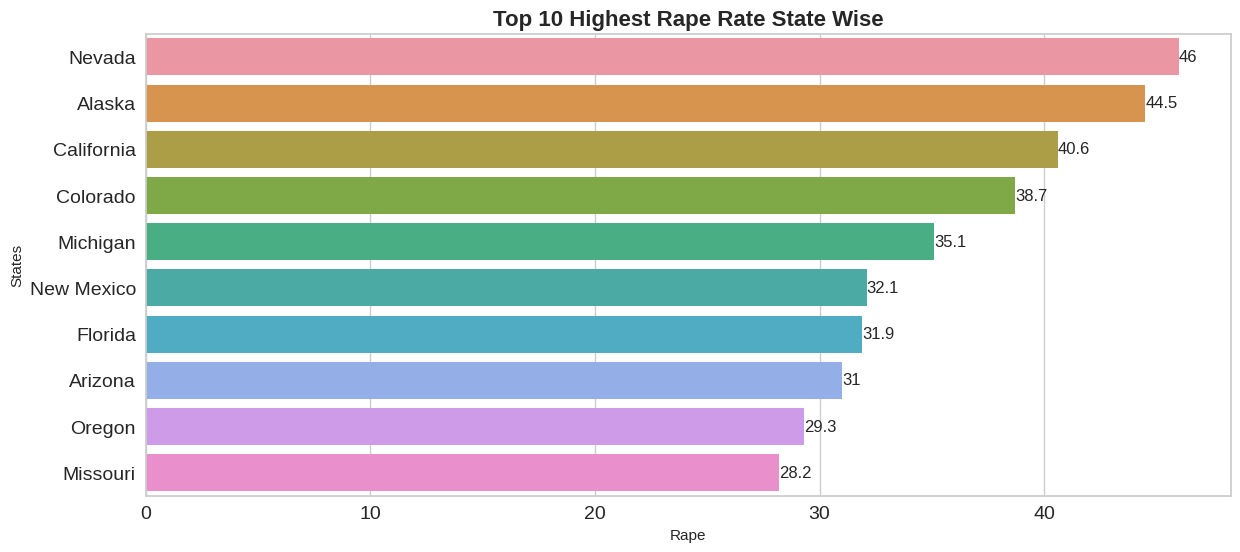

In [ ]:
plt.figure(figsize = (14,6))
ax = sns.barplot(x = high_rape.Rape[:10], y =high_rape.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 0, fontsize = 14)
plt.title('Top 10 Highest Rape Rate State Wise',  fontsize = 16, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i)

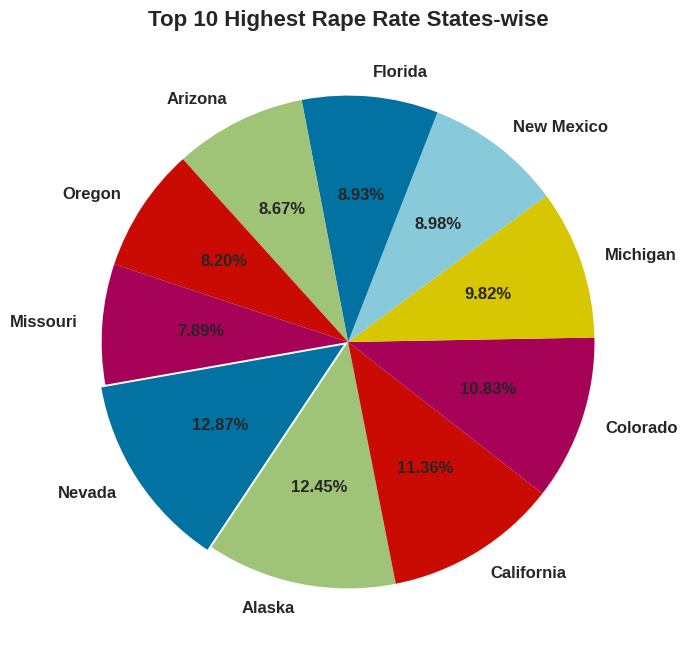

In [ ]:
plt.figure(figsize = (8,8))
plt.pie(high_rape.Rape[:10], labels= high_rape.States[:10],
       explode = [0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%', startangle= 190,
       textprops = {'size':'medium',
                   'fontweight':'bold'})

plt.title("Top 10 Highest Rape Rate States-wise", fontsize = 16, fontweight = 'bold')
plt.show()


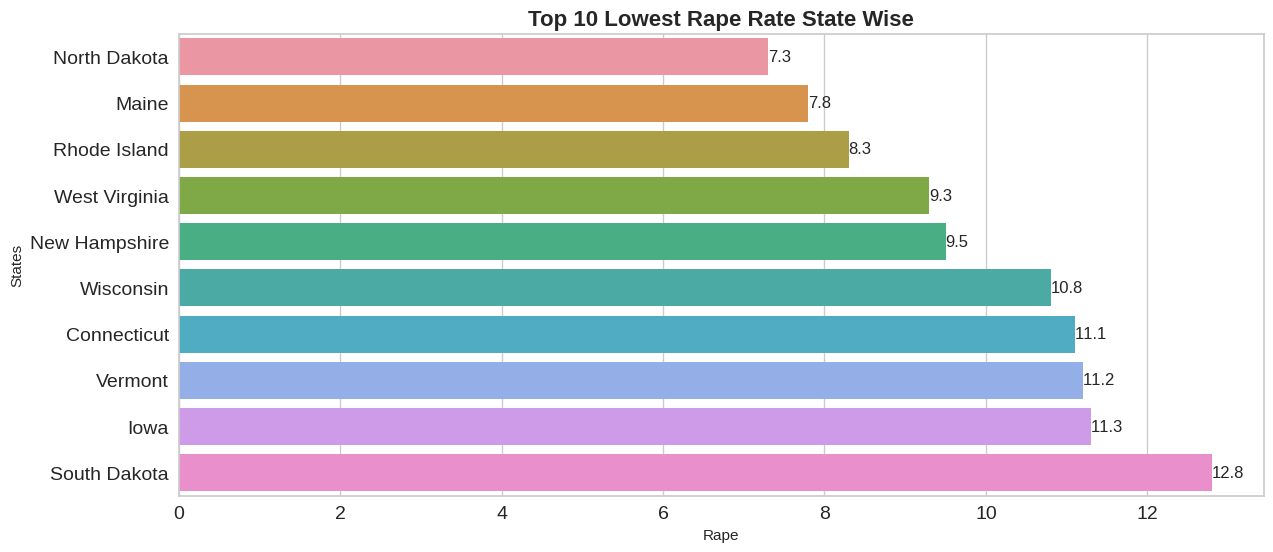

In [ ]:
plt.figure(figsize = (14,6))
ax = sns.barplot(x = low_rape.Rape[:10], y = low_rape.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 0, fontsize = 14)
plt.title('Top 10 Lowest Rape Rate State Wise',  fontsize = 16, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i)

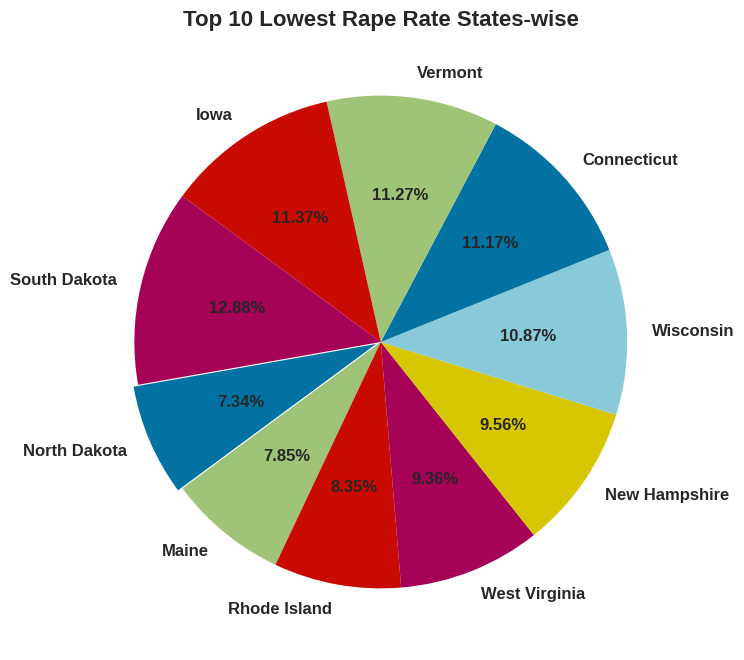

In [ ]:
plt.figure(figsize = (8,8))
plt.pie(low_rape.Rape[:10], labels= low_rape.States[:10],
       explode = [0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%', startangle= 190, textprops = {'size':'medium', 'fontweight':'bold'})

plt.title("Top 10 Lowest Rape Rate States-wise", fontsize = 16, fontweight = 'bold')
plt.show()

Highest Rape Rate : Nevada, Alaska and California

Lowest Rape Rate : North Dakota, Maine and Rhode Island.

###Urban Population Rate

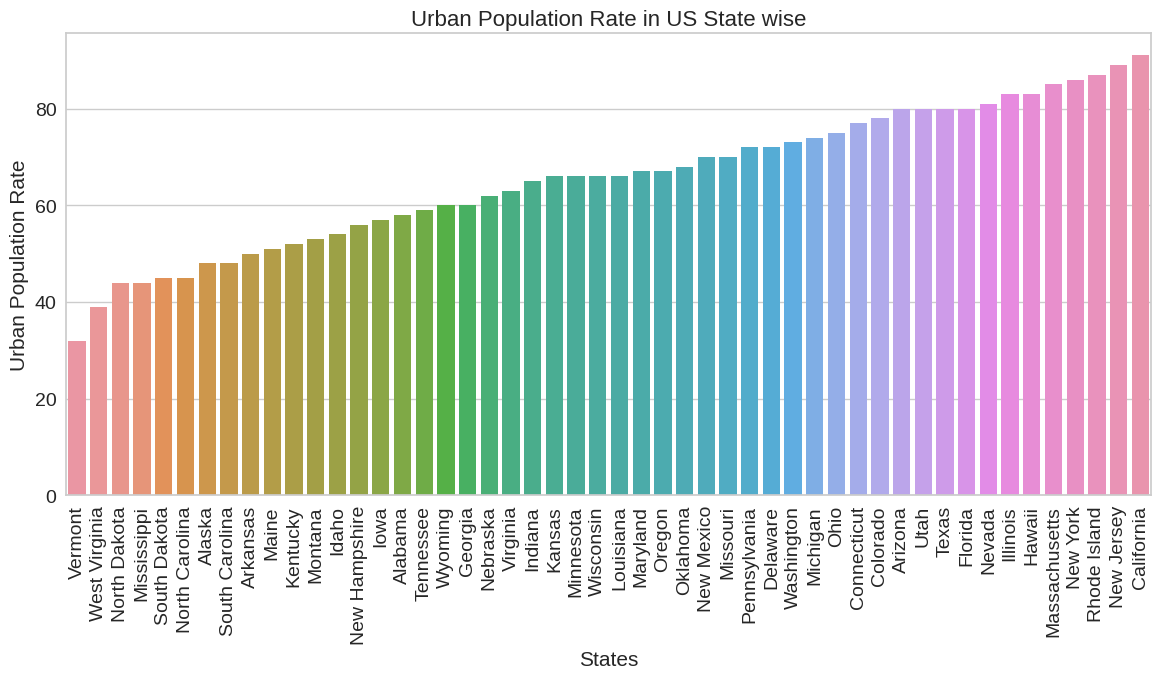

In [ ]:
plt.figure(figsize=(14,6))
# make barplot and sort bars
sns.barplot(x='States', y="UrbanPop", data=crime, order=crime.sort_values('UrbanPop').States)

# set labels
plt.xlabel("States", size=15)
plt.ylabel("Urban Population Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 14)
plt.title("Urban Population Rate in US State wise", size=16)
plt.show()

In [ ]:
high_population = crime.sort_values('UrbanPop',ascending=False, ignore_index=True)
high_population.head(10)

States  Murder  Assault  UrbanPop  Rape
0     California     9.0      276        91  40.6
1     New Jersey     7.4      159        89  18.8
2   Rhode Island     3.4      174        87   8.3
3       New York    11.1      254        86  26.1
4  Massachusetts     4.4      149        85  16.3
5         Hawaii     5.3       46        83  20.2
6       Illinois    10.4      249        83  24.0
7         Nevada    12.2      252        81  46.0
8          Texas    12.7      201        80  25.5
9        Arizona     8.1      294        80  31.0

In [ ]:
low_population = crime.sort_values('UrbanPop',ascending=True, ignore_index=True)
low_population.head(10)

States  Murder  Assault  UrbanPop  Rape
0         Vermont     2.2       48        32  11.2
1   West Virginia     5.7       81        39   9.3
2    North Dakota     0.8       45        44   7.3
3     Mississippi    16.1      259        44  17.1
4    South Dakota     3.8       86        45  12.8
5  North Carolina    13.0      337        45  16.1
6          Alaska    10.0      263        48  44.5
7  South Carolina    14.4      279        48  22.5
8        Arkansas     8.8      190        50  19.5
9           Maine     2.1       83        51   7.8

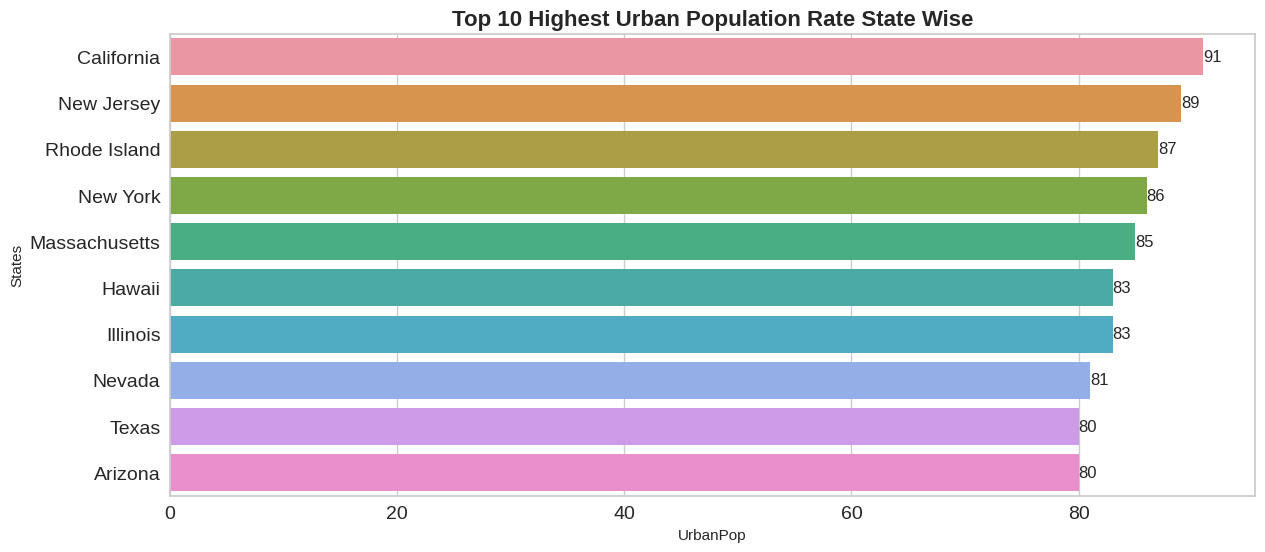

In [ ]:
plt.figure(figsize = (14,6))
ax = sns.barplot(x = high_population.UrbanPop[:10], y = high_population.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 0, fontsize = 14)
plt.title('Top 10 Highest Urban Population Rate State Wise',  fontsize = 16, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i)

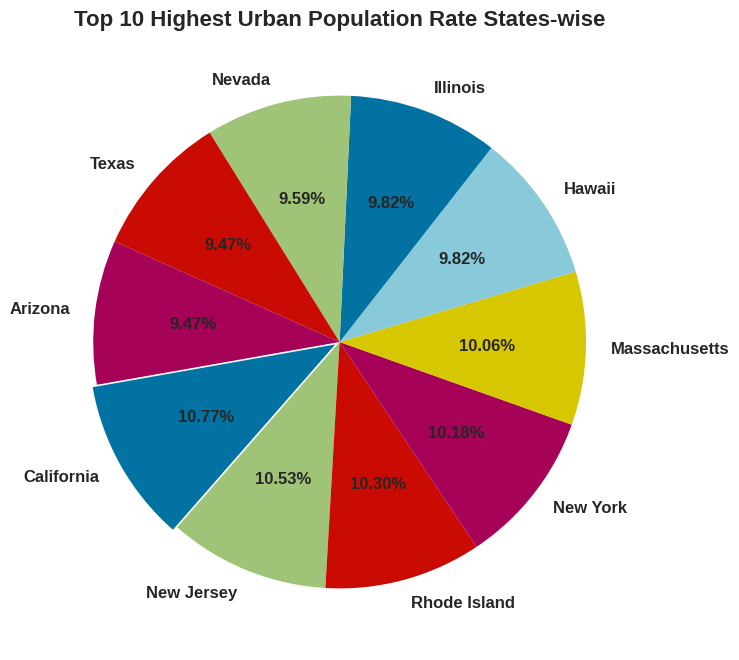

In [ ]:
plt.figure(figsize = (8,8))
plt.pie(high_population.UrbanPop[:10], labels= high_population.States[:10],
       explode = [0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%', startangle= 190, textprops = {'size':'medium', 'fontweight':'bold'})

plt.title("Top 10 Highest Urban Population Rate States-wise", fontsize = 16, fontweight = 'bold')
plt.show()

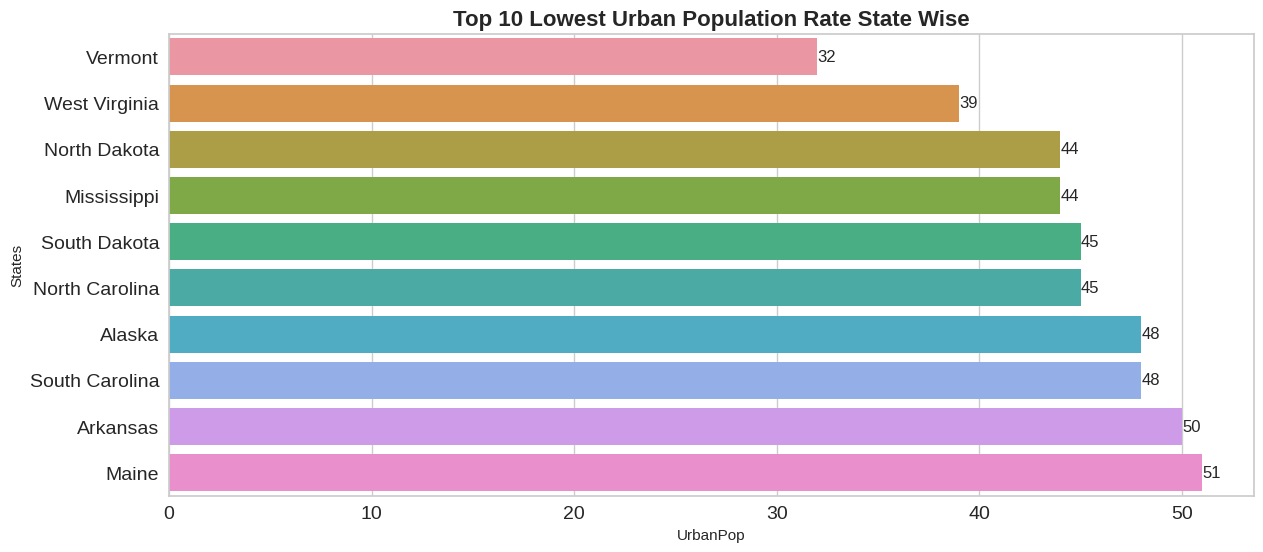

In [ ]:
plt.figure(figsize = (14,6))
ax = sns.barplot(x = low_population.UrbanPop[:10], y = low_population.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 0, fontsize = 14)
plt.title('Top 10 Lowest Urban Population Rate State Wise',  fontsize = 16, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i)

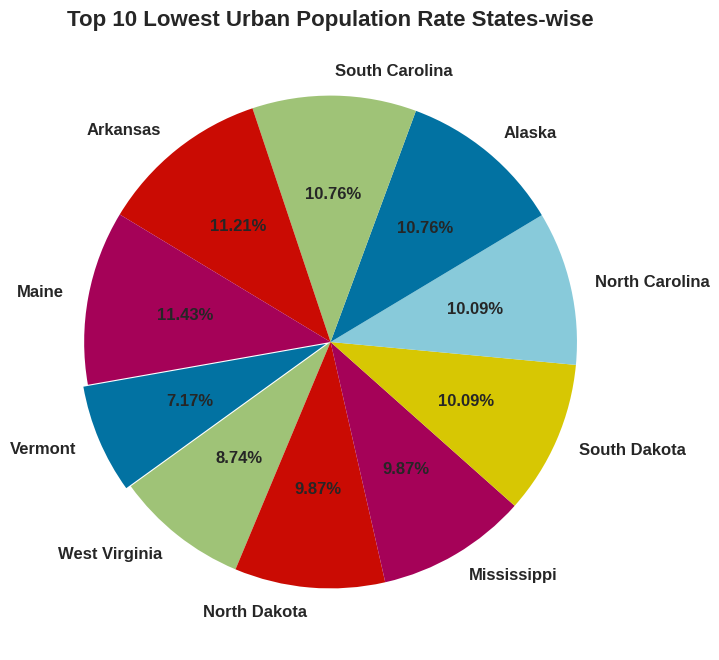

In [ ]:
plt.figure(figsize = (8,8))
plt.pie(low_population.UrbanPop[:10], labels= low_population.States[:10],
       explode = [0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%', startangle= 190, textprops = {'size':'medium', 'fontweight':'bold'})

plt.title("Top 10 Lowest Urban Population Rate States-wise", fontsize = 16, fontweight = 'bold')
plt.show()

Highest Urban Population Rate : California, New Jersey and Rhode Island

Lowest Urban Population Rate : Vermount, West Virginia and North Dakota

###Data Preprocessing

In [ ]:
crime_df = crime.set_index('States')
crime_df.head()


Murder  Assault  UrbanPop  Rape
States                                     
Alabama       13.2      236        58  21.2
Alaska        10.0      263        48  44.5
Arizona        8.1      294        80  31.0
Arkansas       8.8      190        50  19.5
California     9.0      276        91  40.6

####Standardizing the Data

In [ ]:
standard_scaler = StandardScaler()
std_crime = standard_scaler.fit_transform(crime_df)
std_crime.shape

(50, 4)

####Normalizing the data

In [ ]:
minmax = MinMaxScaler()
norm_crime = minmax.fit_transform(crime_df)
norm_crime.shape

(50, 4)

###K-Means Clustering

Elbow Method for Determining Cluster Amount

In [ ]:
#Standard Scaler Applied on Data
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(std_crime)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"Num_Clusters":cluster_range,"Cluster_Errors":cluster_errors})
clusters_df

Num_Clusters  Cluster_Errors
0              1      200.000000
1              2      104.961633
2              3       79.921703
3              4       57.554259
4              5       50.051197
5              6       43.901766
6              7       41.207264
7              8       36.028369
8              9       31.158266
9             10       26.918967
10            11       24.529508
11            12       22.219501
12            13       21.587783
13            14       18.912275

Within-Cluster Sum-of-Squares Criterion

Use Elbow Graph to find optimum number of clusters (K value) from K values range

The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS

Random state can be anything from 0 to 42, but the same number to be used everytime,so that the results don't change.

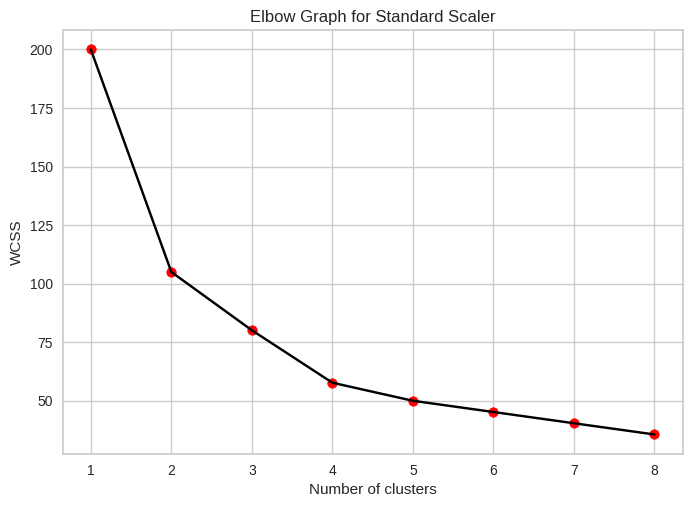

In [ ]:
wcss=[]
for i in range(1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(std_crime)
    wcss.append(kmeans.inertia_)

# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

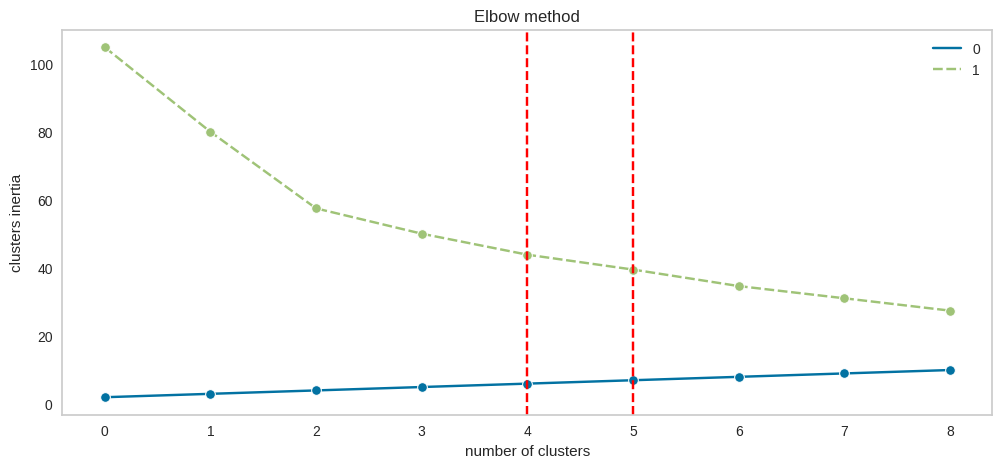

In [ ]:
#from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(std_crime)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(std_crime, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(data = (n_clusters,clusters_inertia), marker='o', ax=ax)
ax.set_title("Elbow method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("clusters inertia")
ax.axvline(4, ls="--", c="red")
ax.axvline(5, ls="--", c="red")
plt.grid()
plt.show()

There is no clear "elbow" visible. A choice of 4 or 5 clusters seems to be fair

Silhouette Score

How many number of clusters? n_clusters?

Since true labels are not known..we will use Silhouette Coefficient (Clustering performance evaluation)

###Knee Elbow graph method

Elbow Plot for Standard Scaler data


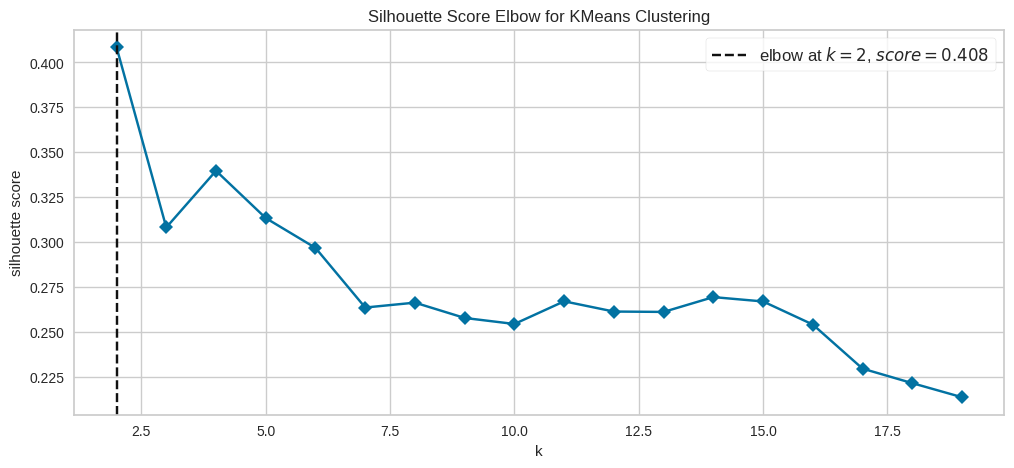

In [ ]:
# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model = KMeans(random_state=10, max_iter=500, init='k-means++')

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)
# Fit the data and visualize
fig, ax = plt.subplots(figsize=(12,5))
print('Elbow Plot for Standard Scaler data')
visualizer.fit(std_crime)
visualizer.poof()
plt.show()

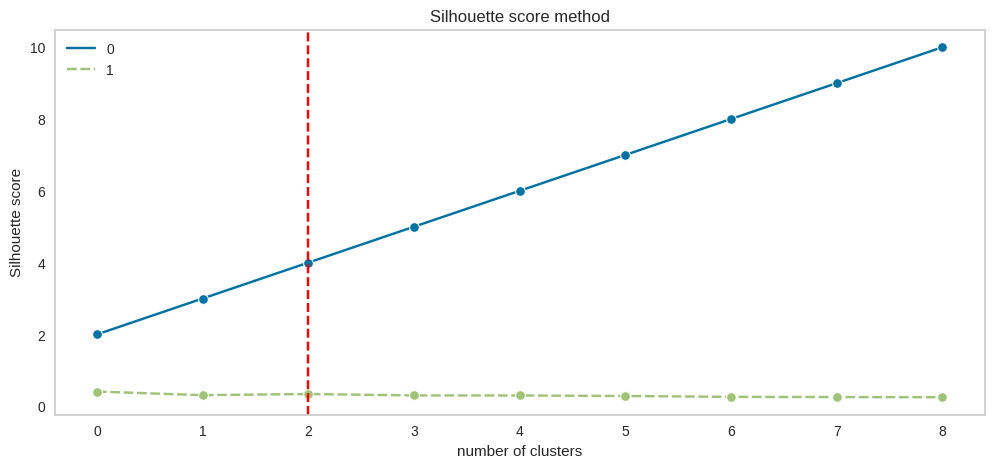

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(data =(n_clusters, s_scores), marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()

With the elbow method, the ideal number of clusters to use was 6. We will also use the Silhouette score to determine an optimal number.

In [ ]:
clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for stadardScaler applied on data.

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(std_crime)
    sil_score1= silhouette_score(std_crime, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.4084890326217641
For n_clusters = 3 The average silhouette_score is : 0.3095091512791688
For n_clusters = 4 The average silhouette_score is : 0.33968891433344395
For n_clusters = 5 The average silhouette_score is : 0.30612803169146263
For n_clusters = 6 The average silhouette_score is : 0.29910456843899946
For n_clusters = 7 The average silhouette_score is : 0.23035904501364113
For n_clusters = 8 The average silhouette_score is : 0.2732934287338534
For n_clusters = 9 The average silhouette_score is : 0.2518939934580804


According the the silhouette score of:

The standardized data, although the ideal number of clusters is 2, with a score higher than other options, of 0.40. we will go for 3 number of clusters

###Build KMeans Cluster algorithm using K=3 and Standard Scaler Applied Dataset

We have found good number of cluster = 3 Model building using cluster numbers = 3

In [ ]:
model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(std_crime)
y_predict_kmeans.shape

(50,)

In [ ]:
# these are nothing but cluster labels...
y_predict_kmeans

array([1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2], dtype=int32)

In [ ]:
model_kmeans.labels_

array([1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2], dtype=int32)

In [ ]:
# cluster centres associated with each lables
model_kmeans.cluster_centers_

array([[-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 1.05377053,  1.07340253,  0.19371445,  0.86104144],
       [-0.41081687, -0.32571014,  0.4740874 , -0.20357044]])

Within Cluster Sum of Squared

The lower values of inertia are better and zero is optimal.

Inertia is the sum of squared error for each cluster.

Therefore the smaller the inertia the denser the cluster(closer together all the points are)

In [ ]:
model_kmeans.inertia_

80.0888613219962

In [ ]:
#Assign clusters to the data set
crime_df['Kmeans_Label'] = model_kmeans.labels_

In [ ]:
# Group data by Clusters (K=6)
crime_df.groupby('Kmeans_Label').agg(['mean'])

Murder     Assault   UrbanPop       Rape
                   mean        mean       mean       mean
Kmeans_Label                                             
0              3.600000   78.538462  52.076923  12.176923
1             12.331579  259.315789  68.315789  29.215789
2              6.016667  143.888889  72.333333  19.344444

In [ ]:
crime_df[crime_df['Kmeans_Label']==0]

Murder  Assault  UrbanPop  Rape  Kmeans_Label
States                                                      
Idaho             2.6      120        54  14.2             0
Iowa              2.2       56        57  11.3             0
Kentucky          9.7      109        52  16.3             0
Maine             2.1       83        51   7.8             0
Minnesota         2.7       72        66  14.9             0
Montana           6.0      109        53  16.4             0
Nebraska          4.3      102        62  16.5             0
New Hampshire     2.1       57        56   9.5             0
North Dakota      0.8       45        44   7.3             0
South Dakota      3.8       86        45  12.8             0
Vermont           2.2       48        32  11.2             0
West Virginia     5.7       81        39   9.3             0
Wisconsin         2.6       53        66  10.8             0

In [ ]:
crime_df[crime_df['Kmeans_Label']==1]

Murder  Assault  UrbanPop  Rape  Kmeans_Label
States                                                       
Alabama           13.2      236        58  21.2             1
Alaska            10.0      263        48  44.5             1
Arizona            8.1      294        80  31.0             1
California         9.0      276        91  40.6             1
Colorado           7.9      204        78  38.7             1
Florida           15.4      335        80  31.9             1
Georgia           17.4      211        60  25.8             1
Illinois          10.4      249        83  24.0             1
Louisiana         15.4      249        66  22.2             1
Maryland          11.3      300        67  27.8             1
Michigan          12.1      255        74  35.1             1
Mississippi       16.1      259        44  17.1             1
Nevada            12.2      252        81  46.0             1
New Mexico        11.4      285        70  32.1             1
New York          11.1      254        86  26.1             1
North Carolina    13.0      337        45  16.1             1
South Carolina    14.4      279        48  22.5             1
Tennessee         13.2      188        59  26.9             1
Texas             12.7      201        80  25.5             1

In [ ]:
crime_df[crime_df['Kmeans_Label']==2]

Murder  Assault  UrbanPop  Rape  Kmeans_Label
States                                                      
Arkansas          8.8      190        50  19.5             2
Connecticut       3.3      110        77  11.1             2
Delaware          5.9      238        72  15.8             2
Hawaii            5.3       46        83  20.2             2
Indiana           7.2      113        65  21.0             2
Kansas            6.0      115        66  18.0             2
Massachusetts     4.4      149        85  16.3             2
Missouri          9.0      178        70  28.2             2
New Jersey        7.4      159        89  18.8             2
Ohio              7.3      120        75  21.4             2
Oklahoma          6.6      151        68  20.0             2
Oregon            4.9      159        67  29.3             2
Pennsylvania      6.3      106        72  14.9             2
Rhode Island      3.4      174        87   8.3             2
Utah              3.2      120        80  22.9             2
Virginia          8.5      156        63  20.7             2
Washington        4.0      145        73  26.2             2
Wyoming           6.8      161        60  15.6             2

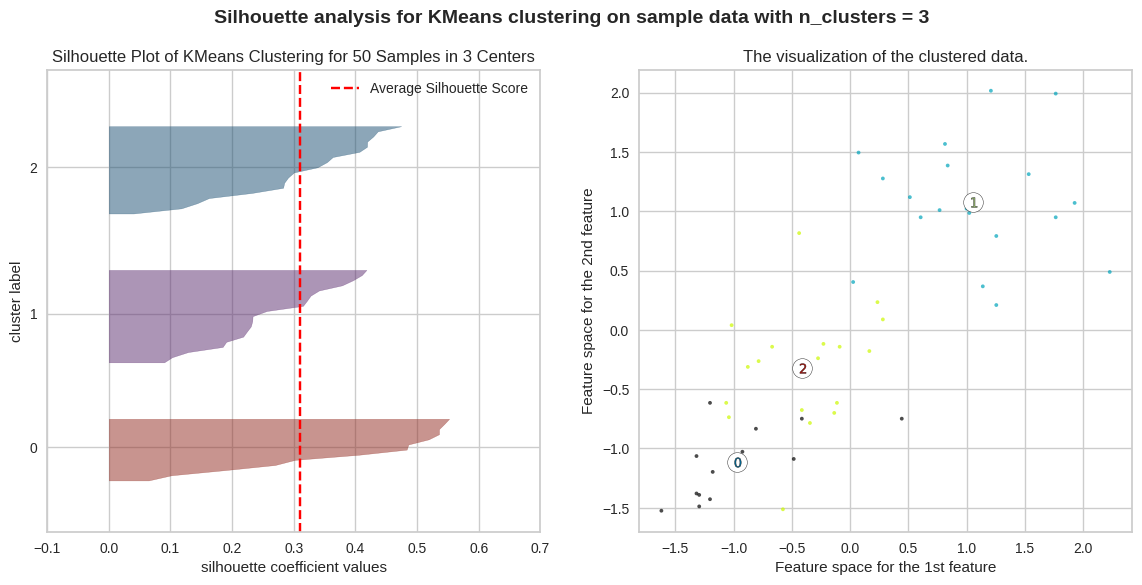

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(14,6)

sil_visualizer1 = SilhouetteVisualizer(model_kmeans,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a'])
sil_visualizer1.fit(std_crime)

# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 3) # 6 is number of clusters
ax2.scatter(std_crime[:, 0], std_crime[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model_kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 0], centers1[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % 3), fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

###Visualize the data we reduced to 2 sets

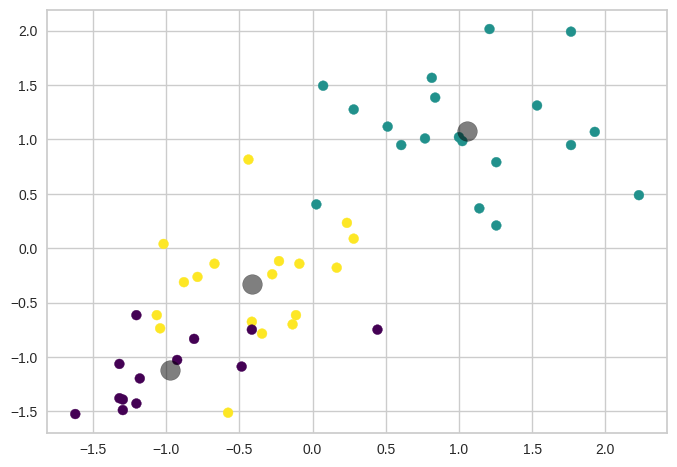

In [ ]:
plt.scatter(std_crime[:,0], std_crime[:,1], c = model_kmeans.labels_, s = 50, cmap = "viridis")
centers = model_kmeans.cluster_centers_

# We want to create 2 centers and show them on the visual.
plt.scatter(centers[:,0], centers[:,1], c = "black", s = 200, alpha = 0.5)
plt.show()

The Cities in the Cluster-0 seems to be Safe-Zone where there are relativley less Murders,Assaults and Rapes.

The Cities in Cluster-1 seems to have higher crime rates and can be regarded as Danger-Zone.

The Cities in Cluster-2 seems to have Moderate crime rates and can be regarded as Moderate-Zone

###Elbow Method and Silhouette Score on MinMaxScaler Applied Data

In [ ]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(norm_crime)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

num_clusters  cluster_errors
0              1       13.184123
1              2        6.596894
2              3        5.018500
3              4        3.683456
4              5        3.184262
5              6        2.844382
6              7        2.629772
7              8        2.404612
8              9        2.025113
9             10        1.867902
10            11        1.747278
11            12        1.573916
12            13        1.378401
13            14        1.348968

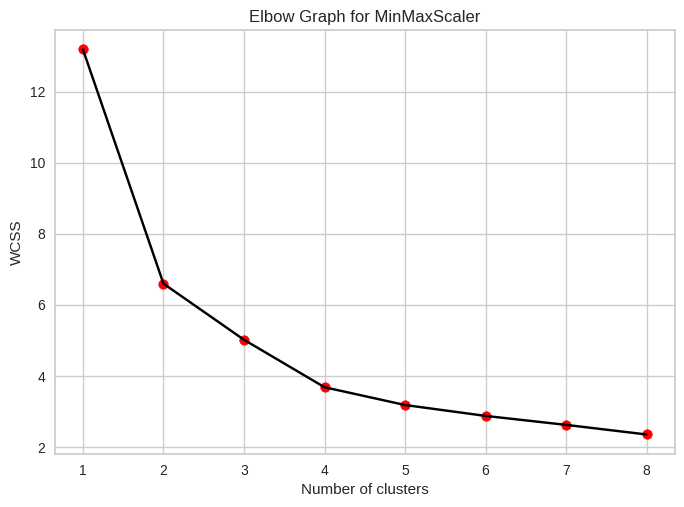

In [ ]:
wcss=[]
for i in range (1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(norm_crime)
    wcss.append(kmeans.inertia_)

# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for MinMaxScaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.

Elbow Plot for MinMaxScaler data


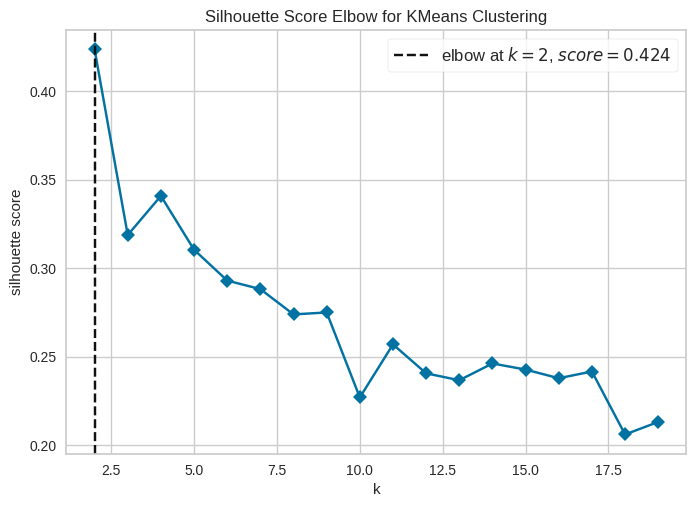

In [ ]:
model = KMeans(random_state=10, max_iter=500, init='k-means++')

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)

# Fit the data and visualize
print('Elbow Plot for MinMaxScaler data')
visualizer.fit(norm_crime)
visualizer.poof()
plt.show()

With the elbow method, the ideal number of clusters to use was 6.

We will also use the Silhouette score to determine an optimal number

In [ ]:
clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for MinMaxScaler Applied on data .
for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(norm_crime)
    sil_score1= silhouette_score(norm_crime, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.42364457559625074
For n_clusters = 3 The average silhouette_score is : 0.3187755079997931
For n_clusters = 4 The average silhouette_score is : 0.34089035600743633
For n_clusters = 5 The average silhouette_score is : 0.3062742525752849
For n_clusters = 6 The average silhouette_score is : 0.27035587392051724
For n_clusters = 7 The average silhouette_score is : 0.2371119747926814
For n_clusters = 8 The average silhouette_score is : 0.24422345369104229
For n_clusters = 9 The average silhouette_score is : 0.23181794623773663


According the the silhouette score of:

The MinMax Scaler Applied data, the ideal number of clusters is 2, with a score higher than other options, of 0.42, but if notice the number of cluster 4 has also the best variation within cluster and between cluster with zero to no values going towards -1 and no mismatch in cluster segregation than the consecutive rest

If we check silhouette score with Normalize data kmeans model 0.42>0.40 .Best score always close to +1.

###Build KMeans Cluster algorithm using K=2 and MinMaxScaler Applied Dataset

We have found good number of cluster = 2

Model building using cluster numbers = 2

In [ ]:
model_kmeans = KMeans(n_clusters=2, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(norm_crime)
y_predict_kmeans.shape

(50,)

In [ ]:
# these are nothing but cluster labels...
y_predict_kmeans

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
model_kmeans.labels_

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
# cluster centres associated with each lables
model_kmeans.cluster_centers_

array([[0.24518072, 0.23778539, 0.53615819, 0.22334195],
       [0.68463855, 0.72003425, 0.61694915, 0.56498708]])

Within-Cluster Sum of Squared:-

The lower values of inertia are better and zero is optimal.

Inertia is the sum of squared error for each cluster.

Therefore the smaller the inertia the denser the cluster(closer together all the points are)

In [ ]:
model_kmeans.inertia_

6.596893867946196

In [ ]:
#Assign clusters to the data set
crime_df['Kmeans_Label'] = model_kmeans.labels_

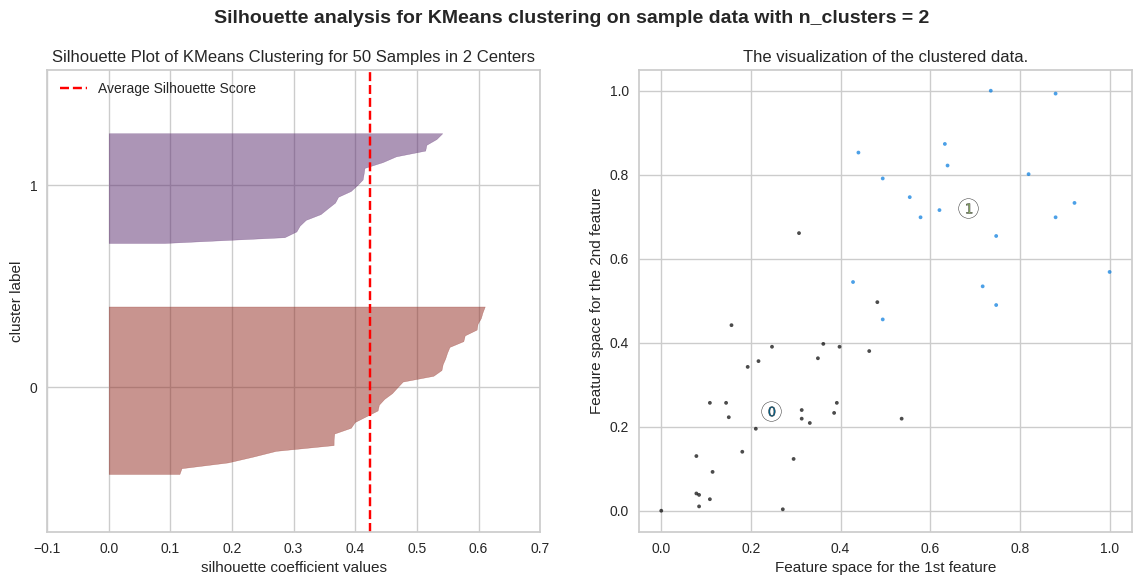

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(14,6)

sil_visualizer1 = SilhouetteVisualizer(model_kmeans,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a'])
sil_visualizer1.fit(norm_crime)

# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 4) # 6 is number of clusters
ax2.scatter(norm_crime[:, 0], norm_crime[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model_kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 0], centers1[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % 2),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

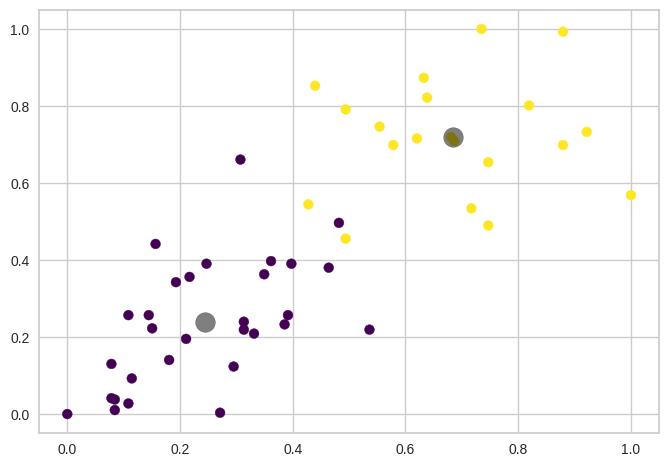

In [ ]:
#Visualize the data we reduced to 2 sets.
plt.scatter(norm_crime[:,0], norm_crime[:,1], c = model_kmeans.labels_, s = 50, cmap = "viridis")
centers = model_kmeans.cluster_centers_

# We want to create 2 centers and show them on the visual.
plt.scatter(centers[:,0], centers[:,1], c = "black", s = 200, alpha = 0.5)
plt.show()

In [ ]:
# Group data by Clusters (K=6)
crime_df.groupby('Kmeans_Label').agg(['mean'])

Murder     Assault   UrbanPop       Rape
                mean        mean       mean       mean
Kmeans_Label                                          
0              4.870  114.433333  63.633333  15.943333
1             12.165  255.250000  68.400000  29.165000

We can now clearly see the 2 number of clusters formed, which can be described as under

Cluster0, Safe Zone Defines the group of Urban States with Lowest of Crimes

Cluster1, Danger Zone Defines the group of Urban States with Highest Rate of Crimes

###Hierarchical Clustering Algorithm

####1)Dendogram on MinMaxScaler Applied on Dataset

applying Dendrogram on data. Or you may apply it on Standardized/normalized indepedent variable data.

Here diffrent linkage method from hyperparameter is used to see diff between methods for understanding.

Ward method is commanly used since it is simpler to visualize understanding.

Find number of cluster's using color coding of dendrogram. Each color indicates one cluster.

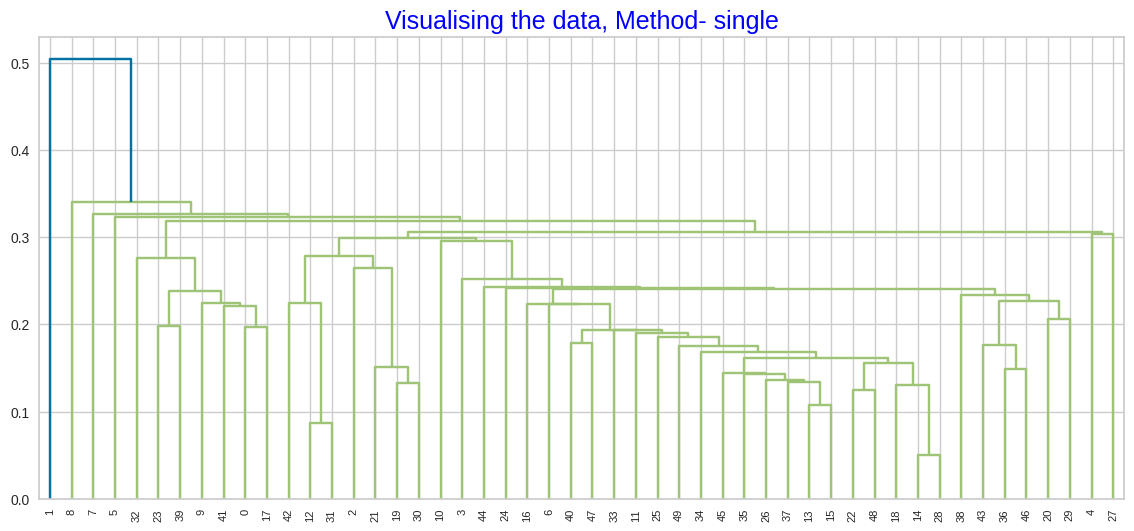

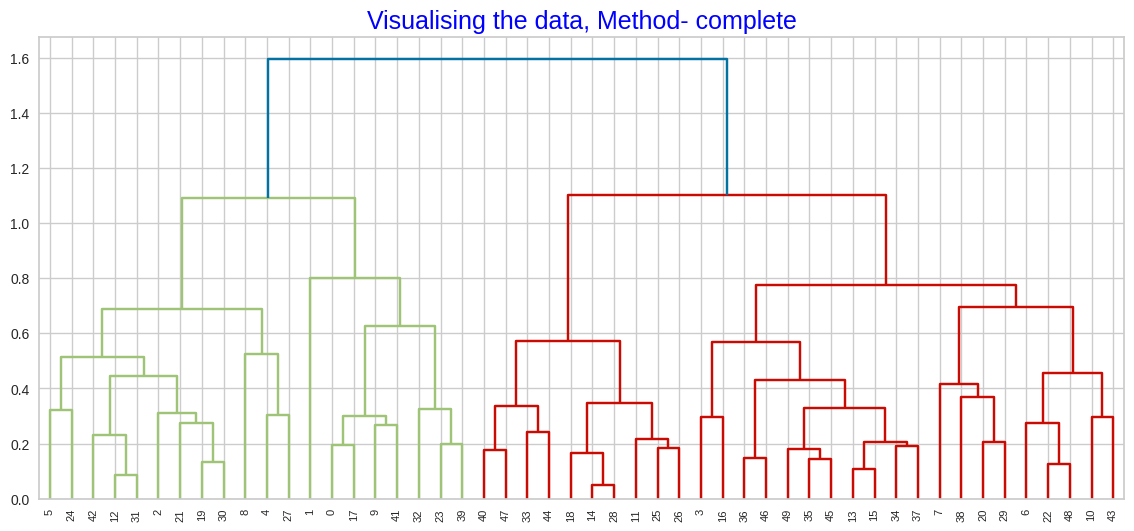

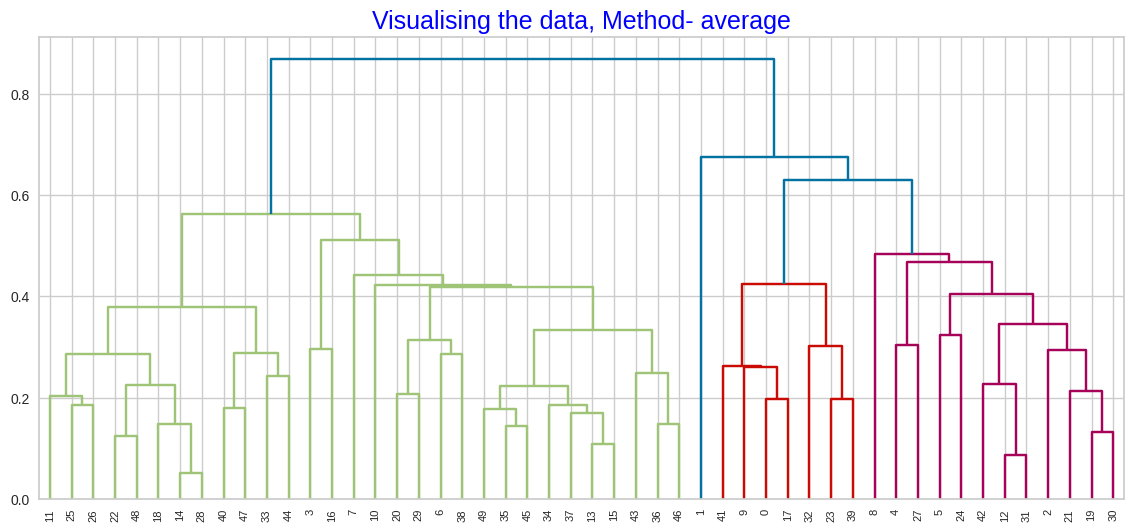

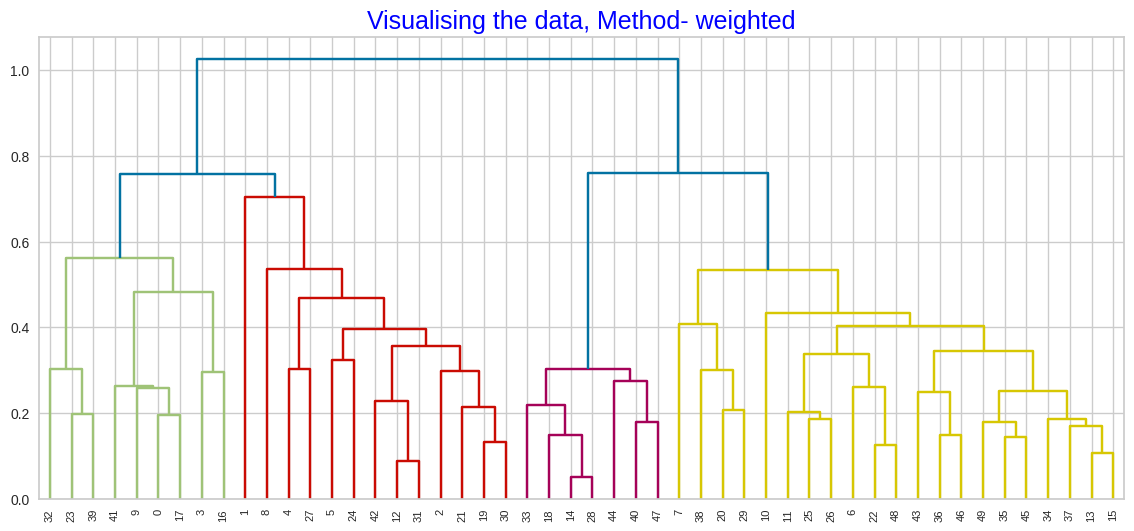

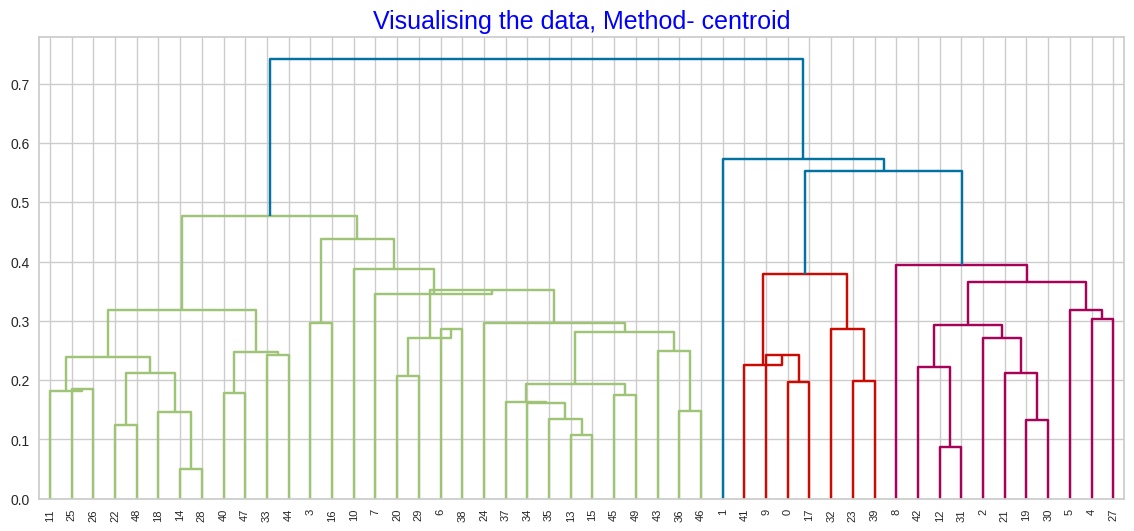

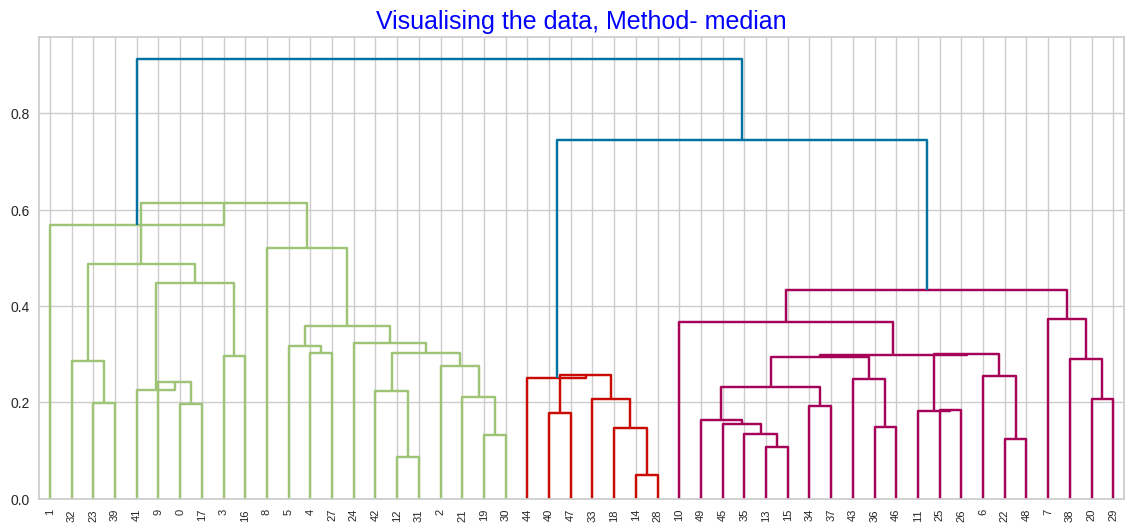

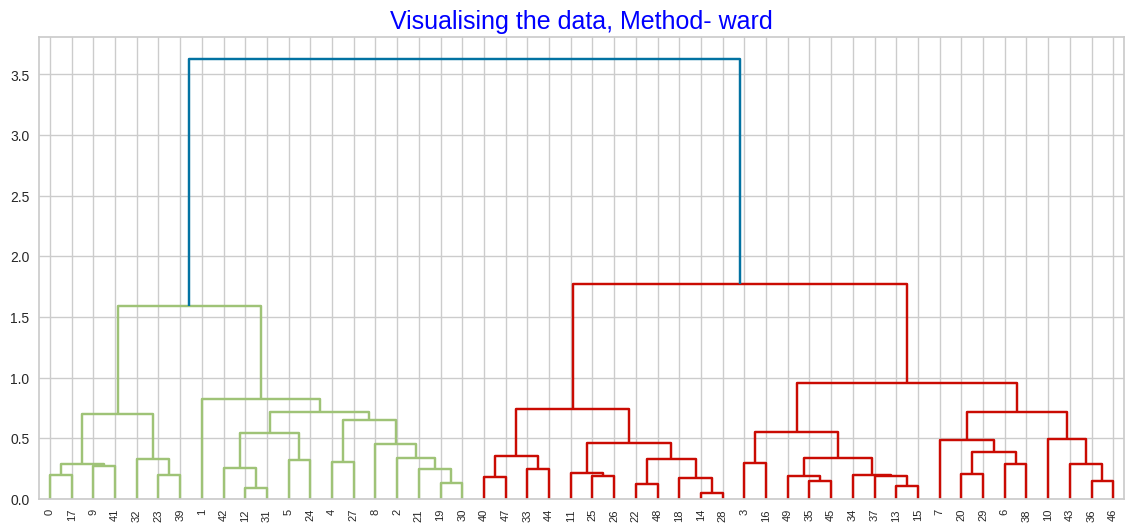

In [ ]:
for methods in ['single','complete','average','weighted','centroid','median','ward']:
    plt.figure(figsize =(14,6))
    dict = {'fontsize':18,'fontweight' :16, 'color' : 'blue'}
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict)
    Dendrogram1 = sch.dendrogram(sch.linkage(norm_crime, method = methods,optimal_ordering=False))

In [ ]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(norm_crime)
        silhouette_score1 = silhouette_score(norm_crime, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.42364457559625074
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.42364457559625074
For n_clusters = 2 The average silhouette_score with linkage- average : 0.42364457559625074
For n_clusters = 2 The average silhouette_score with linkage- single : 0.21033337025958487

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.31916915428121284
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.30877213909512063
For n_clusters = 3 The average silhouette_score with linkage- average : 0.35149572430421583
For n_clusters = 3 The average silhouette_score with linkage- single : 0.14223288708185444

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.3298707379986785
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.3060729442426308
For n_clusters = 4 The average silhouette_score with linkage- average : 0.36992391140277

The seperation in Each Method indicate that 2 as the optimal number for clusters.

####2)Dendrogram on Standard Scaler Applied on Data

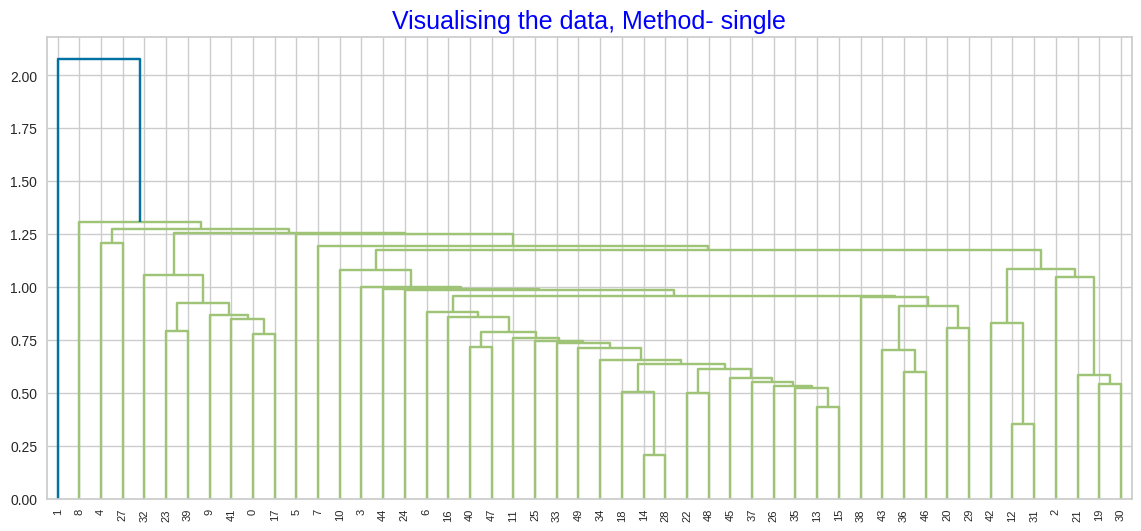

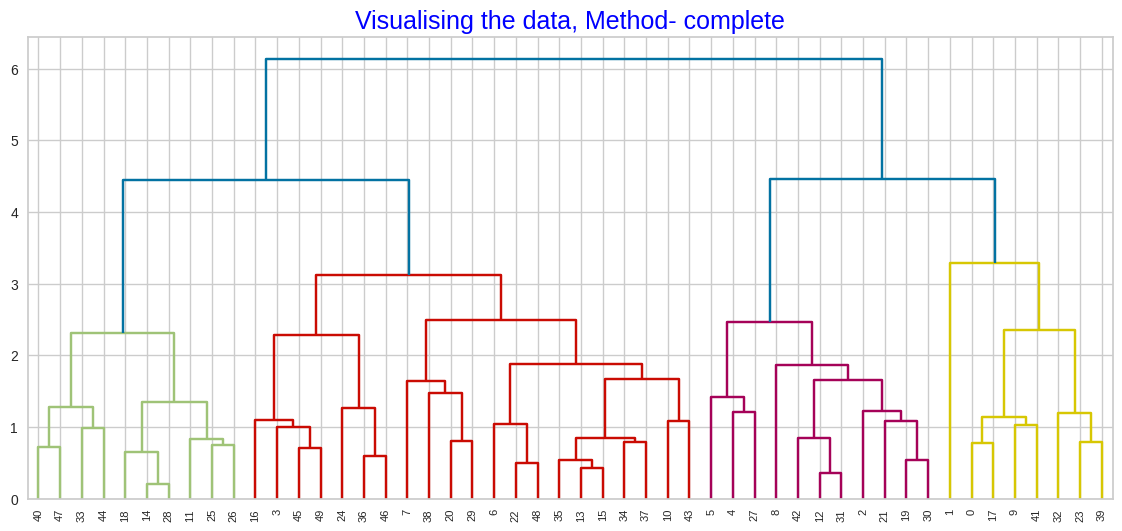

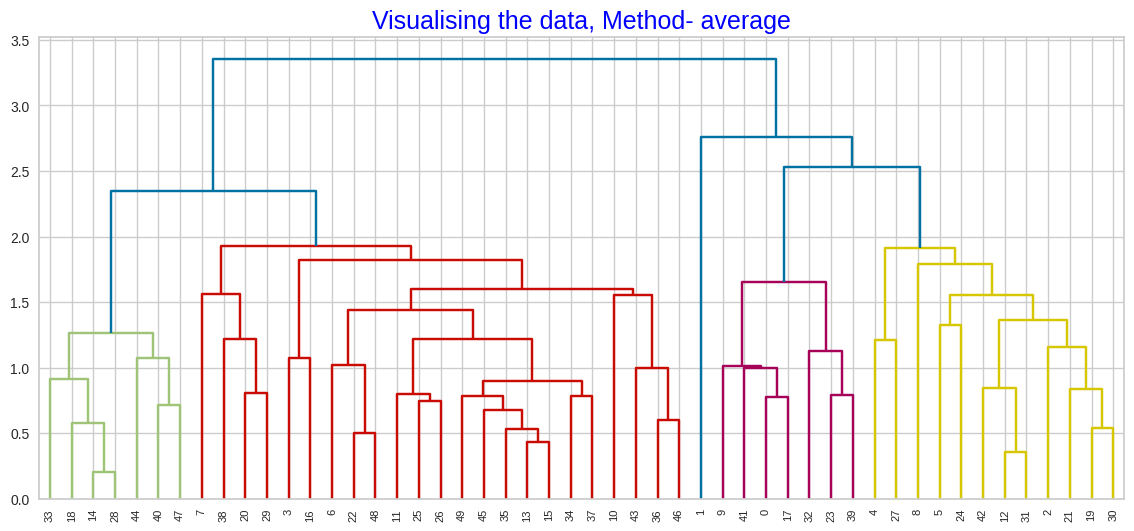

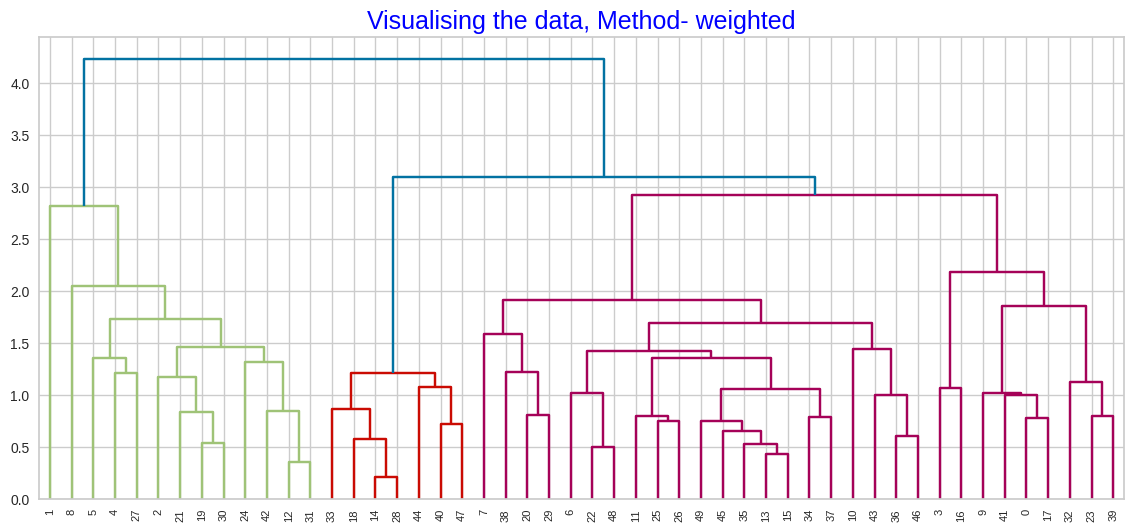

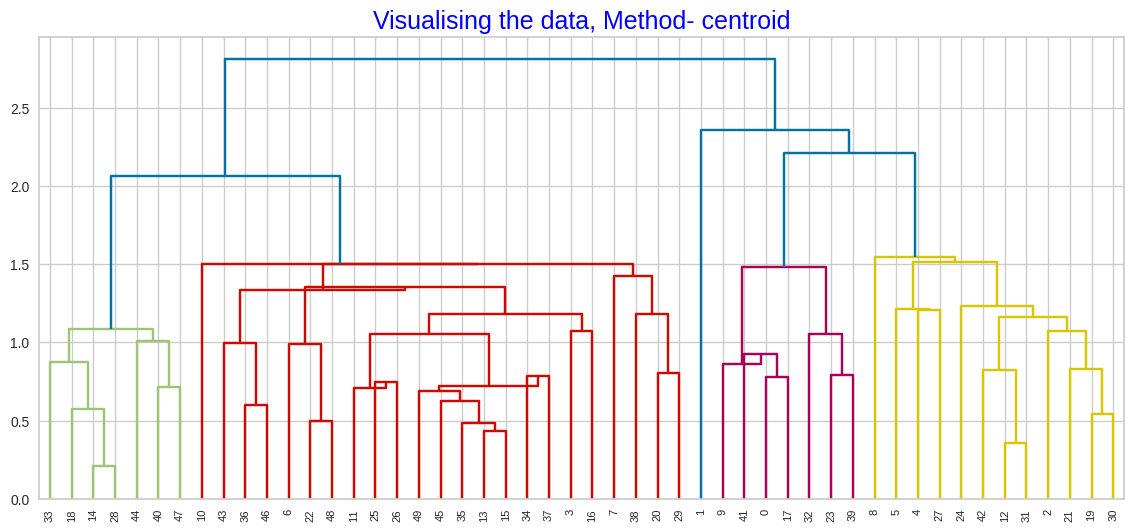

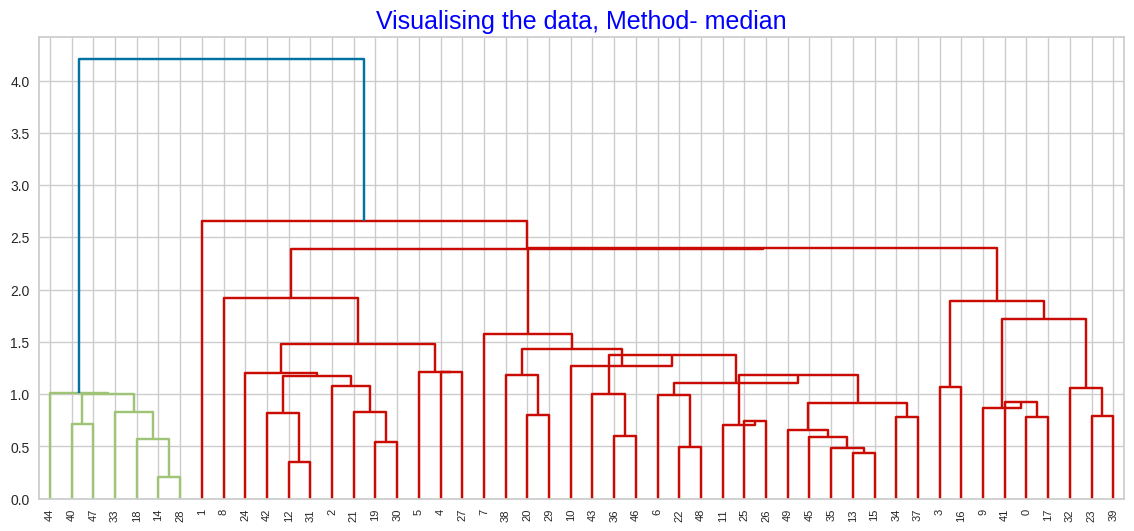

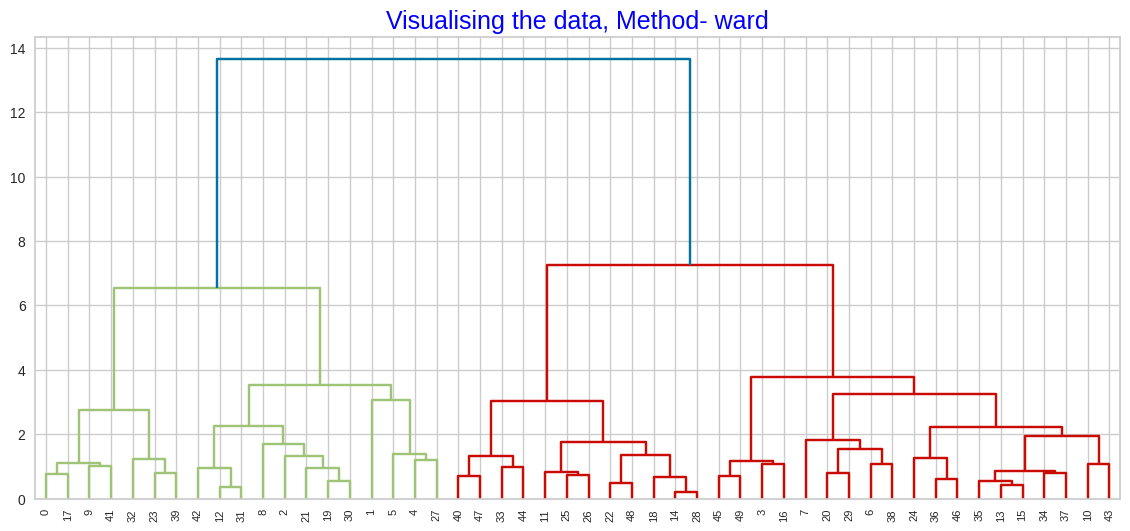

In [ ]:
for methods in ['single','complete','average','weighted','centroid','median','ward']:
    plt.figure(figsize =(14,6))
    dict = {'fontsize':18,'fontweight' :16, 'color' : 'blue'}
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict)
    Dendrogram1 = sch.dendrogram(sch.linkage(std_crime, method = methods,optimal_ordering=False))

In [ ]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster2 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels2 = hie_cluster2.fit_predict(std_crime)
        silhouette_score2 = silhouette_score(std_crime, hie_labels2)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score2)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.4047944502519567
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4047944502519567
For n_clusters = 2 The average silhouette_score with linkage- average : 0.4084890326217641
For n_clusters = 2 The average silhouette_score with linkage- single : 0.23455598753159795

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.31036358174027895
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.36924314190439733
For n_clusters = 3 The average silhouette_score with linkage- average : 0.34863679190476177
For n_clusters = 3 The average silhouette_score with linkage- single : 0.14582343625170263

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.3370187183556962
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.31595507426164543
For n_clusters = 4 The average silhouette_score with linkage- average : 0.3636819420151221

Conclusion:

Max score is with cluster numbers 2 in both standard scaler transformation and Min Max scaler transformation.

Heirarchical clustering means creating a tree of clusters by iteratively grouping or separating data points.

There are two types of hierarchical clustering: Agglomerative clustering Divisive clustering We now apply the Agglomerative clustering technique:

Agglomerative clustering is kind of a bottom-up approach. Each data point is assumed to be a separate cluster at first. Then the similar clusters are iteratively combined

####3)Run Hierarchical Clustering.(Agglomerative Clustering)

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_pred_hie = agg_clustering.fit_predict(norm_crime)
print(y_pred_hie.shape)
y_pred_hie

(50,)


array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [ ]:

# Cluster numbers
agg_clustering.n_clusters_

2

In [ ]:
# Clustering Score
(silhouette_score(norm_crime, agg_clustering.labels_)*100).round(3)

42.364

In [ ]:
#Putting Cluster lables into original dataset And analysis of the same

# Concating Labels with main dataset copy
crime_df['Hierarchical_Labels'] = agg_clustering.labels_

In [ ]:
crime_df.groupby('Hierarchical_Labels').agg(['mean'])

Murder     Assault   UrbanPop       Rape Kmeans_Label
                       mean        mean       mean       mean         mean
Hierarchical_Labels                                                       
0                     4.870  114.433333  63.633333  15.943333          0.0
1                    12.165  255.250000  68.400000  29.165000          1.0

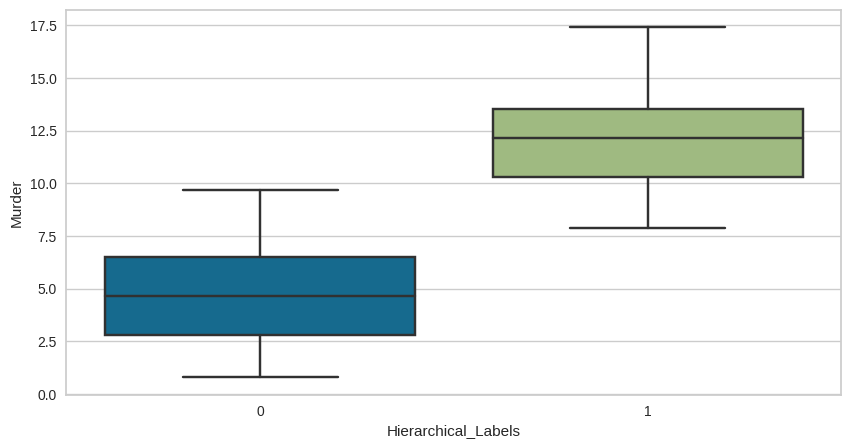

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Hierarchical_Labels', y='Murder', data= crime_df)
plt.show()

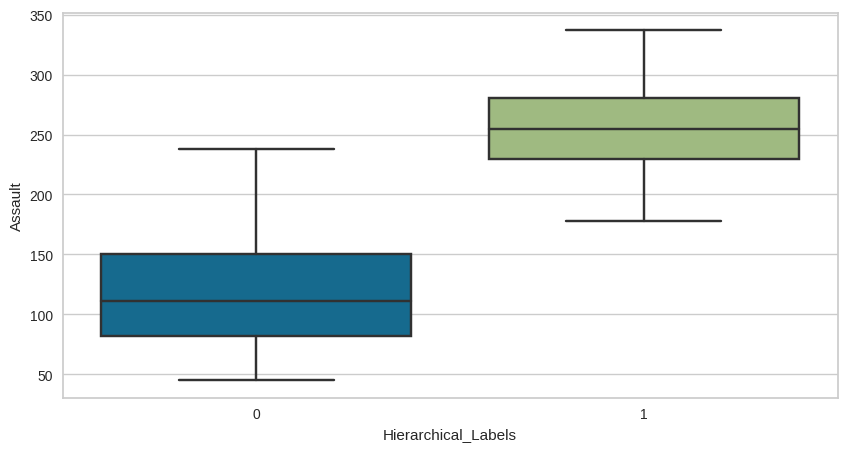

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Hierarchical_Labels', y='Assault', data= crime_df)
plt.show()

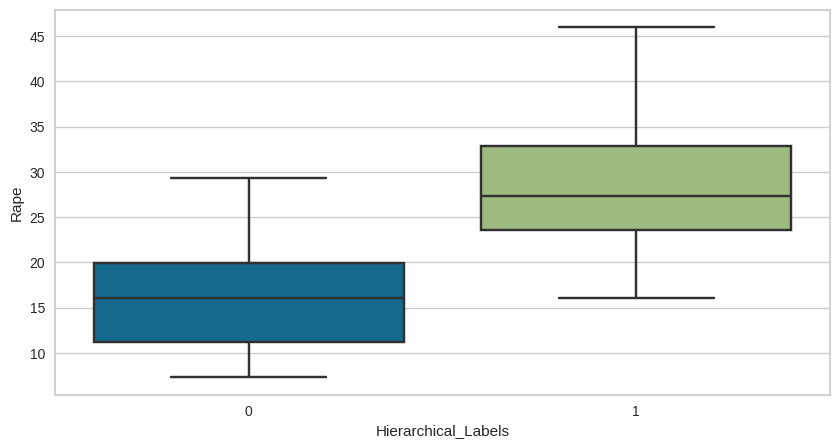

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Hierarchical_Labels', y='Rape', data= crime_df)
plt.show()

the Cities in the Cluster-0 seems to be Safe-Zone where there are relativley less Murders,Assaults and Rapes.

The Cities in Cluster-1 seems to have higher crime rates and can be regarded as Danger-Zone.

###DBSCAN - (Density Based Spatial Clustering of Applications with Noise)

####1 )DBSCAN of Standard Scaled Data

To choose the best combination of the algorithm parameters I will first create a matrix of investigated combinations

In [ ]:
from itertools import product

eps_values = np.arange(0.25,2,0.25) # eps values to be investigated
min_samples = np.arange(1,3)# min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [ ]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(std_crime)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(std_crime, DBS_clustering.labels_))

A heatplot shows how many clusters were genreated by the algorithm for the respective parameters combinations.


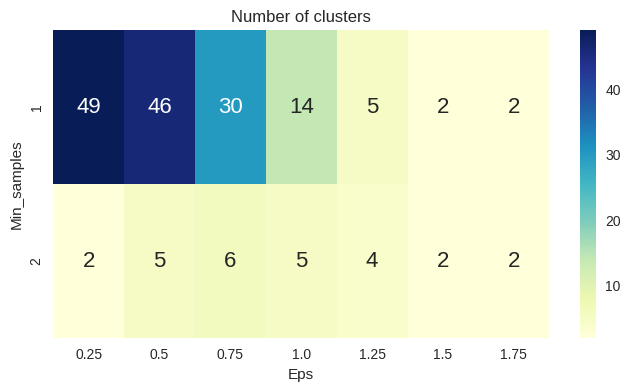

In [ ]:
#Collecting number of generated clusters.

tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters
pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

As the heatplot above shows, the number of clusters vary from 49 to 2.

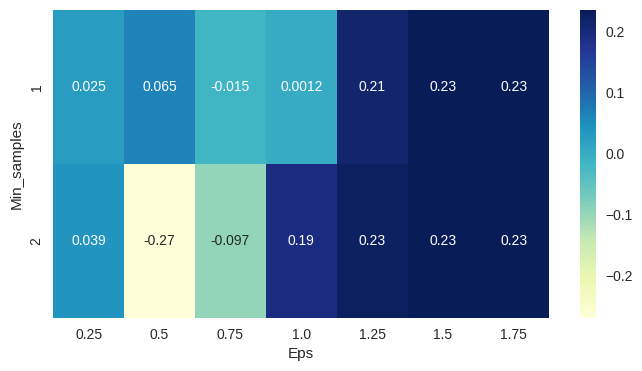

In [ ]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['Sil_score'] = sil_score
pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

Global maximum is 0.23 for eps=1.25 and min_samples=2

In [ ]:
epsilon = [0.25,0.50,0.75,1,1.25,1.50,1.75,2]
min_samples = [1,2]

sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):
        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(std_crime)
        #cluster_labels=dbscan.fit_predict(data)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        silhouette_avg = silhouette_score(std_crime, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0],
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 1.5 
min_sample= 1 
number of clusters= 2 
average silhouette score= 0.2346


Run DBSCAN on Standard Scaled data with optimal min_sample and epsilon values

In [ ]:
dbscan = DBSCAN(eps=1.5, min_samples=1) # min_samples = number of columns  or len(dataset.columns)* 3
dbscan.fit(std_crime)

DBSCAN(eps=1.5, min_samples=1)

In [ ]:
dbscan.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

-1 are the noise points in our dataset and the rest are the clusters

In [ ]:
# Concating Labels with main dataset copy
crime_df['DBSCAN_Labels'] = dbscan.labels_
crime_df.head()

Murder  Assault  UrbanPop  Rape  Kmeans_Label  \
States                                                      
Alabama       13.2      236        58  21.2             1   
Alaska        10.0      263        48  44.5             1   
Arizona        8.1      294        80  31.0             1   
Arkansas       8.8      190        50  19.5             0   
California     9.0      276        91  40.6             1   

            Hierarchical_Labels  DBSCAN_Labels  
States                                          
Alabama                       1              0  
Alaska                        1              1  
Arizona                       1              0  
Arkansas                      0              0  
California                    1              0

In [ ]:
crime_df.groupby('DBSCAN_Labels').agg(['mean'])

Murder     Assault   UrbanPop       Rape Kmeans_Label  \
                    mean        mean       mean       mean         mean   
DBSCAN_Labels                                                             
0               7.742857  168.877551  65.897959  20.757143     0.387755   
1              10.000000  263.000000  48.000000  44.500000     1.000000   

              Hierarchical_Labels  
                             mean  
DBSCAN_Labels                      
0                        0.387755  
1                        1.000000

###Silhouette Score for DBSCAN

In [ ]:
print("Silhouette Coefficient: %0.3f" % silhouette_score(std_crime, dbscan.labels_))

Silhouette Coefficient: 0.235


###2)DBSCAN on MinMax Scaled Data

To choose the best combination of the algorithm parameters I will first create a matrix of investigated combinations.

In [ ]:
from itertools import product

eps_values = np.arange(0.25,0.75,0.25) # eps values to be investigated
min_samples = np.arange(1,3)# min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [ ]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(norm_crime)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(norm_crime, DBS_clustering.labels_))

####Collecting number of generated clusters.

A heatplot shows how many clusters were genreated by the algorithm for the respective parameters combinations.


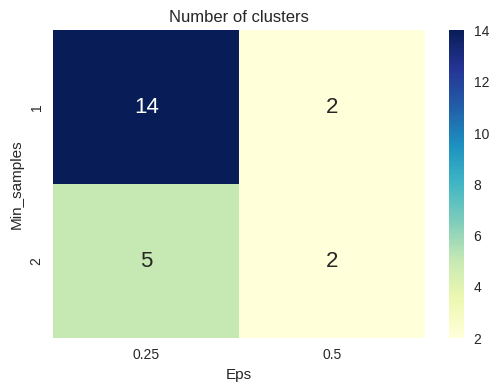

In [ ]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters
pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

As the heatplot above shows, the number of clusters vary from 14 to 2.

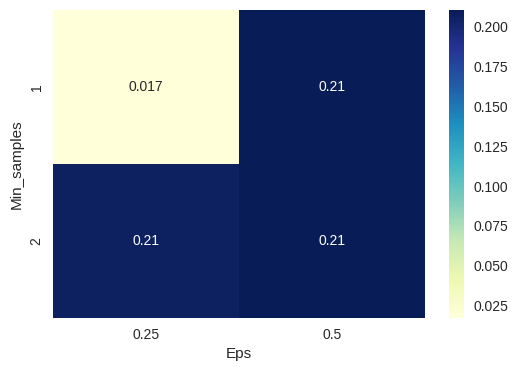

In [ ]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['Sil_score'] = sil_score
pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

Global maximum is 0.21 for eps=0.5 and min_samples=2

In [ ]:
epsilon = [0.25,0.5]
min_samples = [1,2]
sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(norm_crime)
        #cluster_labels=dbscan.fit_predict(data)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        silhouette_avg = silhouette_score(norm_crime, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0],
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 0.5 
min_sample= 1 
number of clusters= 2 
average silhouette score= 0.2103


Run DBSCAN on Standard Scaled data with optimal min_sample and epsilon values

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=1) # min_samples = number of clumns * 3
dbscan.fit(norm_crime)

DBSCAN(min_samples=1)

In [ ]:
dbscan.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

-1 are the noise points in our dataset and the rest are the clusters

In [ ]:
# Concating Labels with main dataset copy
crime_df['DBSCAN_Labels'] = dbscan.labels_
crime_df.head()

Murder  Assault  UrbanPop  Rape  Kmeans_Label  \
States                                                      
Alabama       13.2      236        58  21.2             1   
Alaska        10.0      263        48  44.5             1   
Arizona        8.1      294        80  31.0             1   
Arkansas       8.8      190        50  19.5             0   
California     9.0      276        91  40.6             1   

            Hierarchical_Labels  DBSCAN_Labels  
States                                          
Alabama                       1              0  
Alaska                        1              1  
Arizona                       1              0  
Arkansas                      0              0  
California                    1              0

In [ ]:
crime_df.groupby('DBSCAN_Labels').agg(['mean'])

Murder     Assault   UrbanPop       Rape Kmeans_Label  \
                    mean        mean       mean       mean         mean   
DBSCAN_Labels                                                             
0               7.742857  168.877551  65.897959  20.757143     0.387755   
1              10.000000  263.000000  48.000000  44.500000     1.000000   

              Hierarchical_Labels  
                             mean  
DBSCAN_Labels                      
0                        0.387755  
1                        1.000000

In [ ]:
# Sorting elements based on cluster label assigned and taking average for insights.
cluster1 = pd.DataFrame(crime_df.loc[crime_df.DBSCAN_Labels==0].mean(),columns= ['Cluster1_Avg'])
cluster2 = pd.DataFrame(crime_df.loc[crime_df.DBSCAN_Labels==1].mean(),columns= ['Cluster2_Avg'])
avg_crime = pd.concat([cluster1,cluster2],axis=1)
avg_crime

Cluster1_Avg  Cluster2_Avg
Murder                   7.742857          10.0
Assault                168.877551         263.0
UrbanPop                65.897959          48.0
Rape                    20.757143          44.5
Kmeans_Label             0.387755           1.0
Hierarchical_Labels      0.387755           1.0
DBSCAN_Labels            0.000000           1.0

The Cities in the Cluster-0 seems to be Safe-Zone where there are relativley less Murders,Assaults and Rapes.

The Cities in Cluster-1 seems to have higher crime rates and can be regarded as Danger-Zone.

####Applied EDA to analyze dataset.

####Discovered correlation between diff variables and found colinearity.
Applied Standardazation & MinMaxScalar transformation on the data to use Principle componets analysis effectively.

#####used & analyzed Three clustering techniques here. i) KMeans, ii) Hierarchical Clusterig & iii) DBSCAN.

####By applying clustering on different transformation data shows fluctuation in model score. So finally the Standard Scaler found less score so not used for further model building.

####Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters.

####KMeans clustering is sensitive to outliers.

#2)Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters.
##Draw the inferences from the clusters obtained.

###Data Description:

The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:

cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:

cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000 2 = 5,000 - 10,000 3 = 10,001 - 25,000 4 = 25,001 - 50,000 5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not

In [ ]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.cluster.hierarchy as sch
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, silhouette_samples

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving EastWestAirlines.xlsx to EastWestAirlines.xlsx


In [ ]:
#Importing data set
airlines = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
airlines.head()

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1

###Column Rename and Set ID as Index Column

In [ ]:
airlines.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace=True)
airlines.set_index('ID',inplace=True)
airlines

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID                                                                        
1       28143           0          1          1          1          174   
2       19244           0          1          1          1          215   
3       41354           0          1          1          1         4123   
4       14776           0          1          1          1          500   
5       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
4017    18476           0          1          1          1         8525   
4018    64385           0          1          1          1          981   
4019    73597           0          3          1          1        25447   
4020    54899           0          1          1          1          500   
4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID                                                                         
1               1                  0                0               7000   
2               2                  0                0               6968   
3               4                  0                0               7034   
4               1                  0                0               6952   
5              26               2077                4               6935   
...           ...                ...              ...                ...   
4017            4                200                1               1403   
4018            5                  0                0               1395   
4019            8                  0                0               1402   
4020            1                500                1               1401   
4021            0                  0                0               1398   

      Award  
ID           
1         0  
2         0  
3         0  
4         0  
5         1  
...     ...  
4017      1  
4018      1  
4019      1  
4020      0  
4021      0  

[3999 rows x 11 columns]

###Data Understanding

In [ ]:
airlines.describe()

Balance    Qual_miles    cc1_miles    cc2_miles    cc3_miles  \
count  3.999000e+03   3999.000000  3999.000000  3999.000000  3999.000000   
mean   7.360133e+04    144.114529     2.059515     1.014504     1.012253   
std    1.007757e+05    773.663804     1.376919     0.147650     0.195241   
min    0.000000e+00      0.000000     1.000000     1.000000     1.000000   
25%    1.852750e+04      0.000000     1.000000     1.000000     1.000000   
50%    4.309700e+04      0.000000     1.000000     1.000000     1.000000   
75%    9.240400e+04      0.000000     3.000000     1.000000     1.000000   
max    1.704838e+06  11148.000000     5.000000     3.000000     5.000000   

         Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count    3999.000000   3999.00000        3999.000000      3999.000000   
mean    17144.846212     11.60190         460.055764         1.373593   
std     24150.967826      9.60381        1400.209171         3.793172   
min         0.000000      0.00000           0.000000         0.000000   
25%      1250.000000      3.00000           0.000000         0.000000   
50%      7171.000000     12.00000           0.000000         0.000000   
75%     23800.500000     17.00000         311.000000         1.000000   
max    263685.000000     86.00000       30817.000000        53.000000   

       Days_since_enroll        Award  
count         3999.00000  3999.000000  
mean          4118.55939     0.370343  
std           2065.13454     0.482957  
min              2.00000     0.000000  
25%           2330.00000     0.000000  
50%           4096.00000     0.000000  
75%           5790.50000     1.000000  
max           8296.00000     1.000000

In [ ]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


Different cc_miles have different max values. so, we want to check what values these columns can take

In [ ]:
print('unique_cc1',airlines.cc1_miles.unique())
print('unique_cc2',airlines.cc2_miles.unique())
print('unique_cc3',airlines.cc3_miles.unique())

unique_cc1 [1 4 3 2 5]
unique_cc2 [1 2 3]
unique_cc3 [1 3 2 4 5]


In [ ]:
print('unique_cc1',airlines.cc1_miles.unique())
print('unique_cc2',airlines.cc2_miles.unique())
print('unique_cc3',airlines.cc3_miles.unique())

unique_cc1 [1 4 3 2 5]
unique_cc2 [1 2 3]
unique_cc3 [1 3 2 4 5]


###EDA

Analyze the features by creating histograms to understand the distribution

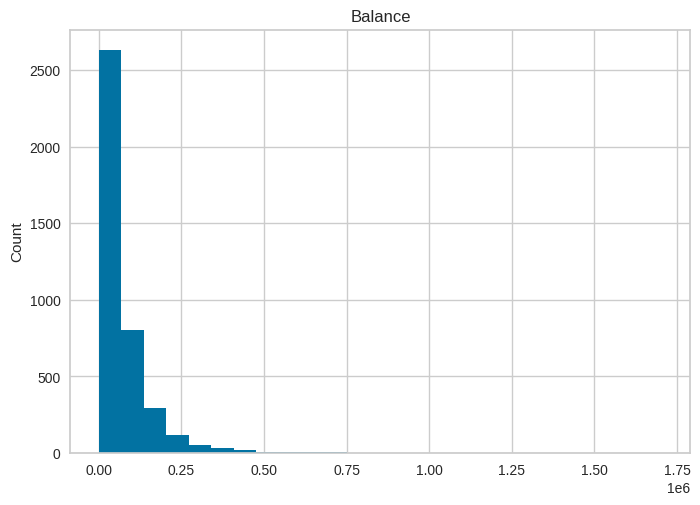

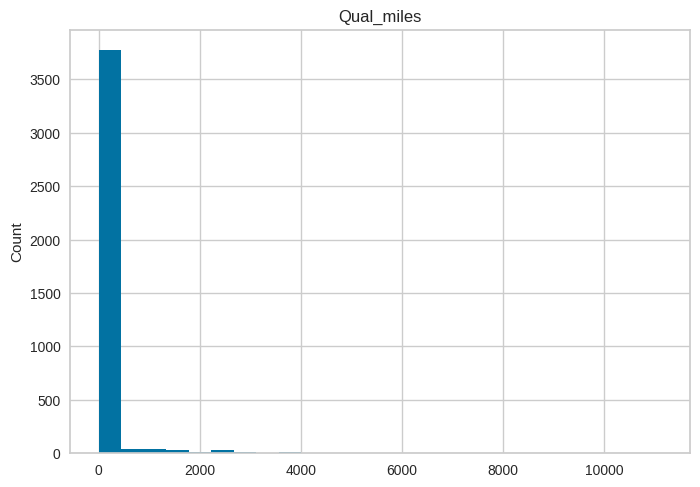

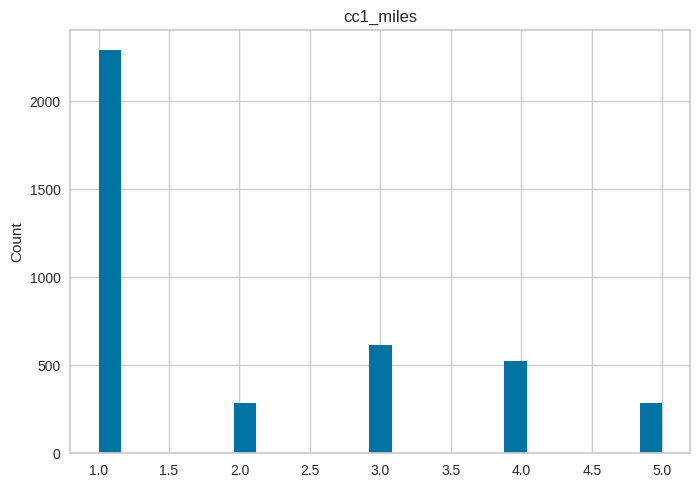

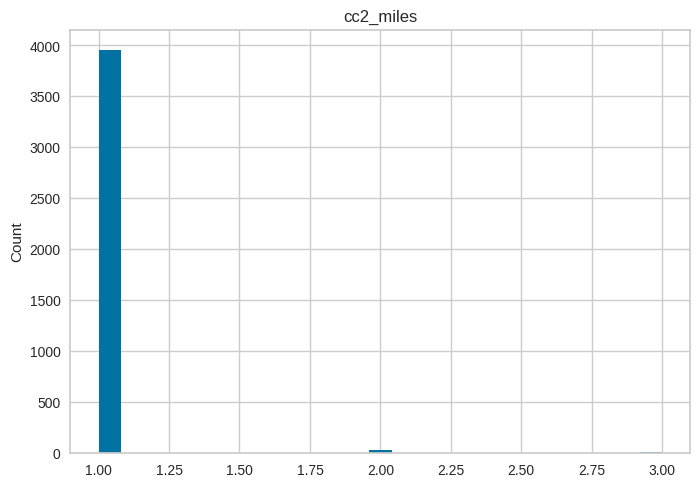

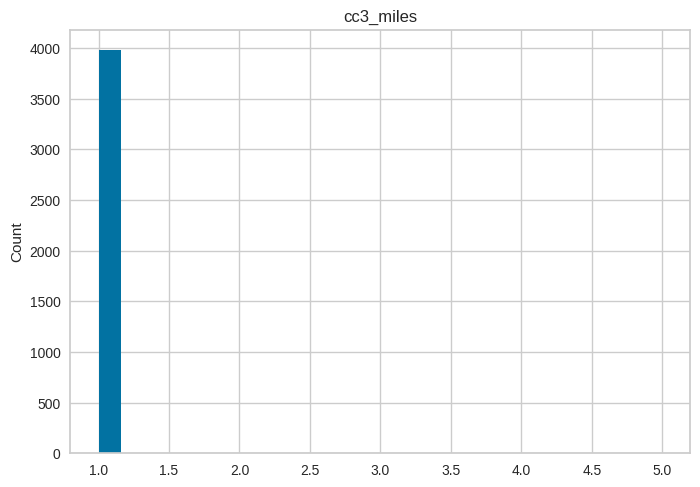

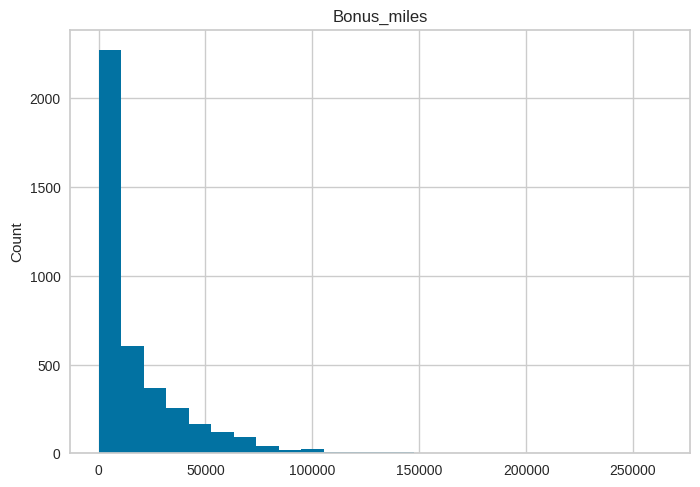

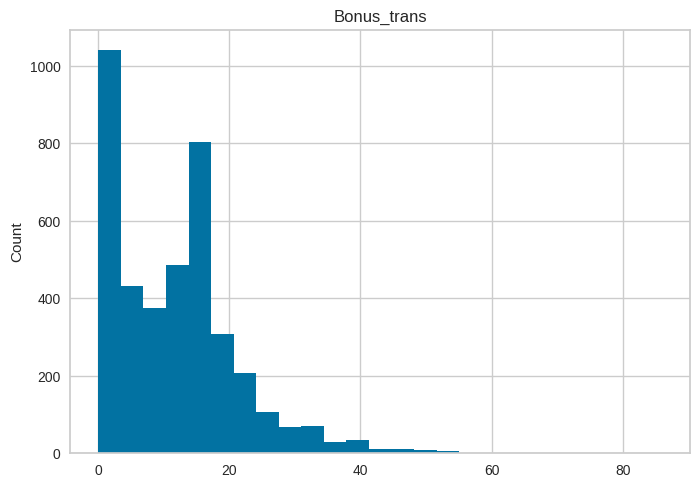

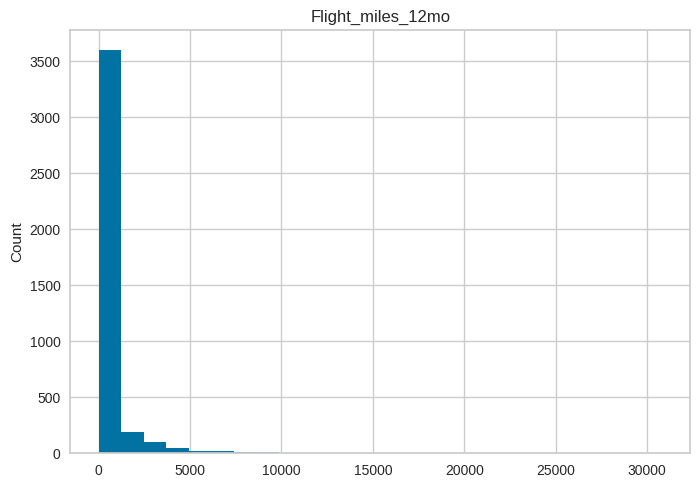

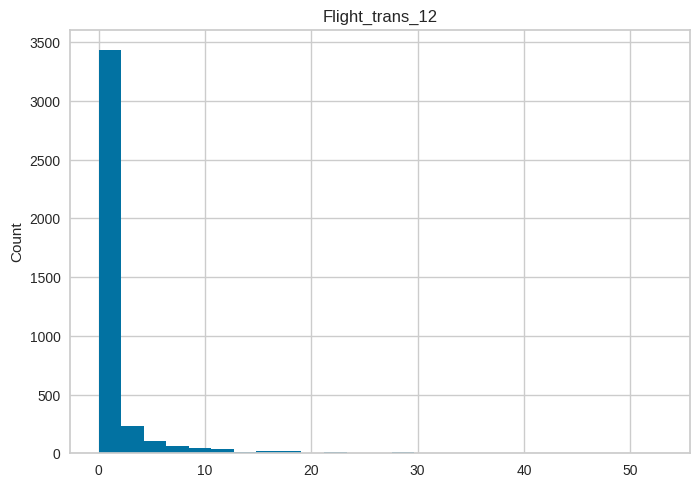

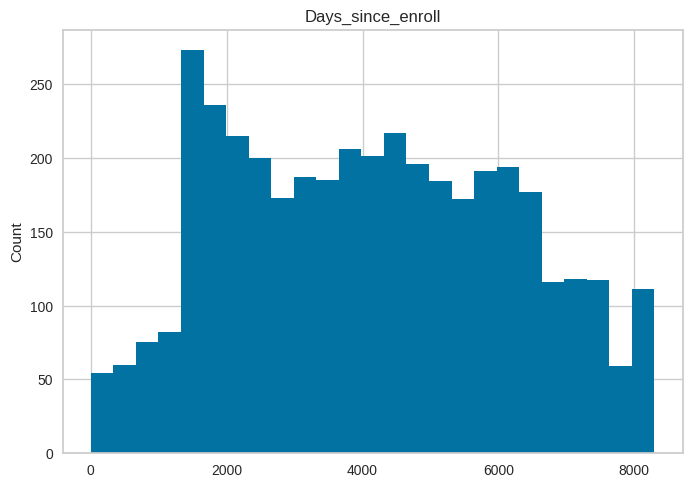

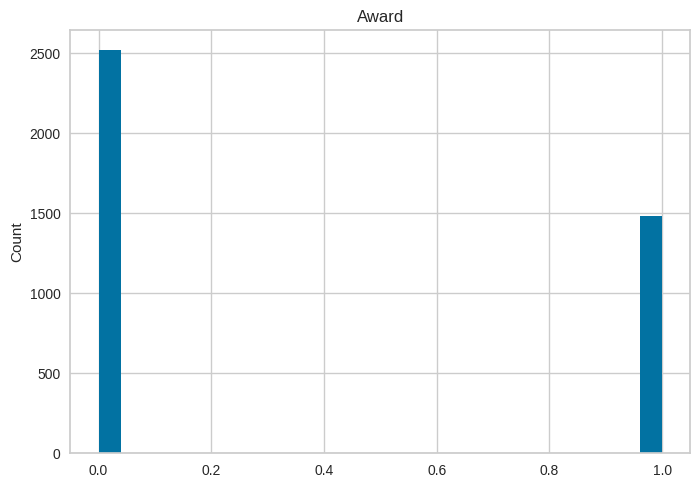

In [ ]:
for feature in airlines.columns:
    airline_data1 = airlines.copy()
    airline_data1[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

###Outliers Detection

In [ ]:
airlines.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

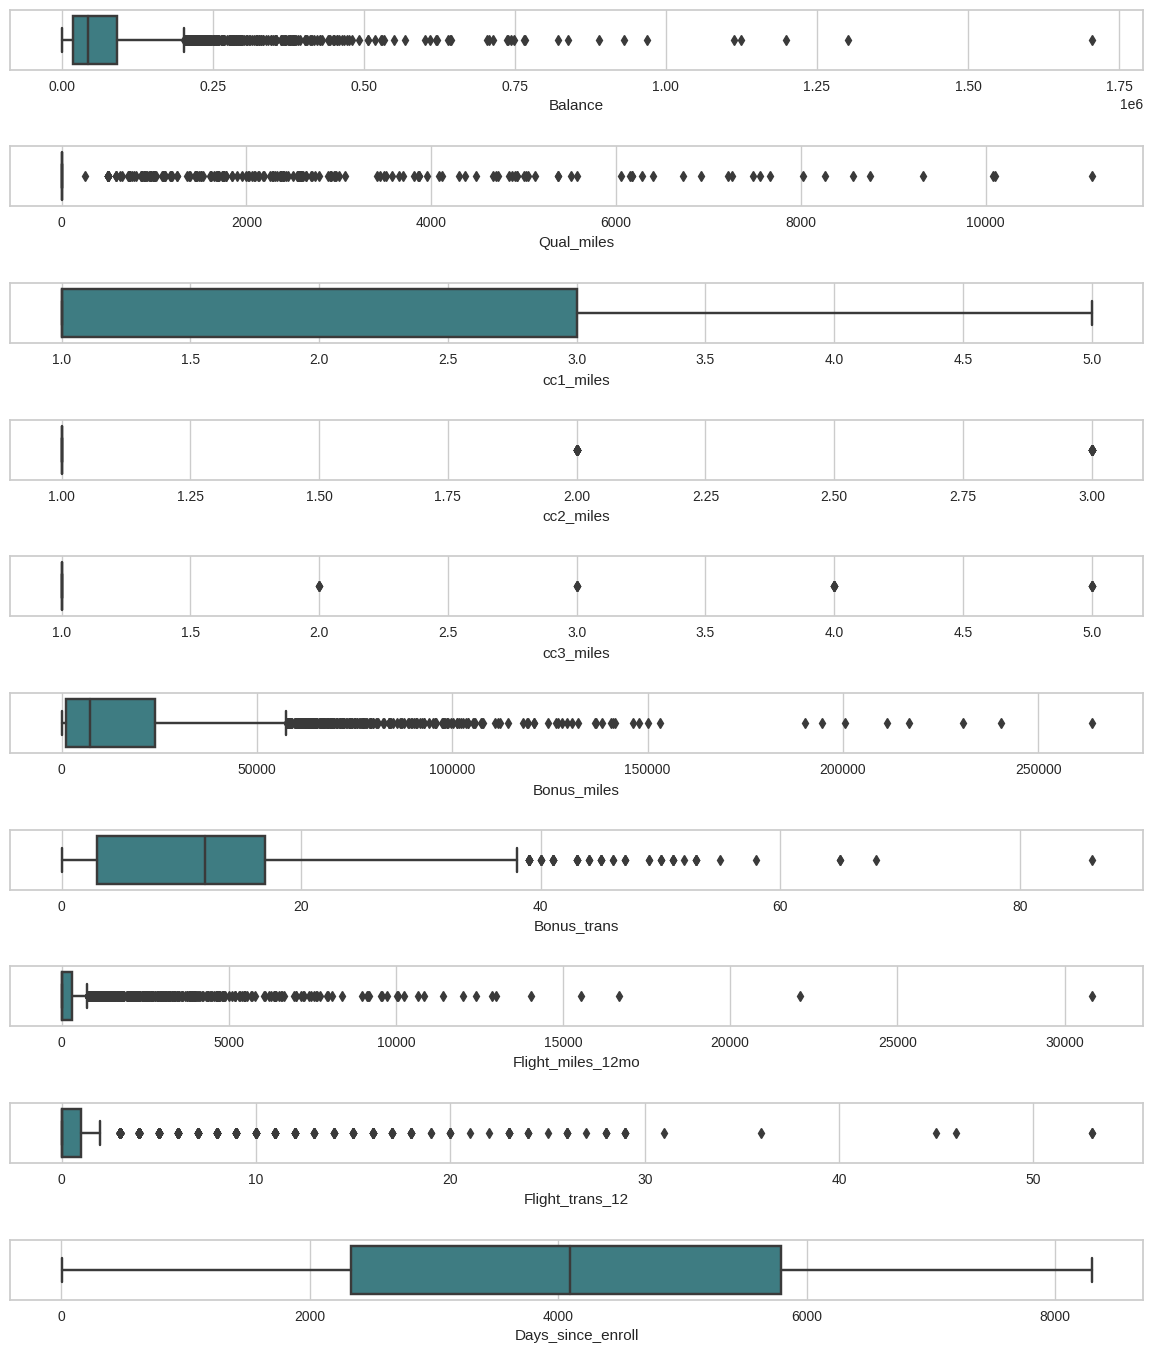

In [ ]:
outlier = airlines.copy()
fig, axes=plt.subplots(10,1,figsize=(12,14),sharex=False,sharey=False)
sns.boxplot(x='Balance',data=outlier,palette='crest',ax=axes[0])
sns.boxplot(x='Qual_miles',data=outlier,palette='crest',ax=axes[1])
sns.boxplot(x='cc1_miles',data=outlier,palette='crest',ax=axes[2])
sns.boxplot(x='cc2_miles',data=outlier,palette='crest',ax=axes[3])
sns.boxplot(x='cc3_miles',data=outlier,palette='crest',ax=axes[4])
sns.boxplot(x='Bonus_miles',data=outlier,palette='crest',ax=axes[5])
sns.boxplot(x='Bonus_trans',data=outlier,palette='crest',ax=axes[6])
sns.boxplot(x='Flight_miles_12mo',data=outlier,palette='crest',ax=axes[7])
sns.boxplot(x='Flight_trans_12',data=outlier,palette='crest',ax=axes[8])
sns.boxplot(x='Days_since_enroll',data=outlier,palette='crest',ax=axes[9])
plt.tight_layout(pad=2.0)

In [ ]:
countNotermdeposit = len(airlines[airlines.Award == 0])
countHavetermdeposit = len(airlines[airlines.Award == 1])
print("Percentage of Customer doesn't have a Award: {:.2f}%".format((countNotermdeposit / (len(airlines.Award))*100)))
print("Percentage of Customer does have a Award: {:.2f}%".format((countHavetermdeposit / (len(airlines.Award))*100)))

Percentage of Customer doesn't have a Award: 62.97%
Percentage of Customer does have a Award: 37.03%


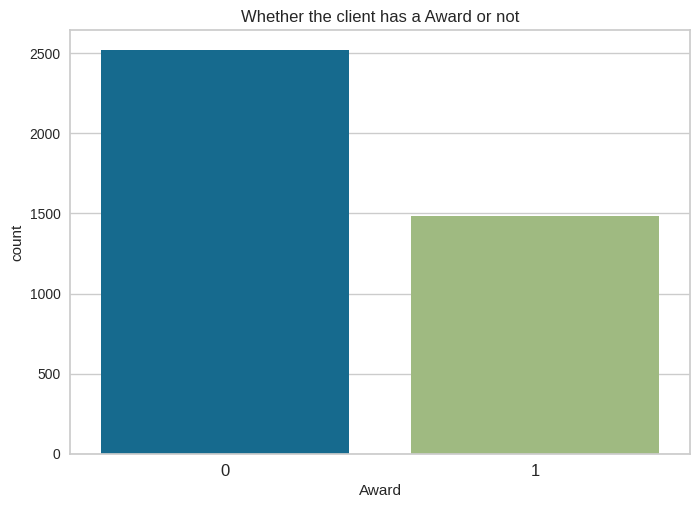

In [ ]:
sns.countplot(x='Award', data= airlines, order= airlines['Award'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Whether the client has a Award or not')
plt.show()

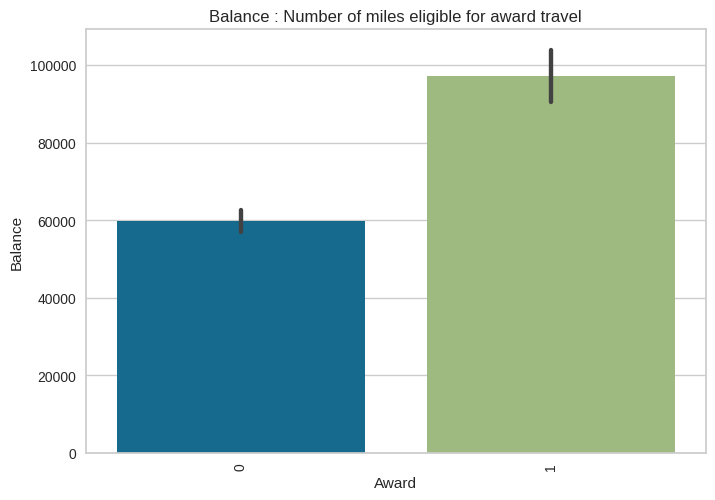

In [ ]:
Balance = airlines[['Award','Balance']].sort_values('Balance', ascending = False)
ax = sns.barplot(x='Award', y='Balance', data= Balance)
ax.set(xlabel = 'Award', ylabel= 'Balance')
plt.title('Balance : Number of miles eligible for award travel')
plt.xticks(rotation=90)
plt.show()

###Correlated with Balance

In [ ]:
corr_matrix = airlines.corr()
corr_matrix["Balance"].sort_values(ascending=False)

Balance              1.000000
Bonus_miles          0.403487
cc1_miles            0.338344
Bonus_trans          0.324935
Days_since_enroll    0.263129
Flight_trans_12      0.255700
Flight_miles_12mo    0.217551
Award                0.178494
Qual_miles           0.108722
cc3_miles            0.035243
cc2_miles           -0.008804
Name: Balance, dtype: float64

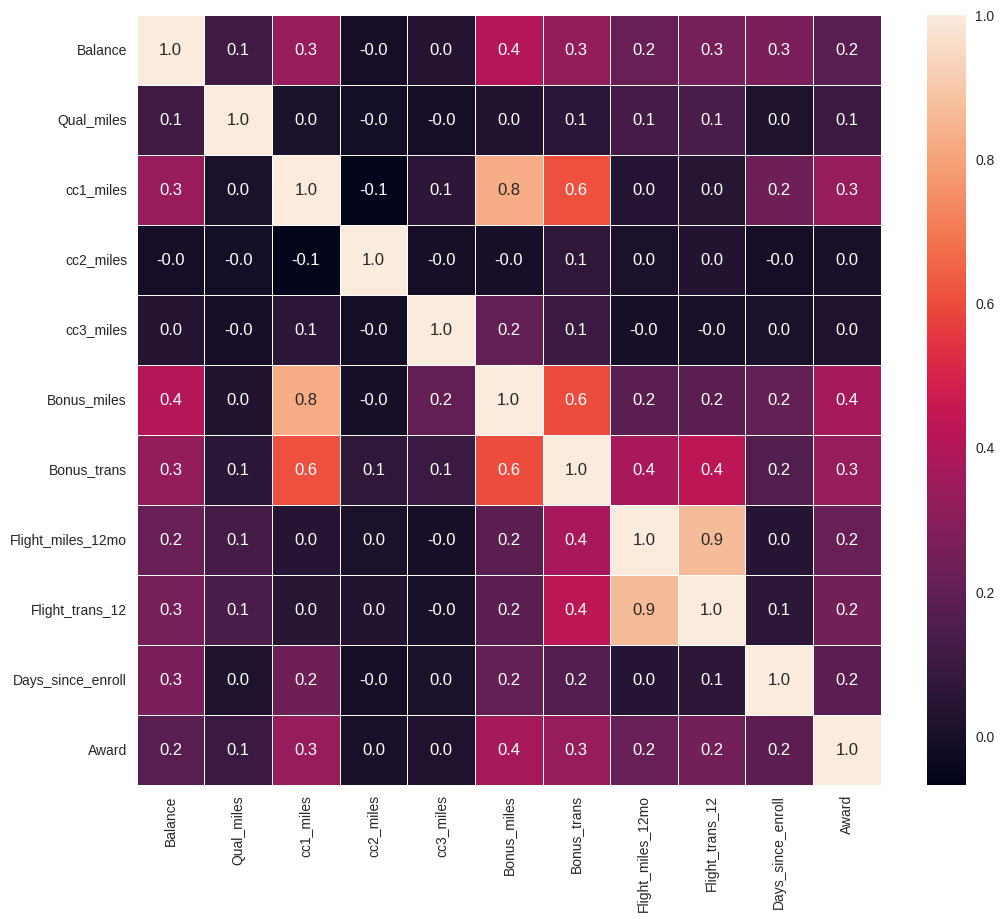

In [ ]:
#Correlation Heatmap

f,ax = plt.subplots(figsize=(12,10))
sns.heatmap(airlines.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

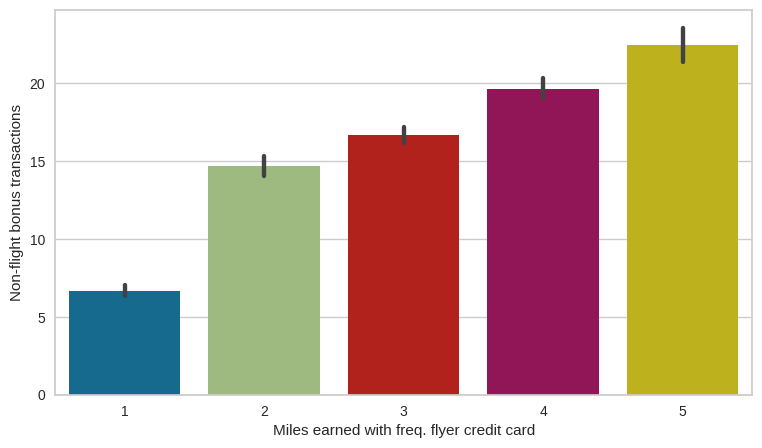

In [ ]:
#Plotting frequent flying bonuses vs. non-flight bonus transactions

plt.figure(figsize = (9,5))
sorted_data = airlines[['cc1_miles','Bonus_trans']].sort_values('Bonus_trans', ascending = False)
ax = sns.barplot(x='cc1_miles', y='Bonus_trans', data= sorted_data)
ax.set(xlabel = 'Miles earned with freq. flyer credit card', ylabel= 'Non-flight bonus transactions')
plt.show()

###Data Preprocessing

In [ ]:
#1) Standardizing the Data

standard_scaler = StandardScaler()
std_airline = standard_scaler.fit_transform(airlines)
std_airline.shape

(3999, 11)

In [ ]:
#2) Normalizing the data
minmax = MinMaxScaler()
norm_airline = minmax.fit_transform(airlines)
norm_airline.shape

(3999, 11)

###K Means Clustering

####1)elbow Method for Determining Cluster Amount

In [ ]:
#Standard Scaler Applied on Data

cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(std_airline)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"Num_Clusters":cluster_range,"Cluster_Errors":cluster_errors})
clusters_df

Num_Clusters  Cluster_Errors
0              1    43989.000000
1              2    35409.516630
2              3    30899.598211
3              4    27161.404447
4              5    24883.753609
5              6    21756.873762
6              7    18891.794441
7              8    17316.753604
8              9    15960.406001
9             10    14731.000299
10            11    13939.823745
11            12    12947.035709
12            13    12427.746998
13            14    11978.786109

Within-Cluster Sum-of-Squares Criterion:

Useing Elbow Graph to find optimum number of clusters (K value) from K values range

The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS

Random state can be anything from 0 to 42, but the same number to be used everytime,so that the results don't change.

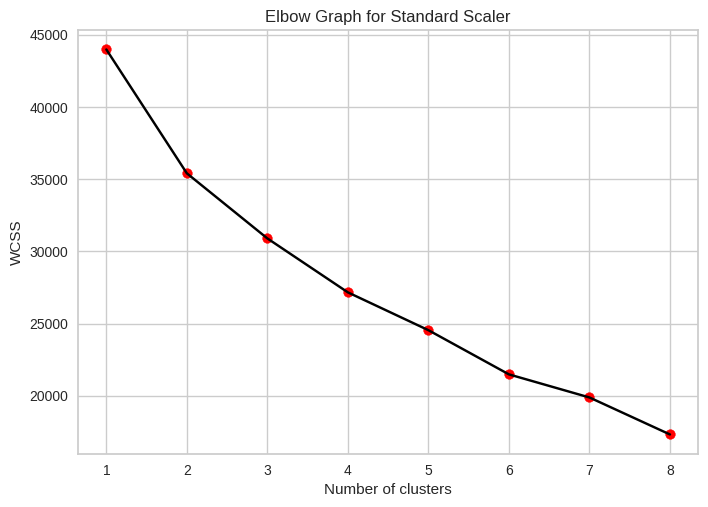

In [ ]:
wcss=[]
for i in range(1,9):
    kmeans = KMeans(n_clusters=i,random_state=2)
    kmeans.fit(std_airline)
    wcss.append(kmeans.inertia_)

# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

There is no clear "elbow" visible. A choice of 3 or 4 clusters seems to be fair

####2)Silhouette Score

In [ ]:
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(std_airline)
    clusters_inertia.append(KM_est.inertia_)  # data for the elbow method
    silhouette_avg = silhouette_score(std_airline, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

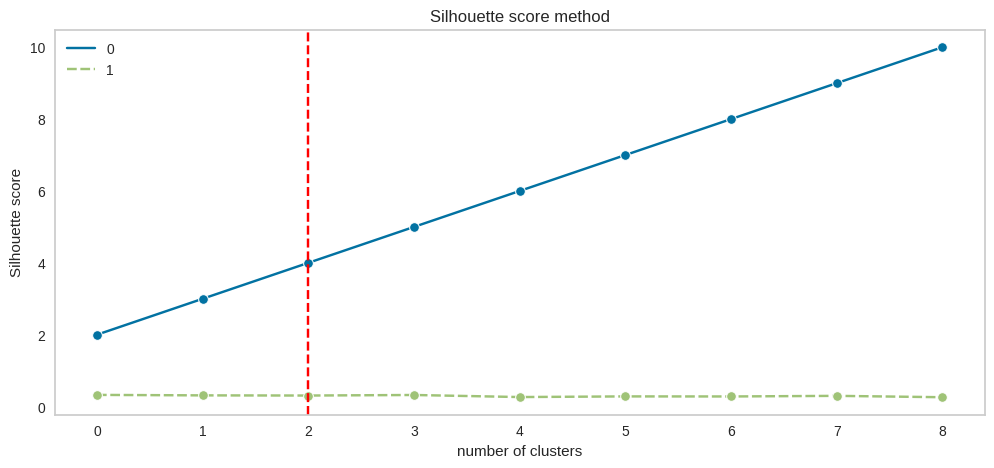

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(data =(n_clusters, s_scores), marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()

Silhouette score method indicates the best options would be respectively 2 clusters.

Elbow Plot for Standard Scaler data


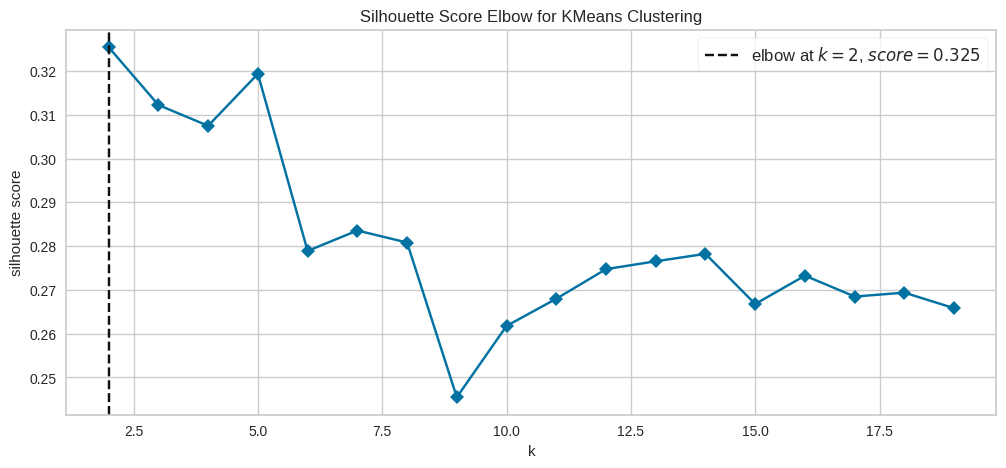

In [ ]:
# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model = KMeans(random_state=10, max_iter=500, init='k-means++')

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)
fig, ax = plt.subplots(figsize=(12,5))
# Fit the data and visualize
print('Elbow Plot for Standard Scaler data')
visualizer.fit(std_airline)
visualizer.poof()
plt.show()

In [ ]:
clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for stadardScaler applied on data.
for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(std_airline)
    sil_score1= silhouette_score(std_airline, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.3256981835090824
For n_clusters = 3 The average silhouette_score is : 0.3121716765282414
For n_clusters = 4 The average silhouette_score is : 0.32563311512799126
For n_clusters = 5 The average silhouette_score is : 0.31819537664378844
For n_clusters = 6 The average silhouette_score is : 0.3338735662323181
For n_clusters = 7 The average silhouette_score is : 0.22085896619040385
For n_clusters = 8 The average silhouette_score is : 0.23657639934232003
For n_clusters = 9 The average silhouette_score is : 0.2984364654012059


According the the silhouette score of:

The standardized data, the ideal number of clusters is 6, with a score higher than other options, of 0.33

####Build KMeans Cluster algorithm using K=6 and Standard Scaler Applied Dataset

We have found good number of cluster = 6

Model building using cluster numbers = 6

In [ ]:
model_kmeans = KMeans(n_clusters=6, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(std_airline)
y_predict_kmeans.shape

(3999,)

In [ ]:
# these are nothing but cluster labels...
y_predict_kmeans

array([2, 2, 2, ..., 1, 2, 2], dtype=int32)

In [ ]:
model_kmeans.labels_

array([2, 2, 2, ..., 1, 2, 2], dtype=int32)

In [ ]:
model_kmeans.cluster_centers_

array([[ 1.13686833,  0.4142613 ,  0.1345493 , -0.09824189, -0.06276658,
         0.65640088,  1.70548646,  3.77107713,  4.00212558,  0.27153799,
         0.88395812],
       [ 0.43381284, -0.11301262,  1.21014978, -0.09824189, -0.05449778,
         0.92813517,  0.75269133, -0.08065818, -0.08956555,  0.37079373,
         0.57854007],
       [-0.29444721, -0.12883455, -0.60151188, -0.09824189, -0.06071593,
        -0.51682757, -0.4934919 , -0.18636264, -0.19845942, -0.19791068,
        -0.34993321],
       [-0.04688966, -0.1562356 , -0.66822727,  9.03825361, -0.06276658,
        -0.10166533,  0.61785114,  0.0875494 ,  0.22034681, -0.07246398,
         0.05178388],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  1.71461374,  0.03329269,  0.05969539,  0.23987261,
         0.33752735],
       [ 0.45710365,  6.73109194, -0.04322862, -0.09824189, -0.06276658,
         0.06371677,  0.06535804,  0.3596938 ,  0.39424679, -0.07122344,
         0.387

Within cluster sum of squared:-

The lower values of inertia are better and zero is optimal.

Inertia is the sum of squared error for each cluster.

Therefore the smaller the inertia the denser the cluster (closer together all the points are)

In [ ]:
model_kmeans.inertia_

21089.973628929638

###Assign clusters to the data set

In [ ]:
airline_df = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')
airline_df.rename({'ID#':'ID', 'Award?':'Award'}, inplace=True, axis=1)
airline_df['Kmeans_Label'] = model_kmeans.labels_

In [ ]:
# Group data by Clusters (K=6)
airline_df.groupby('Kmeans_Label').agg(['mean'])

ID        Balance   Qual_miles cc1_miles cc2_miles  \
                     mean           mean         mean      mean      mean   
Kmeans_Label                                                                
0             1743.867133  188155.664336   464.573427  2.244755  1.000000   
1             1599.831858  117176.916331    58.446500  3.720837  1.000000   
2             2233.860465   43882.372895    43.558140  1.229751  1.000000   
3             2269.372093   68876.581395    23.255814  1.139535  2.348837   
4             1664.866667  138061.400000    78.800000  3.466667  1.000000   
5             2057.295082  119660.491803  5351.065574  2.000000  1.000000   

             cc3_miles   Bonus_miles Bonus_trans Flight_miles_12mo  \
                  mean          mean        mean              mean   
Kmeans_Label                                                         
0             1.000000  32995.580420   27.979021       5739.692308   
1             1.001609  39485.872084   18.811746        346.617860   
2             1.000401   4644.210104    6.852847        199.160385   
3             1.000000  14689.837209   17.534884        582.627907   
4             4.066667  93927.866667   28.066667        506.666667   
5             1.000000  18683.475410   12.229508        963.639344   

             Flight_trans_12 Days_since_enroll     Award  
                        mean              mean      mean  
Kmeans_Label                                              
0                  16.552448       4679.251748  0.797203  
1                   1.032180       4887.485921  0.649236  
2                   0.621091       3706.378508  0.200882  
3                   2.209302       3968.930233  0.395349  
4                   1.600000       4613.866667  0.533333  
5                   2.868852       3971.491803  0.557377

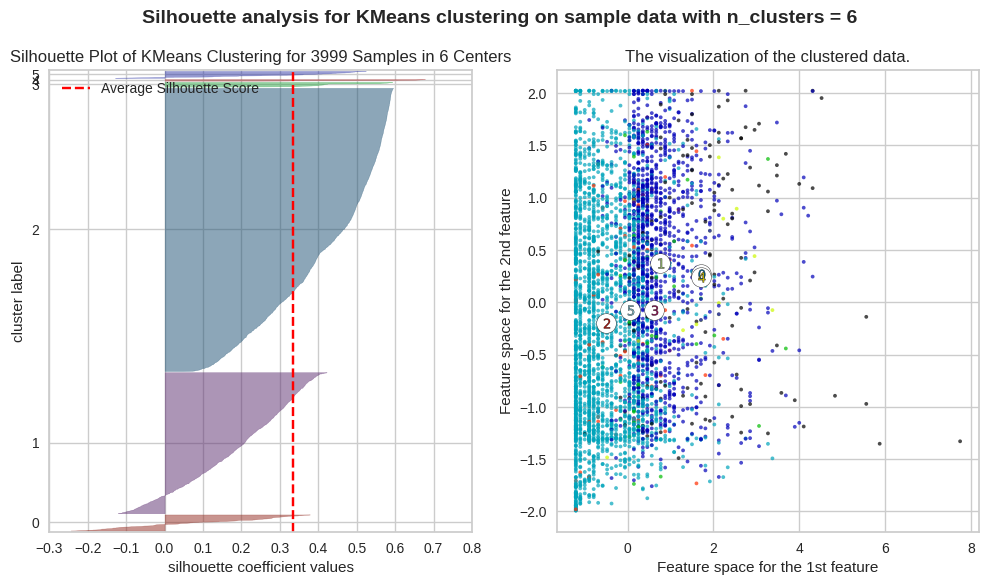

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(12,6)

sil_visualizer1 = SilhouetteVisualizer(model_kmeans,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a','#a83232','#323aa8'])
sil_visualizer1.fit(std_airline)

# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 6) # 6 is number of clusters
ax2.scatter(std_airline[:, 6], std_airline[:, 9], marker='.', s=30, lw=0, alpha=0.7, c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model_kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 6], centers1[:, 9], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[6], c[9], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % 6),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

Plotting barplot using groupby method to get visualize how many row no. in each cluster

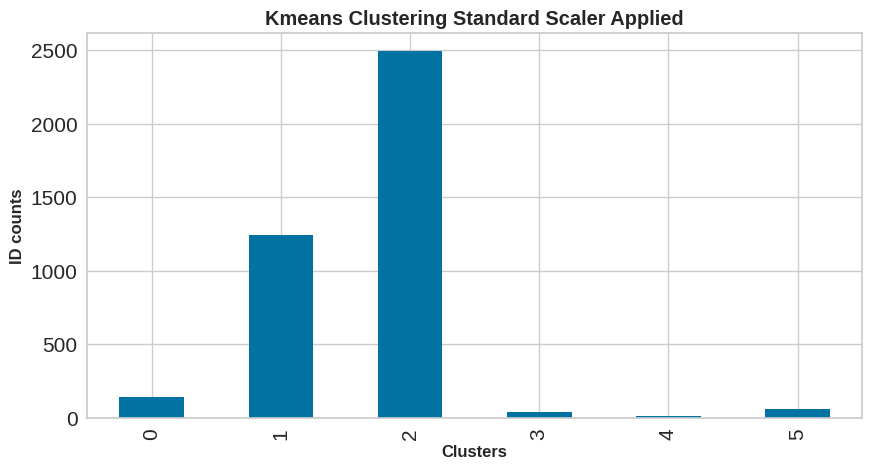

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
airline_df.groupby(['Kmeans_Label']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering Standard Scaler Applied',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='medium', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='medium', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

####4)Elbow Method and Silhouette Score on MinMaxScaler Applied Data

In [ ]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(norm_airline)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"Num_Clusters":cluster_range,"Cluster_Errors":cluster_errors})
clusters_df

Num_Clusters  Cluster_Errors
0              1     1830.793213
1              2      823.675698
2              3      625.168488
3              4      436.717190
4              5      348.943322
5              6      315.294817
6              7      287.730762
7              8      263.050001
8              9      245.453121
9             10      226.108501
10            11      214.839350
11            12      208.598213
12            13      197.654449
13            14      190.779350

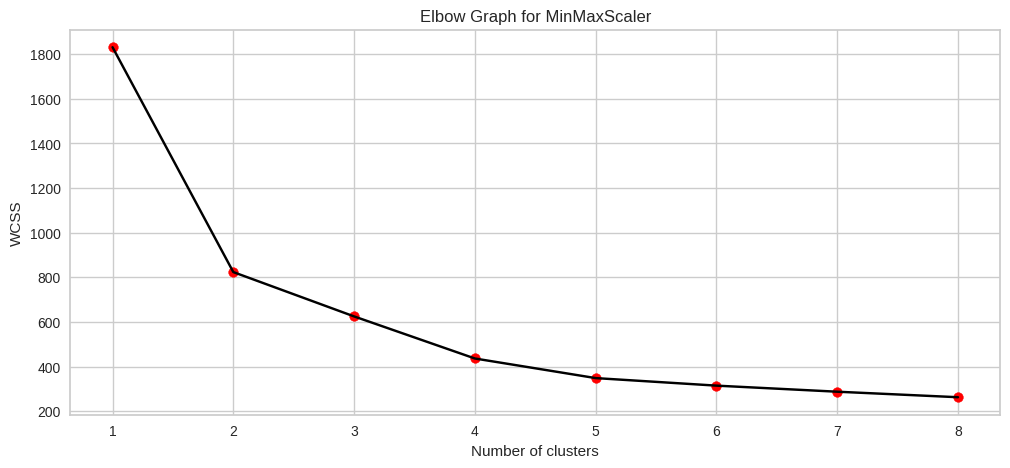

In [ ]:
wcss=[]
for i in range (1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(norm_airline)
    wcss.append(kmeans.inertia_)

# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
fig, ax = plt.subplots(figsize=(12,5))
plt.plot(range(1,9), wcss,color = 'black')
plt.scatter(range(1,9), wcss,color='red')
plt.title('Elbow Graph for MinMaxScaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

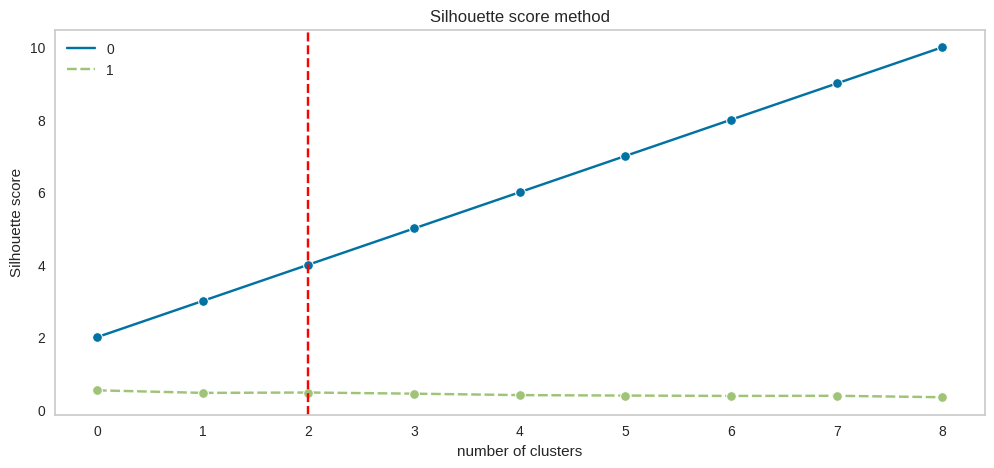

In [ ]:
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(norm_airline)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(norm_airline, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(data = (n_clusters, s_scores), marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()

Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.

Elbow Plot for Normalization data


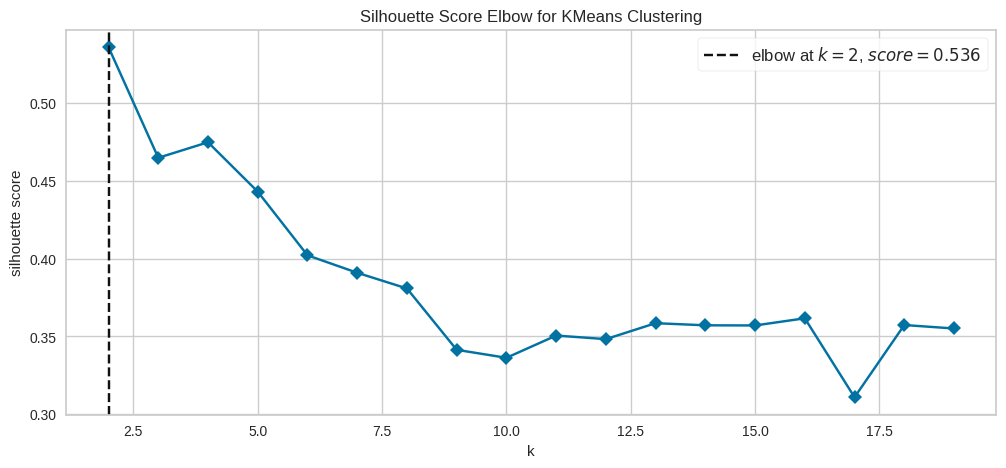

In [ ]:
model = KMeans(random_state=10, max_iter=500, init='k-means++')
plt.subplots(figsize=(12,5))
# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)
# Fit the data and visualize
print('Elbow Plot for Normalization data')
visualizer.fit(norm_airline)
visualizer.poof()
plt.show()

With the elbow method, the ideal number of clusters to use was 6.

We will also use the Silhouette score to determine an optimal number.

In [ ]:
clust_list = [2,3,4,5,6,7,8,9]

# Silhouette score for MinMaxScaler Applied on data .
for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(norm_airline)
    sil_score1= silhouette_score(norm_airline, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.535930510919477
For n_clusters = 3 The average silhouette_score is : 0.46484529388583046
For n_clusters = 4 The average silhouette_score is : 0.4744941579482721
For n_clusters = 5 The average silhouette_score is : 0.4430672072796034
For n_clusters = 6 The average silhouette_score is : 0.38865859989228385
For n_clusters = 7 The average silhouette_score is : 0.3909601011818369
For n_clusters = 8 The average silhouette_score is : 0.38030165896247936
For n_clusters = 9 The average silhouette_score is : 0.3842538055607832


According the the silhouette score of:

The MinMax Scaler Applied data, the ideal number of clusters is 2, with a score higher than other options, of 0.53, but if we notice the number of cluster 5 has also the best variation within cluster and between cluster with zero to no values going towards -1 and no mismatch in cluster segregation than the consecutive rest

If we check silhouette score with Normalize data kmeans model 0.53>0.32. Best score always close to +1.

####5)Build KMeans Cluster algorithm using K=2 and MinMaxScaler Applied Dataset

We have found good number of cluster = 2 Model building using cluster numbers = 2

In [ ]:
model_kmeans = KMeans(n_clusters=2, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(norm_airline)
y_predict_kmeans.shape

(3999,)

In [ ]:
# these are nothing but cluster labels...
y_predict_kmeans

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

In [ ]:
model_kmeans.labels_

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

In [ ]:
# cluster centres associated with each lables
model_kmeans.cluster_centers_

array([[ 5.69280197e-02,  2.15461508e-02,  4.15428764e-01,
         7.76502363e-03,  4.55773126e-03,  1.09621005e-01,
         1.83518364e-01,  2.78255837e-02,  4.90489598e-02,
         5.57398375e-01,  1.00000000e+00],
       [ 3.50812450e-02,  7.85813260e-03,  1.76330421e-01,
         6.94996029e-03,  2.18427323e-03,  3.87875269e-02,
         1.06313612e-01,  7.34309944e-03,  1.23113582e-02,
         4.60411394e-01, -3.05311332e-15]])

The lower values of inertia are better and zero is optimal.

Inertia is the sum of squared error for each cluster.

Therefore the smaller the inertia the denser the cluster (closer together all the points are)

In [ ]:
model_kmeans.inertia_

823.6756984125209

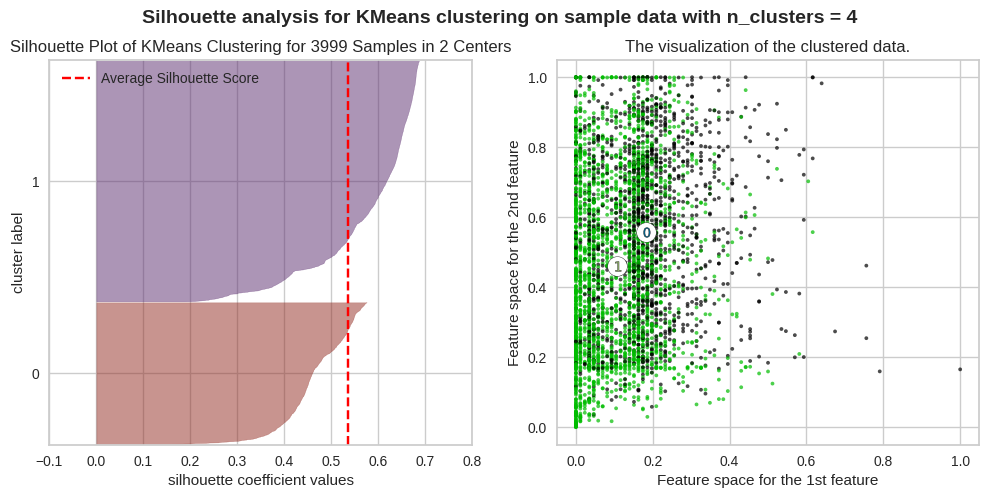

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(12,5)
sil_visualizer1 = SilhouetteVisualizer(model_kmeans,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a'])
sil_visualizer1.fit(norm_airline)

# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 2) # 2 is number of clusters
ax2.scatter(norm_airline[:, 6], norm_airline[:, 9], marker='.', s=30, lw=0, alpha=0.7, c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model_kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 6], centers1[:, 9], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[6], c[9], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % 4),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

Plotting barplot using groupby method to get visualize how many row no. in each cluster

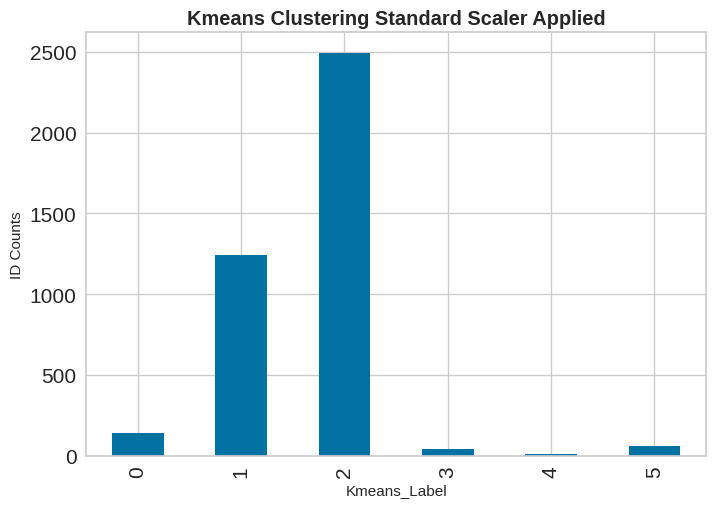

In [ ]:
airline_df.groupby(['Kmeans_Label']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering Standard Scaler Applied',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [157]:
# Group data by Clusters (K=2)
airline_df.groupby('Kmeans_Label').agg(['mean'])

ID        Balance   Qual_miles cc1_miles cc2_miles  \
                     mean           mean         mean      mean      mean   
Kmeans_Label                                                                
0             1743.867133  188155.664336   464.573427  2.244755  1.000000   
1             1599.831858  117176.916331    58.446500  3.720837  1.000000   
2             2233.860465   43882.372895    43.558140  1.229751  1.000000   
3             2269.372093   68876.581395    23.255814  1.139535  2.348837   
4             1664.866667  138061.400000    78.800000  3.466667  1.000000   
5             2057.295082  119660.491803  5351.065574  2.000000  1.000000   

             cc3_miles   Bonus_miles Bonus_trans Flight_miles_12mo  \
                  mean          mean        mean              mean   
Kmeans_Label                                                         
0             1.000000  32995.580420   27.979021       5739.692308   
1             1.001609  39485.872084   18.811746        346.617860   
2             1.000401   4644.210104    6.852847        199.160385   
3             1.000000  14689.837209   17.534884        582.627907   
4             4.066667  93927.866667   28.066667        506.666667   
5             1.000000  18683.475410   12.229508        963.639344   

             Flight_trans_12 Days_since_enroll     Award  
                        mean              mean      mean  
Kmeans_Label                                              
0                  16.552448       4679.251748  0.797203  
1                   1.032180       4887.485921  0.649236  
2                   0.621091       3706.378508  0.200882  
3                   2.209302       3968.930233  0.395349  
4                   1.600000       4613.866667  0.533333  
5                   2.868852       3971.491803  0.557377

We can now clearly see the 2 number of clusters formed, which can be described as under

Cluster1, Tier 1 = "1" = Defines the group of fliers that earn the most out of the card and are frequent fliers

Cluster0, Tier 2 = "0" = Defines the group of fliers that earn the least and are the least frequent fliers

###Hierarchical Clustering Algorithm

####1)Dendogram on MinMaxScaler Applied on Dataset

Applying Dendrogram on data. Or you may apply it on Standardized/normalized indepedent variable data.

Here diffrent linkage method from hyperparameter is used to see diff between methods for understanding.

Ward method is commanly used since it is simpler to visualize understanding.

Find number of cluster's using color coding of dendrogram. Each color indicates one cluster.

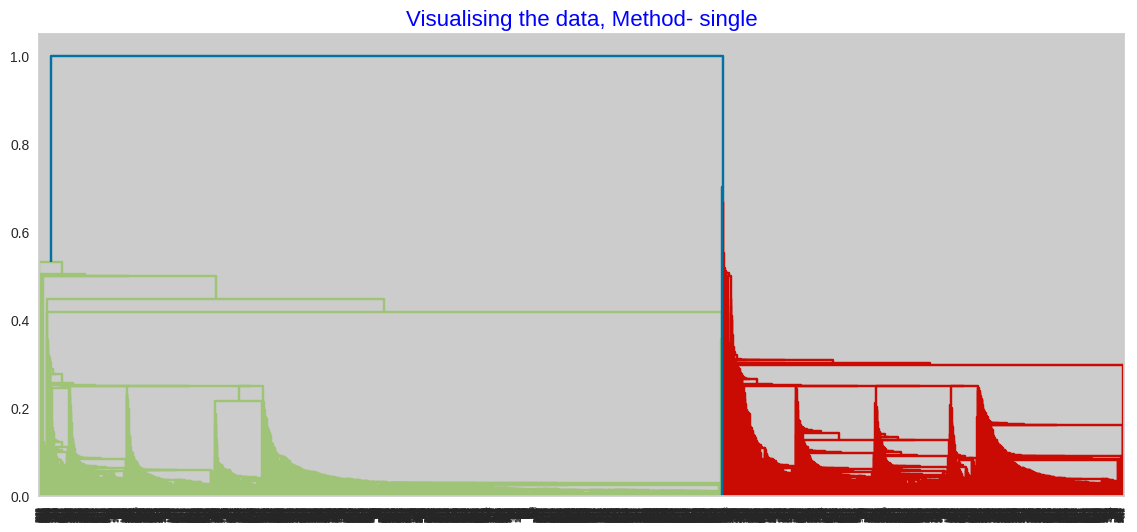

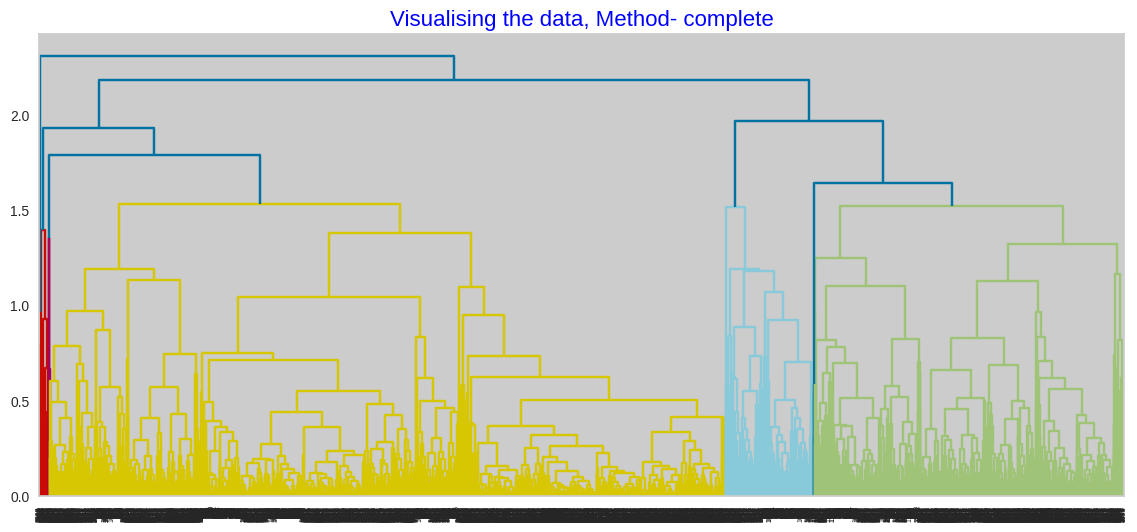

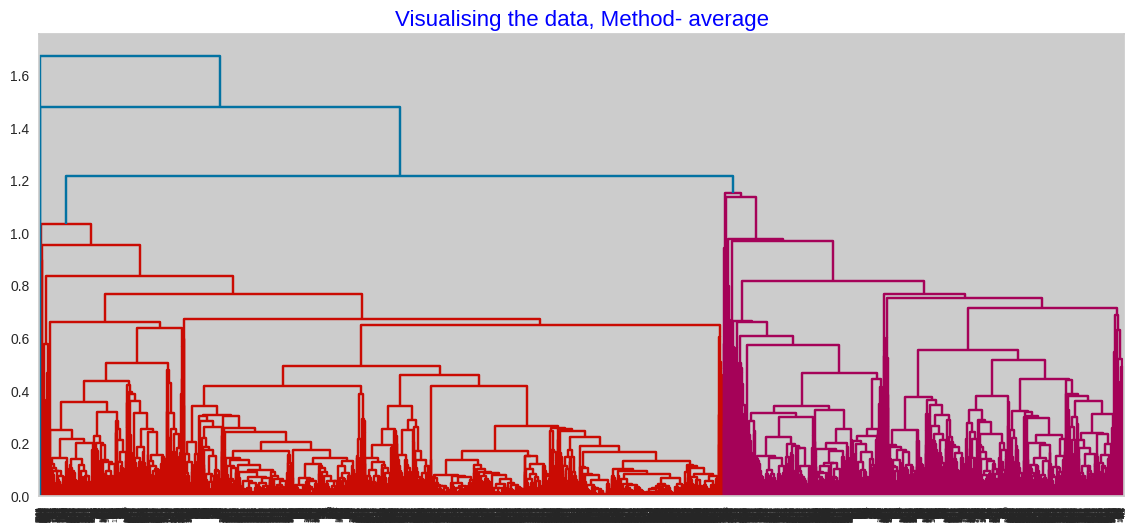

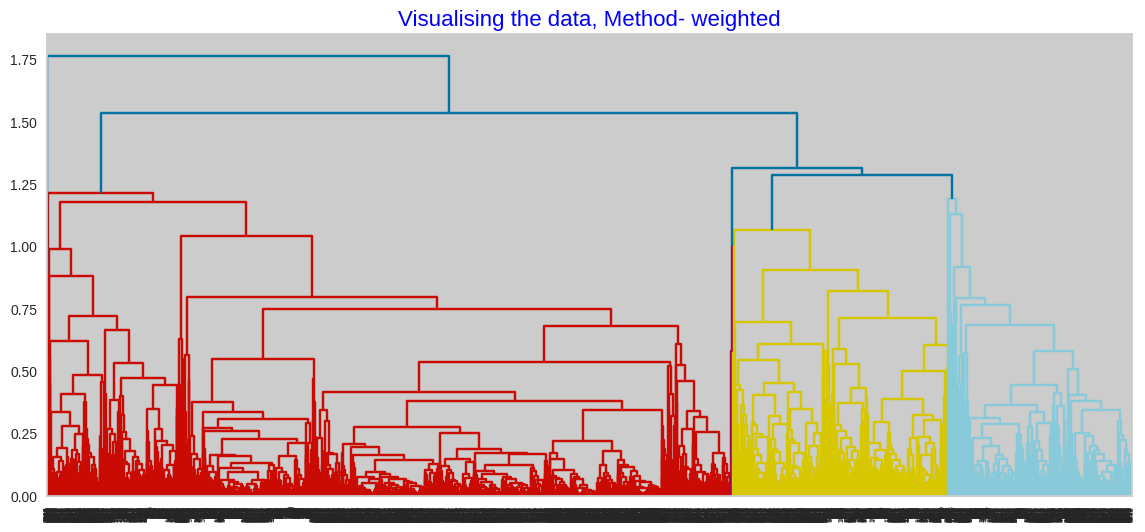

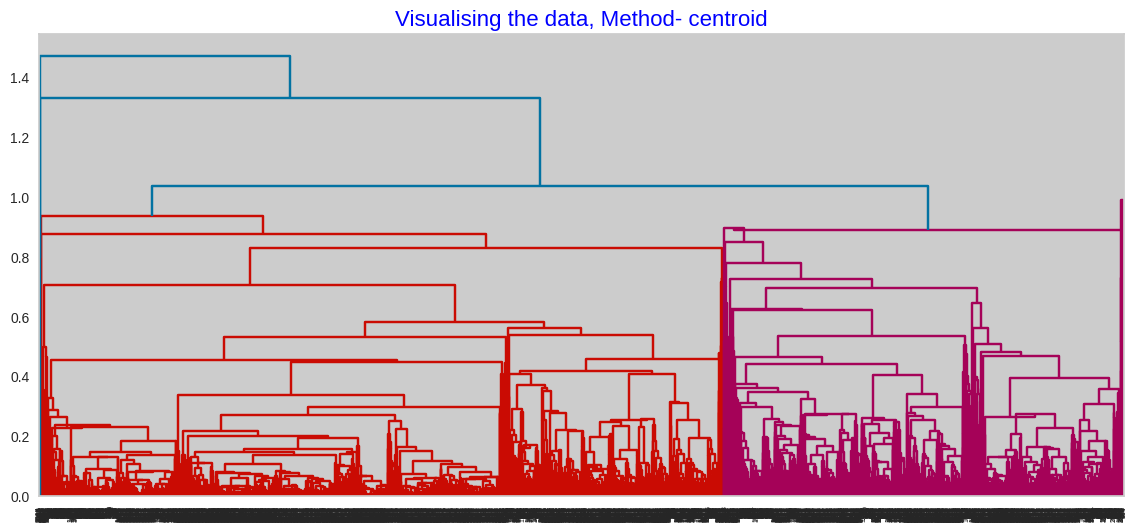

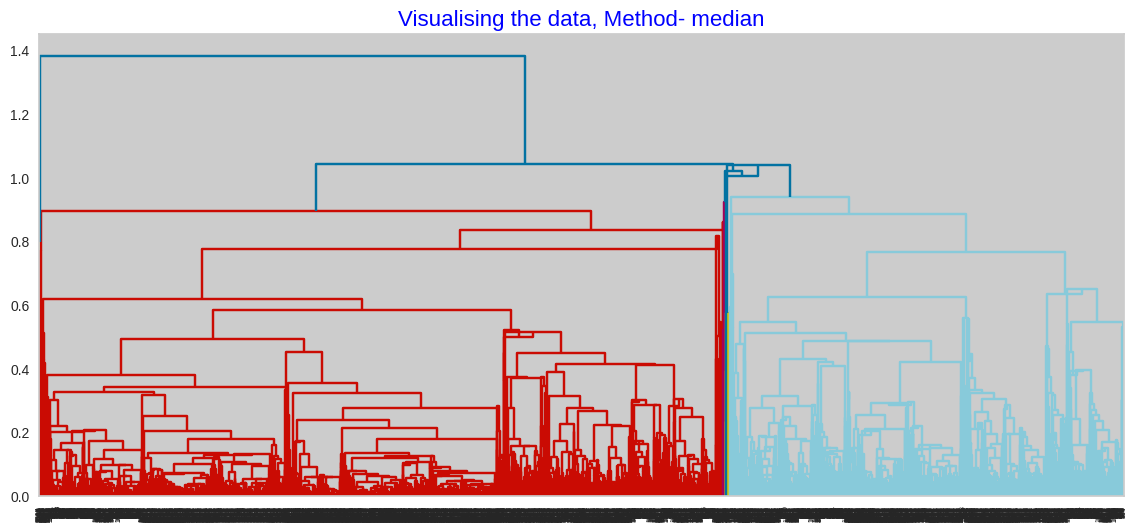

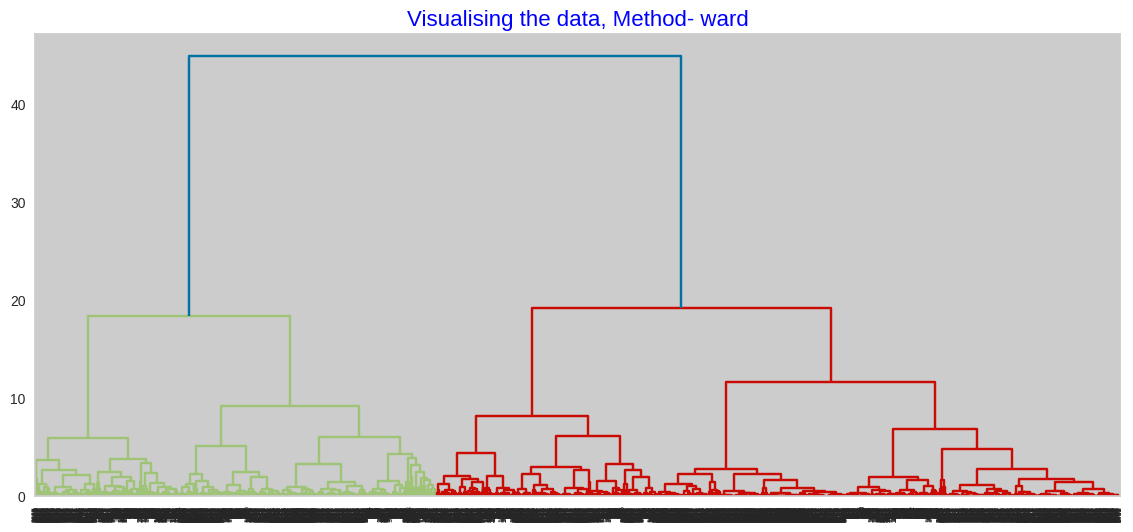

In [162]:
for methods in ['single','complete','average','weighted','centroid','median','ward']:
    plt.figure(figsize =(14,6))
    dict = {'fontsize':16,'fontweight' :14, 'color' : 'blue'}
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict)
    Dendrogram1 = sch.dendrogram(sch.linkage(norm_airline, method = methods,optimal_ordering=False))

In [161]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(norm_airline)
        silhouette_score1 = silhouette_score(norm_airline, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.535930510919477
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.47040913679492186
For n_clusters = 2 The average silhouette_score with linkage- average : 0.47040913679492186
For n_clusters = 2 The average silhouette_score with linkage- single : 0.535930510919477

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.43550164891825044
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.5318787367232326
For n_clusters = 3 The average silhouette_score with linkage- average : 0.39619766243707655
For n_clusters = 3 The average silhouette_score with linkage- single : 0.5351606918177734

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.42494300944261365
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.46459708515197673
For n_clusters = 4 The average silhouette_score with linkage- average : 0.5286018409871408
F

The seperation in Ward Method indicate that 2 is the optimal number for clusters.



####2)Dendrogram on Standard Scaler Applied on Data

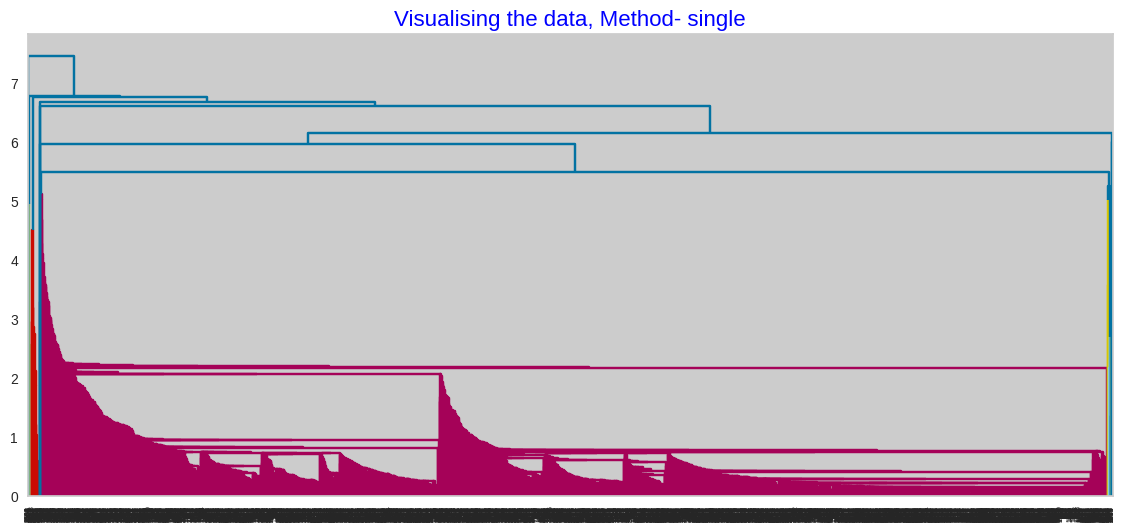

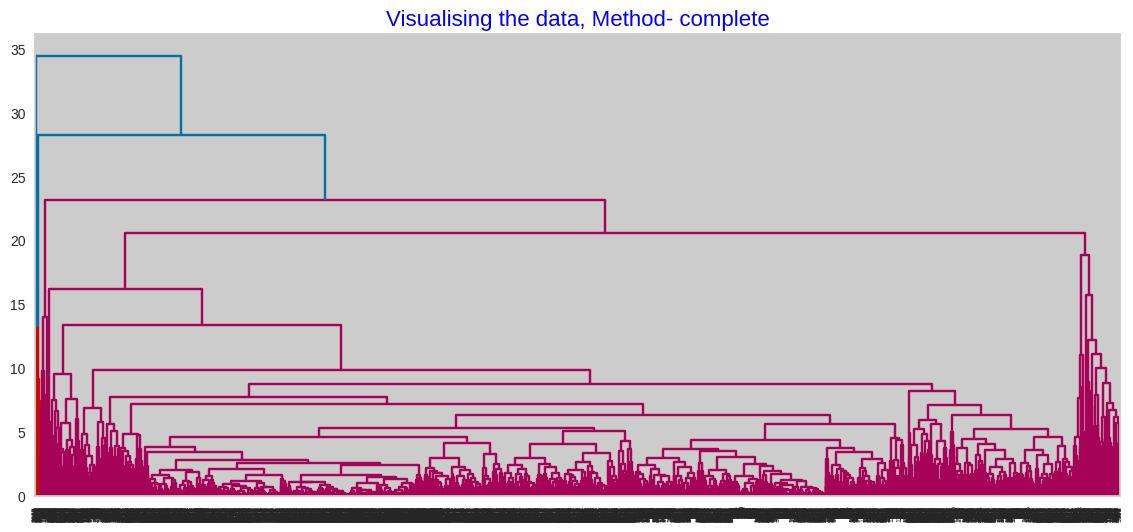

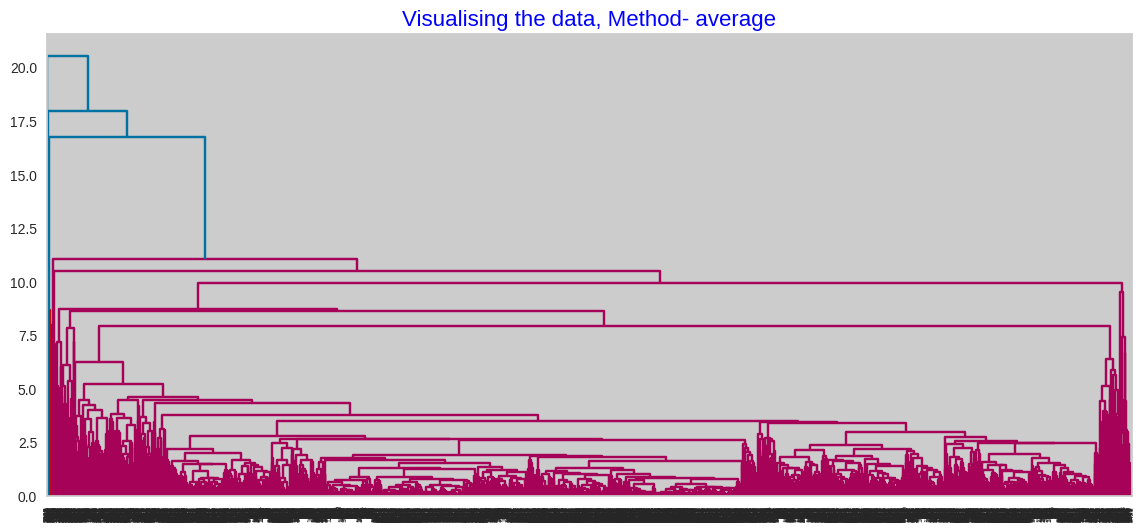

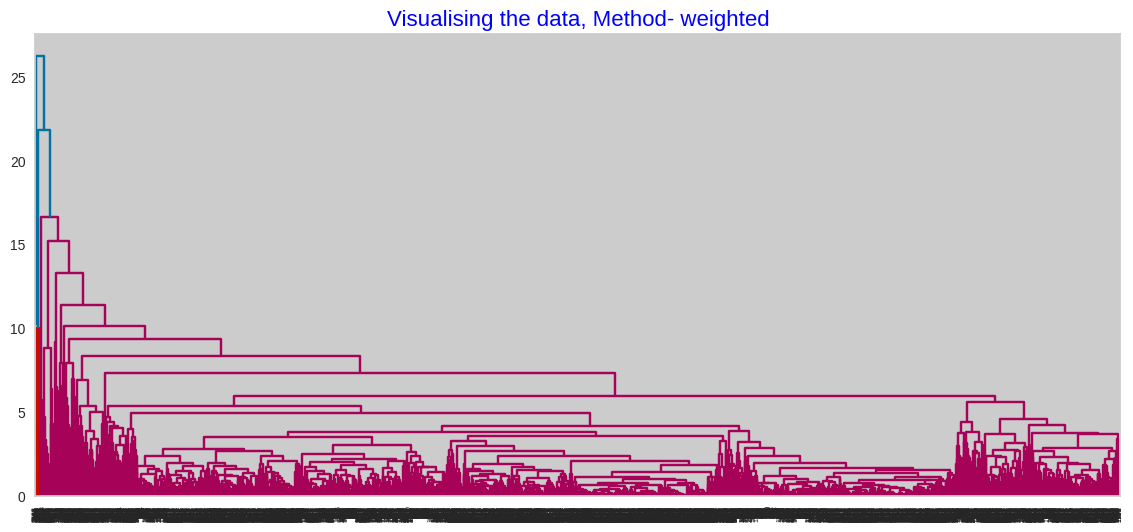

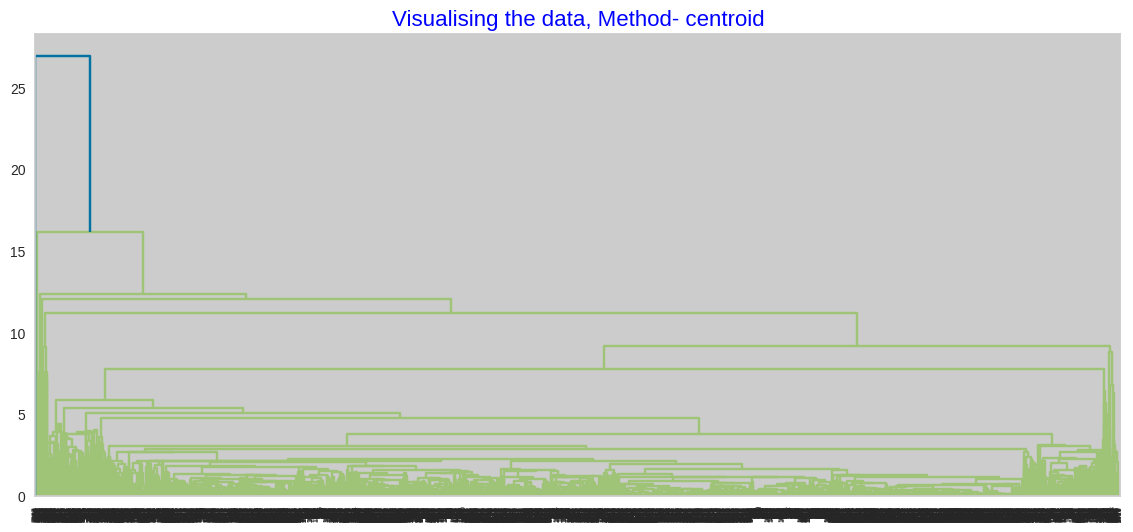

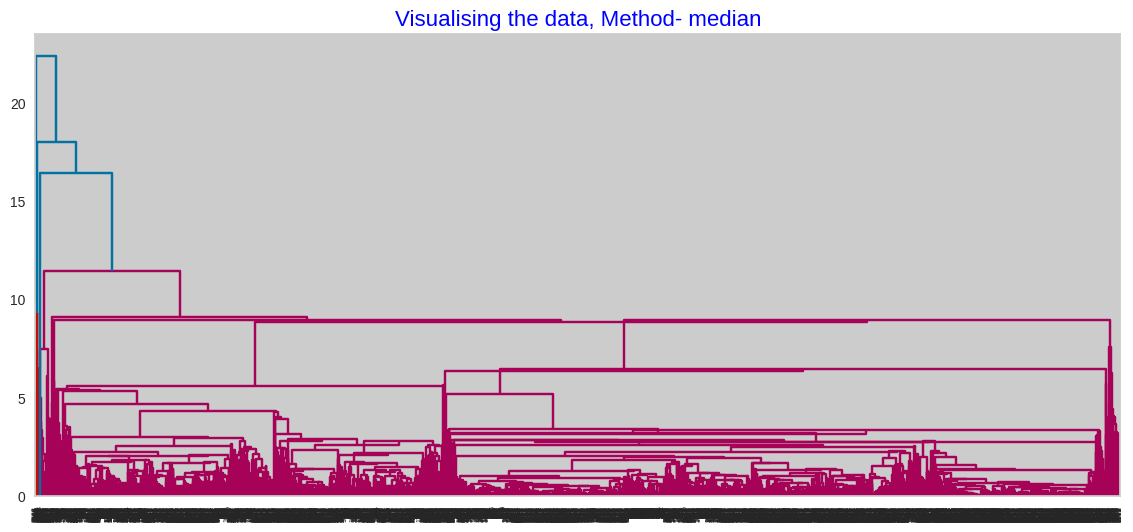

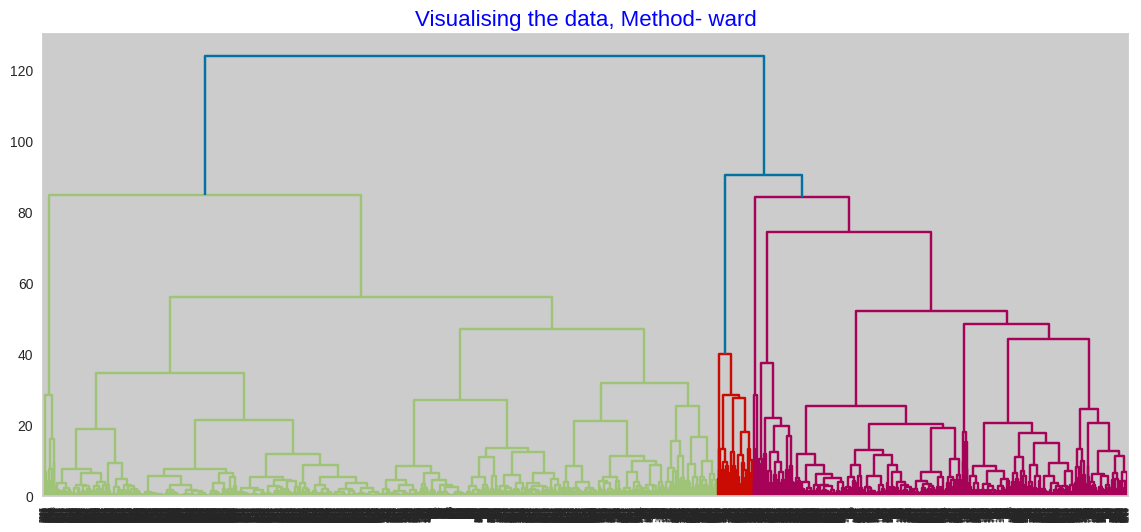

In [164]:
for methods in ['single','complete','average','weighted','centroid','median','ward']:
    plt.figure(figsize =(14,6))
    dict = {'fontsize':16,'fontweight' :14, 'color' : 'blue'}
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict)
    Dendrogram2 = sch.dendrogram(sch.linkage(std_airline, method = methods,optimal_ordering=False))

In [165]:
n_clusters = [2,3,4,5,6,7,8,9,10]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster2 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels2 = hie_cluster2.fit_predict(std_airline)
        silhouette_score2 = silhouette_score(std_airline, hie_labels2)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score2)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.28926595242577247
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.8111134025692677
For n_clusters = 2 The average silhouette_score with linkage- average : 0.8111134025692677
For n_clusters = 2 The average silhouette_score with linkage- single : 0.8562820070415407

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.2940432062008608
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.7760836053602842
For n_clusters = 3 The average silhouette_score with linkage- average : 0.7838667595062349
For n_clusters = 3 The average silhouette_score with linkage- single : 0.7350532148998382

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.30814152852022786
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.5985727763092806
For n_clusters = 4 The average silhouette_score with linkage- average : 0.7731120442583631
For

Max score is with cluster numbers 2 in standard scaler transformation and in Min Max scaler transformation.

Heirarchical clustering means creating a tree of clusters by iteratively grouping or separating data points.

There are two types of hierarchical clustering: Agglomerative clustering Divisive clustering We now apply the Agglomerative clustering technique:

Agglomerative clustering is kind of a bottom-up approach. Each data point is assumed to be a separate cluster at first. Then the similar clusters are iteratively combined

####3)Run Hierarchical Clustering (Agglomerative Clustering)

In [166]:
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_pred_hie = agg_clustering.fit_predict(norm_airline)
print(y_pred_hie.shape)
y_pred_hie

(3999,)


array([0, 0, 0, ..., 1, 0, 0])

In [167]:
# Cluster numbers
agg_clustering.n_clusters_

2

In [168]:
# Clustering Score
(silhouette_score(norm_airline, agg_clustering.labels_)*100).round(3)

53.593


Putting Cluster lables into original dataset And analysis of the same

In [171]:
# Concating Labels with main dataset copy
airline_df['Hierarchical_Labels'] = agg_clustering.labels_

In [172]:
airline_df.groupby('Hierarchical_Labels').agg(['mean'])

ID       Balance  Qual_miles cc1_miles  \
                            mean          mean        mean      mean   
Hierarchical_Labels                                                    
0                    2173.169182  59807.839555   87.602462  1.705322   
1                    1745.592843  97053.051317  240.196489  2.661715   

                    cc2_miles cc3_miles   Bonus_miles Bonus_trans  \
                         mean      mean          mean        mean   
Hierarchical_Labels                                                 
0                     1.01390  1.008737  10227.689039    9.142971   
1                     1.01553  1.018231  28905.414585   15.782579   

                    Flight_miles_12mo Flight_trans_12 Days_since_enroll Award  \
                                 mean            mean              mean  mean   
Hierarchical_Labels                                                             
0                          226.292295        0.652502       3820.652105   0.0   
1                          857.501013        2.599595       4625.062120   1.0   

                    Kmeans_Label  
                            mean  
Hierarchical_Labels               
0                       1.851867  
1                       1.392302

###DBSCAN - (Density Based Spatial Clustering of Applications with Noise)

####1)DBSCAN of Standard Scaled Data

To choose the best combination of the algorithm parameters , will first create a matrix of investigated combinations.

In [173]:
from itertools import product

eps_values = np.arange(0.25,3,0.25) # eps values to be investigated
min_samples = np.arange(3,23) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [174]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(std_airline)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(std_airline, DBS_clustering.labels_))

A heatplot shows how many clusters were genreated by the algorithm for the respective parameters combinations.


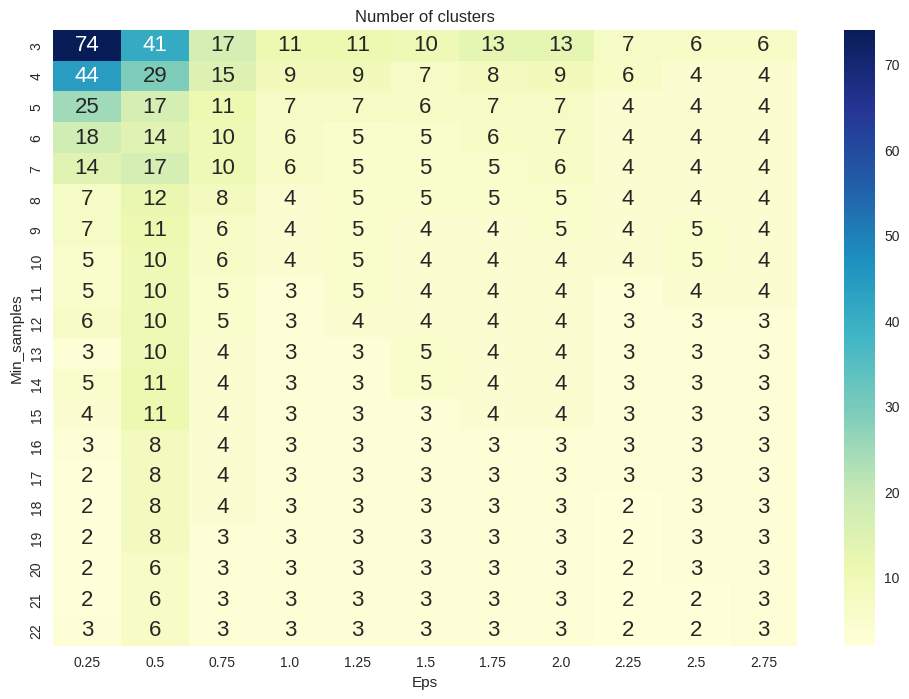

In [175]:
#Collecting number of generated clusters.

tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters
pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

As the heatplot above shows, the number of clusters vary from 74 to 2.

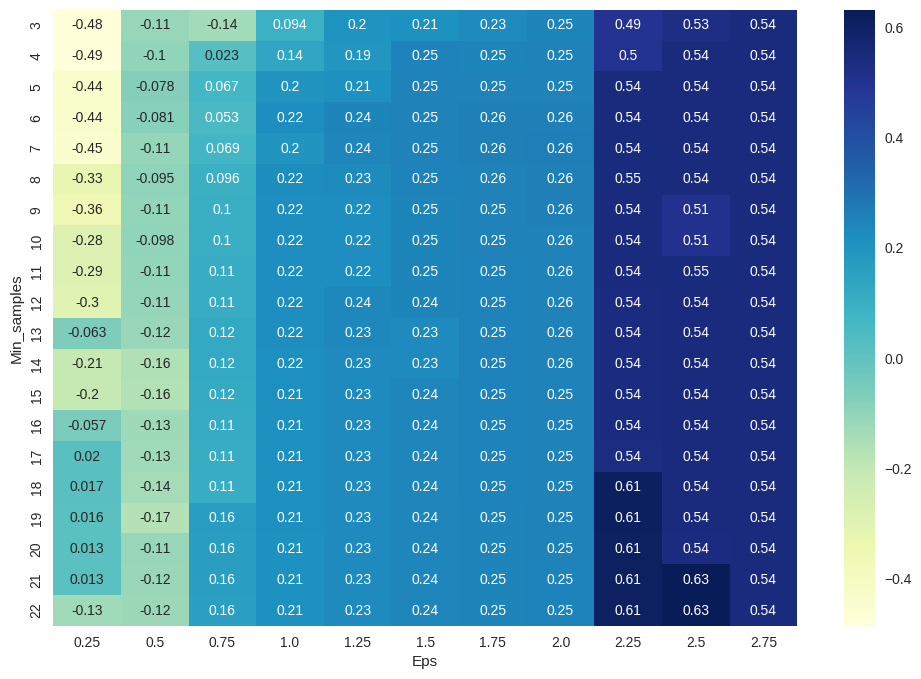

In [176]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['Sil_score'] = sil_score
pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

Global maximum is 0.63 for eps=2.5 and min_samples=21 and 22

In [177]:
epsilon = [0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75]
min_samples = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(std_airline)
        #cluster_labels=dbscan.fit_predict(data)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        silhouette_avg = silhouette_score(std_airline, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0],
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 2.5 
min_sample= 21 
number of clusters= 1 
average silhouette score= 0.6319


Run DBSCAN on Standard Scaled data with optimal min_sample and epsilon values

In [178]:
dbscan = DBSCAN(eps=2.5, min_samples=21)
dbscan.fit(std_airline)

DBSCAN(eps=2.5, min_samples=21)

Concating Labels with main dataset copy

In [179]:
airline_df['DBSCAN_Labels'] = dbscan.labels_
airline_df.head()

ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0   1    28143           0          1          1          1          174   
1   2    19244           0          1          1          1          215   
2   3    41354           0          1          1          1         4123   
3   4    14776           0          1          1          1          500   
4   5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award  \
0            1                  0                0               7000      0   
1            2                  0                0               6968      0   
2            4                  0                0               7034      0   
3            1                  0                0               6952      0   
4           26               2077                4               6935      1   

   Kmeans_Label  Hierarchical_Labels  DBSCAN_Labels  
0             2                    0              0  
1             2                    0              0  
2             2                    0              0  
3             2                    0              0  
4             1                    1              0

In [180]:
airline_df.groupby('DBSCAN_Labels').agg(['mean'])

ID        Balance   Qual_miles cc1_miles cc2_miles  \
                      mean           mean         mean      mean      mean   
DBSCAN_Labels                                                                
-1             1708.947115  211990.889423  1522.576923  2.509615  1.278846   
 0             2031.601688   66008.336587    68.482722  2.034819  1.000000   

              cc3_miles   Bonus_miles Bonus_trans Flight_miles_12mo  \
                   mean          mean        mean              mean   
DBSCAN_Labels                                                         
-1             1.235577  45335.081731   24.754808       3276.389423   
 0             1.000000  15598.138486   10.880243        305.532577   

              Flight_trans_12 Days_since_enroll     Award Kmeans_Label  \
                         mean              mean      mean         mean   
DBSCAN_Labels                                                            
-1                   9.548077       4768.596154  0.687500     2.038462   
 0                   0.925086       4082.893959  0.352941     1.662094   

              Hierarchical_Labels  
                             mean  
DBSCAN_Labels                      
-1                       0.687500  
 0                       0.352941

Plotting barplot using groupby method to get visualize how many row no. in each cluster

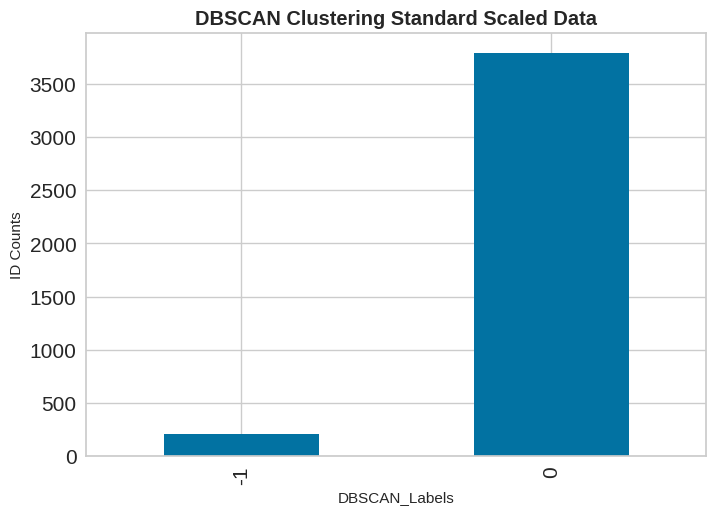

In [181]:
airline_df.groupby(['DBSCAN_Labels']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('DBSCAN Clustering Standard Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

####2)DBSCAN on MinMax Scaled Data

To choose the best combination of the algorithm parameters I will first create a matrix of investigated combinations.

In [182]:
from itertools import product

eps_values = np.arange(0.25,1.25,0.25) # eps values to be investigated
min_samples = np.arange(3,23) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [183]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(norm_airline)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(norm_airline, DBS_clustering.labels_))

A heatplot shows how many clusters were genreated by the algorithm for the respective parameters combinations.


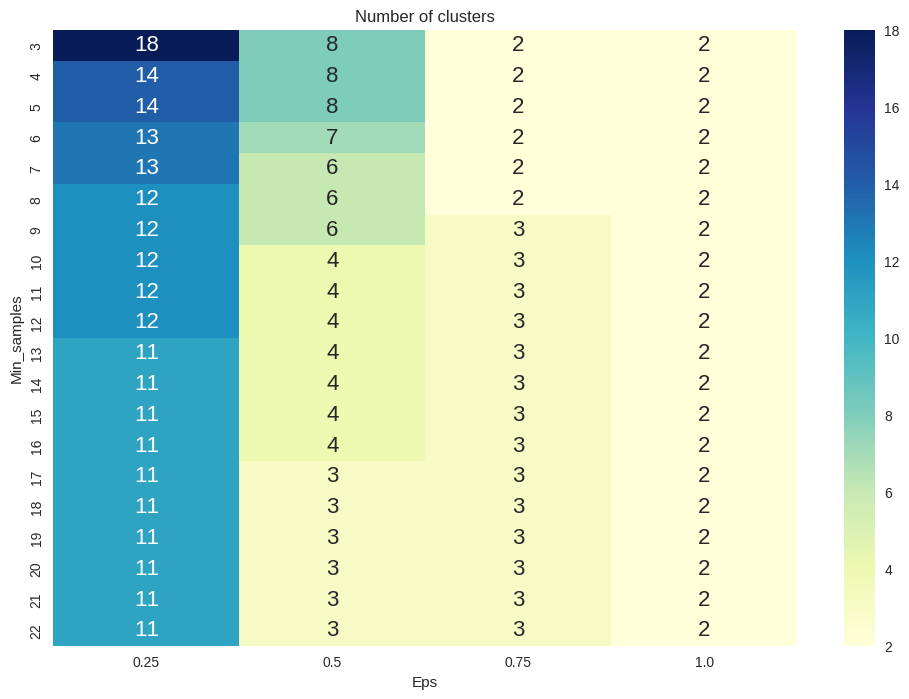

In [184]:
#Collecting number of generated clusters.

tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters
pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

As the heatplot above shows, the number of clusters vary from 18 to 2.

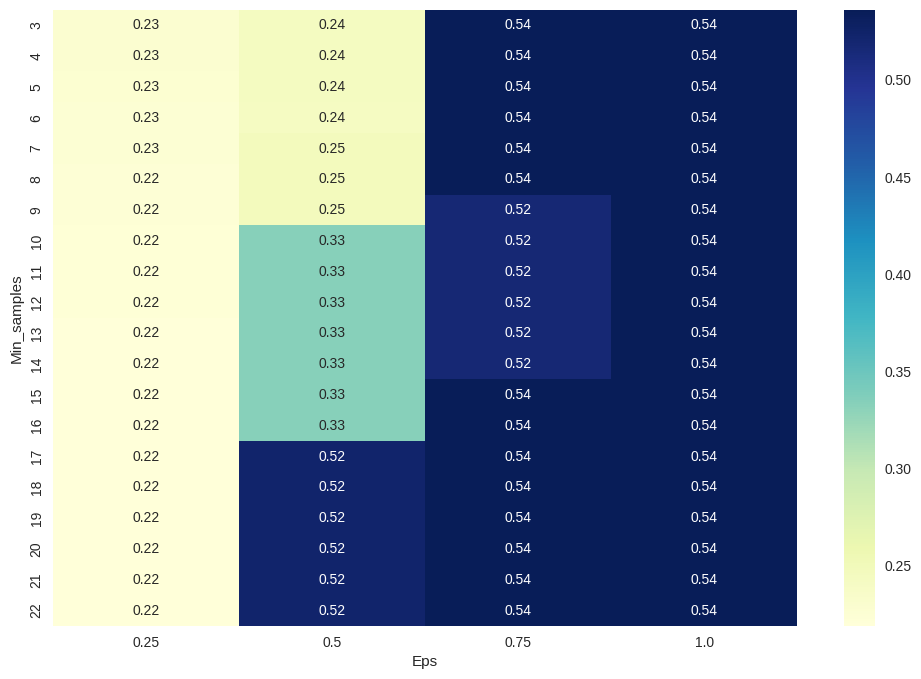

In [185]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['Sil_score'] = sil_score
pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

Global maximum is 0.54 for eps=1.0 and min_samples=from 22 to 3

In [186]:
epsilon = [0.25,0.5,0.75,1]
min_samples = [11,12,13,14,15,16,17,18,19,20,21,22]
sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(norm_airline)
        #cluster_labels=dbscan.fit_predict(data)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        silhouette_avg = silhouette_score(norm_airline, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0],
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 1 
min_sample= 11 
number of clusters= 2 
average silhouette score= 0.5359


In [187]:
epsilon = [0.25,0.5,0.75,1]
min_samples = [3,4,5,6,7,8,9,10,11]
sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(norm_airline)
        #cluster_labels=dbscan.fit_predict(data)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        silhouette_avg = silhouette_score(norm_airline, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0],
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 0.75 
min_sample= 3 
number of clusters= 2 
average silhouette score= 0.5359


Run DBSCAN on MinMax Scaled data with optimal min_sample and epsilon values

In [188]:
dbscan = DBSCAN(eps=1, min_samples=22) # min_samples = number of clumns * 3
dbscan.fit(norm_airline)

DBSCAN(eps=1, min_samples=22)

Concating Labels with main dataset copy

In [189]:
airline_df['DBSCAN_Labels'] = dbscan.labels_
airline_df.head()

ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0   1    28143           0          1          1          1          174   
1   2    19244           0          1          1          1          215   
2   3    41354           0          1          1          1         4123   
3   4    14776           0          1          1          1          500   
4   5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award  \
0            1                  0                0               7000      0   
1            2                  0                0               6968      0   
2            4                  0                0               7034      0   
3            1                  0                0               6952      0   
4           26               2077                4               6935      1   

   Kmeans_Label  Hierarchical_Labels  DBSCAN_Labels  
0             2                    0              0  
1             2                    0              0  
2             2                    0              0  
3             2                    0              0  
4             1                    1              1

In [190]:
airline_df.groupby('DBSCAN_Labels').agg(['mean'])

ID       Balance  Qual_miles cc1_miles cc2_miles  \
                      mean          mean        mean      mean      mean   
DBSCAN_Labels                                                              
0              2173.169182  59807.839555   87.602462  1.705322   1.01390   
1              1745.592843  97053.051317  240.196489  2.661715   1.01553   

              cc3_miles   Bonus_miles Bonus_trans Flight_miles_12mo  \
                   mean          mean        mean              mean   
DBSCAN_Labels                                                         
0              1.008737  10227.689039    9.142971        226.292295   
1              1.018231  28905.414585   15.782579        857.501013   

              Flight_trans_12 Days_since_enroll Award Kmeans_Label  \
                         mean              mean  mean         mean   
DBSCAN_Labels                                                        
0                    0.652502       3820.652105   0.0     1.851867   
1                    2.599595       4625.062120   1.0     1.392302   

              Hierarchical_Labels  
                             mean  
DBSCAN_Labels                      
0                             0.0  
1                             1.0

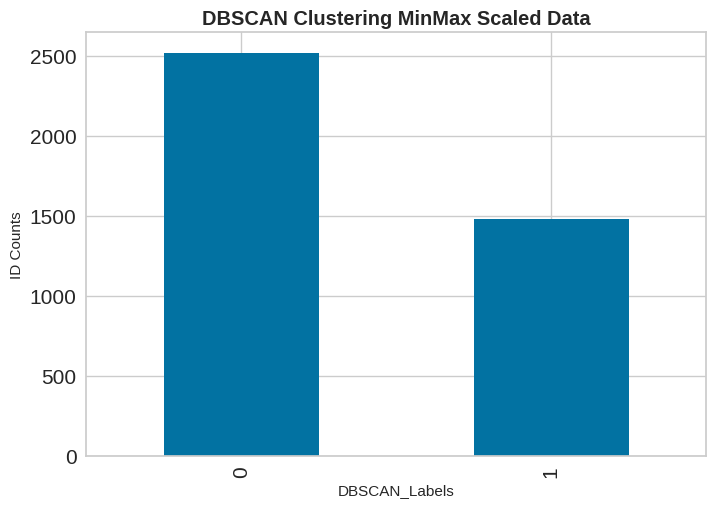

In [191]:
#Plotting barplot using groupby method to get visualize how many row no. in each cluster

airline_df.groupby(['DBSCAN_Labels']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('DBSCAN Clustering MinMax Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In cluster number 0 & 1 there are more customers. Need to focus on cluster 0 & 1.

###Sorting elements based on cluster label assigned and taking average for insights.

In [192]:
cluster1 = pd.DataFrame(airline_df.loc[airline_df.DBSCAN_Labels==0].mean(),columns= ['Cluster1_Avg'])
cluster2 = pd.DataFrame(airline_df.loc[airline_df.DBSCAN_Labels==1].mean(),columns= ['Cluster2_Avg'])
avg_airline = pd.concat([cluster1,cluster2],axis=1)
avg_airline

Cluster1_Avg  Cluster2_Avg
ID                    2173.169182   1745.592843
Balance              59807.839555  97053.051317
Qual_miles              87.602462    240.196489
cc1_miles                1.705322      2.661715
cc2_miles                1.013900      1.015530
cc3_miles                1.008737      1.018231
Bonus_miles          10227.689039  28905.414585
Bonus_trans              9.142971     15.782579
Flight_miles_12mo      226.292295    857.501013
Flight_trans_12          0.652502      2.599595
Days_since_enroll     3820.652105   4625.062120
Award                    0.000000      1.000000
Kmeans_Label             1.851867      1.392302
Hierarchical_Labels      0.000000      1.000000
DBSCAN_Labels            0.000000      1.000000

As decided need to focus on first two clusters..

Considering past Award status(0 or 1) cluster number2 shows award avg as 1 that means people awarded with scheme. Similarly for cluster number 2 award avg. is 0.

Since avg is low that means now maximim award given to cluster number1 in the past. Need to add future schemes for cluster number two members on different bonus points & different card transaction bonus.

####Have applied EDA to analyze dataset. Discovered correlation between diff variables and found colinearity.

####Applied Standardazation & MinMaxScalar transformation on the data to use Principle componets analysis effectively.

####used & analyzed Three clustering techniques here. i) KMeans, ii) Hierarchical Clusterig & iii) DBSCAN.

####By applying clustering on different transformation data shows fluctuation in model score.

####So finally the Standard Scaler found less score so not used for further model building.

####KMeans clustering is sensitive to outliers.